In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt       
%matplotlib inline 
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression, RFE
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, RandomizedSearchCV
import json

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# About the dataset
**According to source these anonymized set of variables represent the custom features in each car. Variables with letters are categorical. Variables with 0/1 are binary. The ground truth is labeled 'y' that represents the time (in seconds) that the car took to pass testing for each of these variables. <br>We have 4209 cars in both training and testing set and we have a total of 376 custom features (variables).**

In [ ]:
train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/merc/train.csv")
train

ID       y  X0 X1  X2 X3 X4  ... X378 X379 X380  X382  X383  X384  X385
0        0  130.81   k  v  at  a  d  ...    0    0    0     0     0     0     0
1        6   88.53   k  t  av  e  d  ...    0    0    0     0     0     0     0
2        7   76.26  az  w   n  c  d  ...    0    0    0     1     0     0     0
3        9   80.62  az  t   n  f  d  ...    0    0    0     0     0     0     0
4       13   78.02  az  v   n  f  d  ...    0    0    0     0     0     0     0
...    ...     ...  .. ..  .. .. ..  ...  ...  ...  ...   ...   ...   ...   ...
4204  8405  107.39  ak  s  as  c  d  ...    0    0    0     0     0     0     0
4205  8406  108.77   j  o   t  d  d  ...    0    0    0     0     0     0     0
4206  8412  109.22  ak  v   r  a  d  ...    0    0    0     0     0     0     0
4207  8415   87.48  al  r   e  f  d  ...    0    0    0     0     0     0     0
4208  8417  110.85   z  r  ae  c  d  ...    0    0    0     0     0     0     0

[4209 rows x 378 columns]

In [ ]:
test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/merc/test.csv")
test

ID  X0  X1  X2 X3 X4  X5  ... X378 X379  X380  X382  X383  X384  X385
0        1  az   v   n  f  d   t  ...    1    0     0     0     0     0     0
1        2   t   b  ai  a  d   b  ...    0    0     0     0     0     0     0
2        3  az   v  as  f  d   a  ...    1    0     0     0     0     0     0
3        4  az   l   n  f  d   z  ...    1    0     0     0     0     0     0
4        5   w   s  as  c  d   y  ...    0    0     0     0     0     0     0
...    ...  ..  ..  .. .. ..  ..  ...  ...  ...   ...   ...   ...   ...   ...
4204  8410  aj   h  as  f  d  aa  ...    0    0     0     0     0     0     0
4205  8411   t  aa  ai  d  d  aa  ...    0    0     0     0     0     0     0
4206  8413   y   v  as  f  d  aa  ...    0    0     0     0     0     0     0
4207  8414  ak   v  as  a  d  aa  ...    0    0     0     0     0     0     0
4208  8416   t  aa  ai  c  d  aa  ...    0    0     0     0     0     0     0

[4209 rows x 377 columns]

**Checking for duplicate rows:**

In [ ]:
train[train.duplicated()]

Empty DataFrame
Columns: [ID, y, X0, X1, X2, X3, X4, X5, X6, X8, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50, X51, X52, X53, X54, X55, X56, X57, X58, X59, X60, X61, X62, X63, X64, X65, X66, X67, X68, X69, X70, X71, X73, X74, X75, X76, X77, X78, X79, X80, X81, X82, X83, X84, X85, X86, X87, X88, X89, X90, X91, X92, X93, X94, X95, X96, X97, X98, X99, X100, X101, ...]
Index: []

[0 rows x 378 columns]

**Checking for missing values:**

In [ ]:
print("training set:")
for i in train.columns:
    if(train[i].isnull().sum()>0):
        print(i+" : "+str(train[i].isnull().sum()))
        print("")
    else:
        print("no missing values\n")
        break


print("testing set:")
for i in test.columns:
    if(test[i].isnull().sum()>0):
        print(i+" : "+str(test[i].isnull().sum()))
        print("")
    else:
        print("no missing values")
        break

training set:
no missing values

testing set:
no missing values


**Seperating binary and categorical features:**

In [ ]:
cat_feats = []
binary_feats = []

for i in train.columns[2:]:
    if((train[i].dtypes=='object')):
        cat_feats.append(i)
    else:
        binary_feats.append(i)
        
print("following variables are categorical:\n\n",cat_feats)
print("\nfollowing variables are binary:\n\n",binary_feats)

following variables are categorical:

 ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

following variables are binary:

 ['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X13

# Visualizing the data:
**categorical features (train set):**

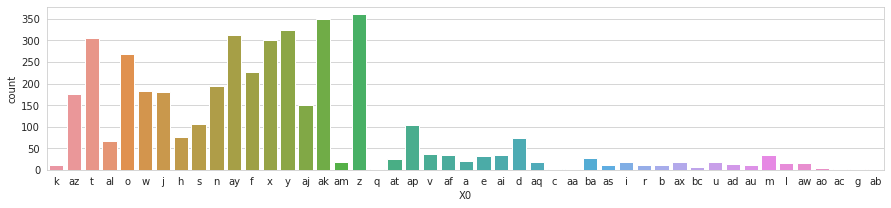

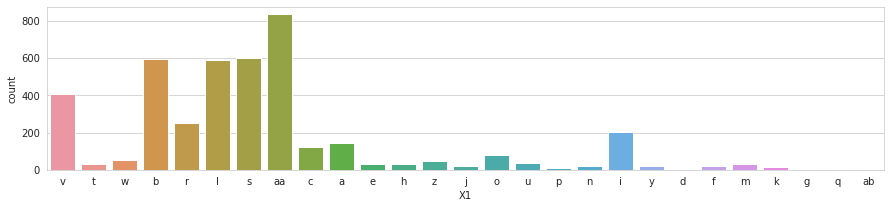

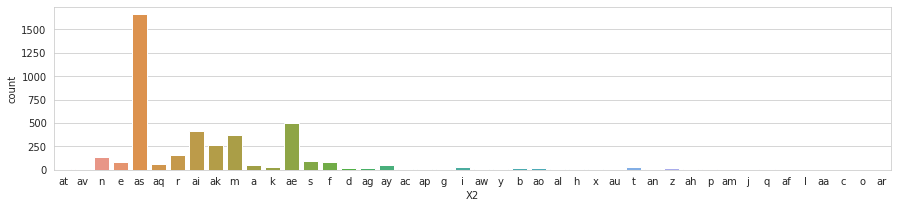

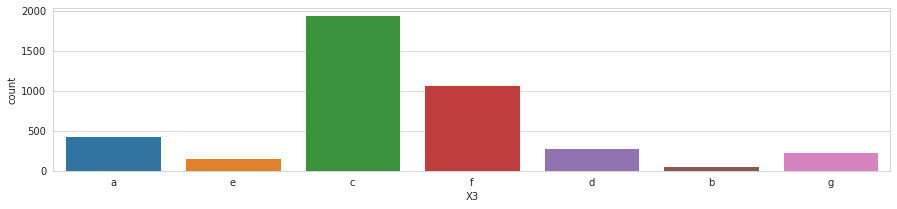

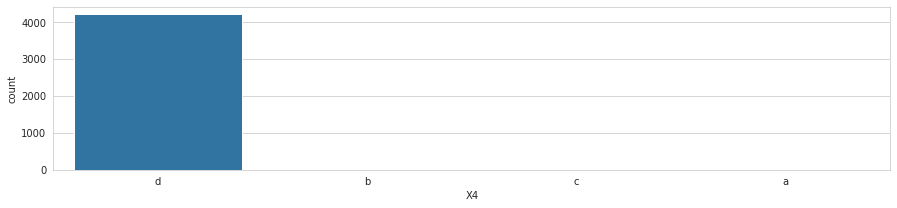

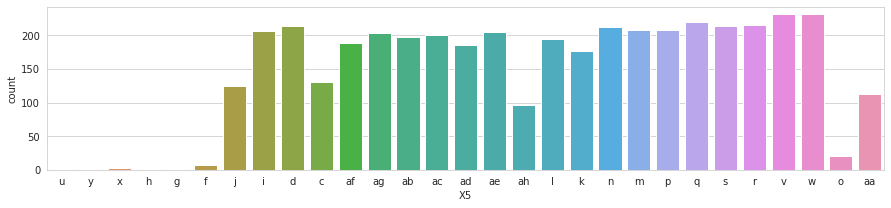

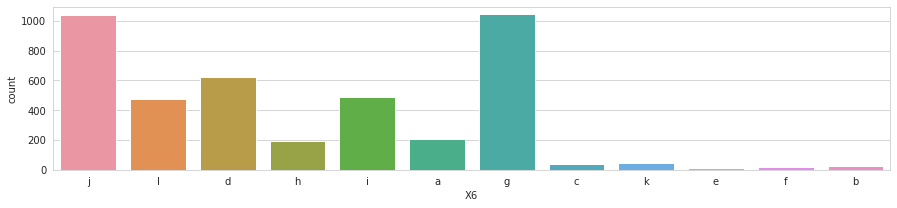

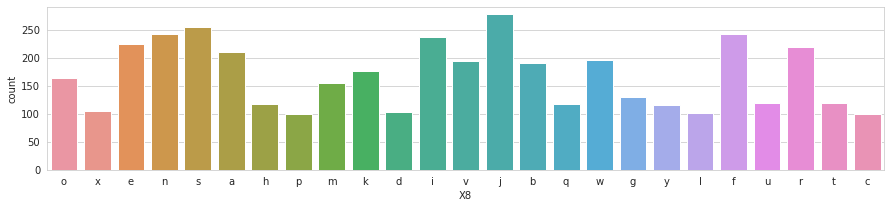

In [ ]:
for col in train[cat_feats].columns:
    plt.figure(figsize=(15,3))
    sns.countplot(x=col,data=train[cat_feats])

**categorical features (test set):**

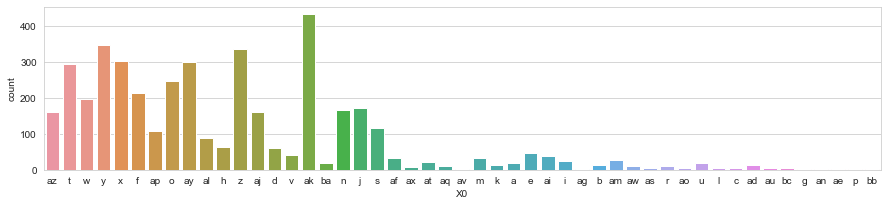

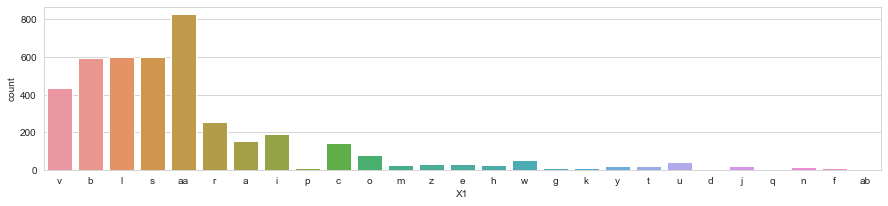

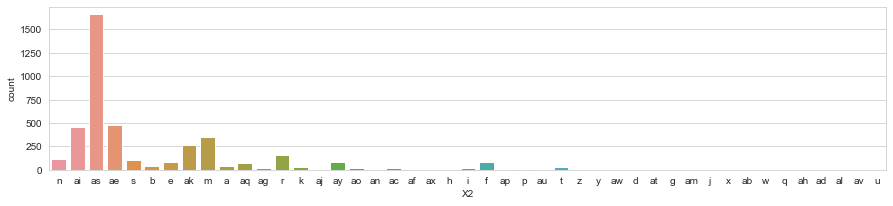

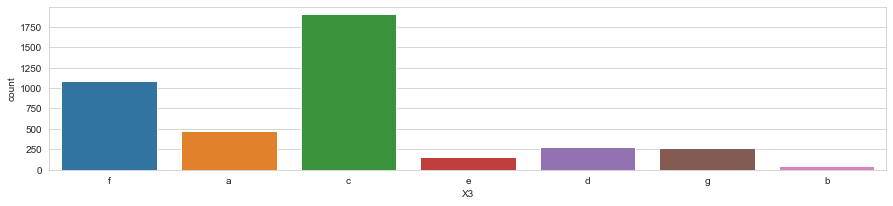

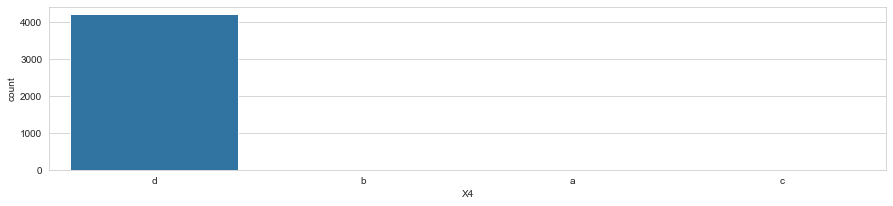

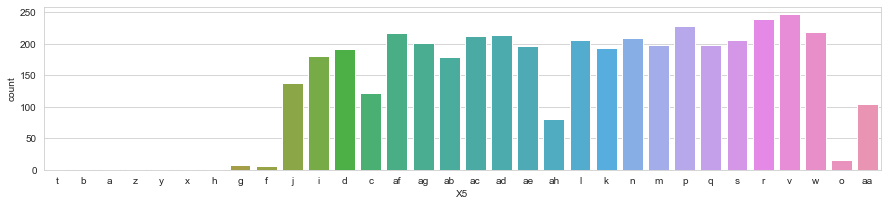

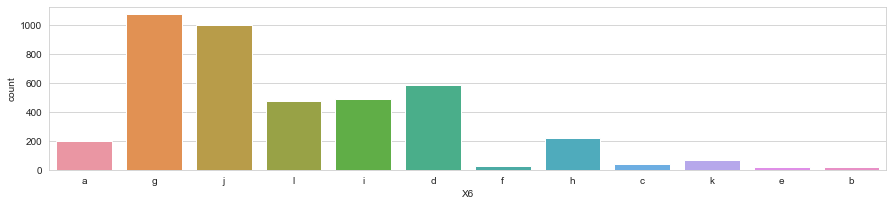

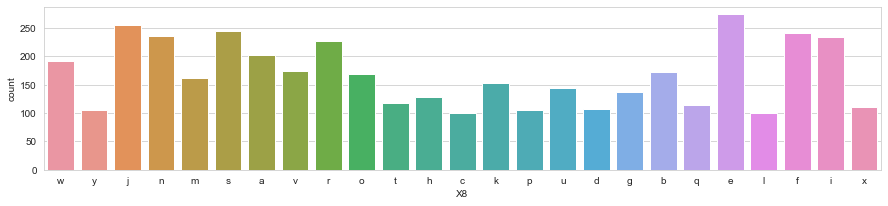

In [ ]:
for col in test[cat_feats].columns:
    plt.figure(figsize=(15,3))
    sns.countplot(x=col,data=test[cat_feats])

**binary features (train set):**

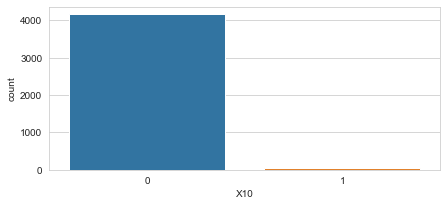

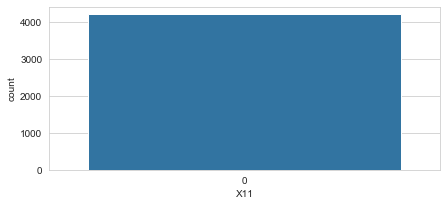

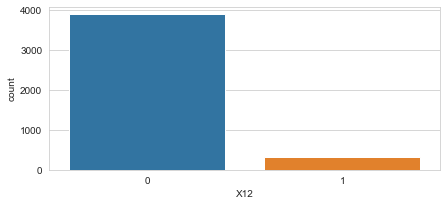

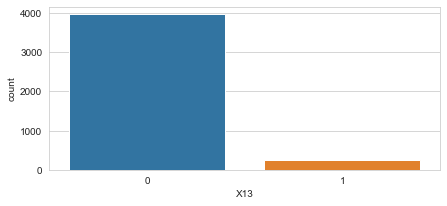

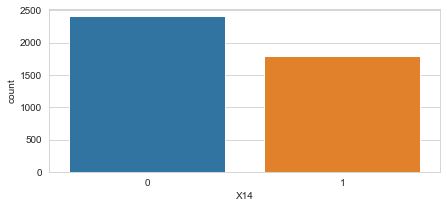

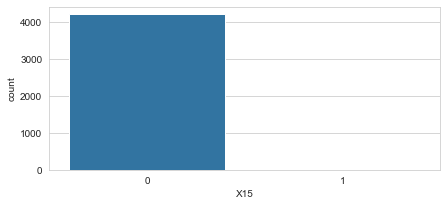

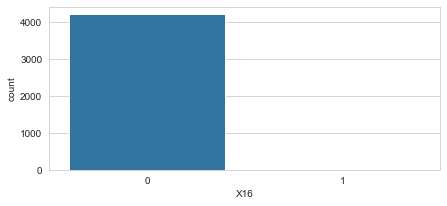

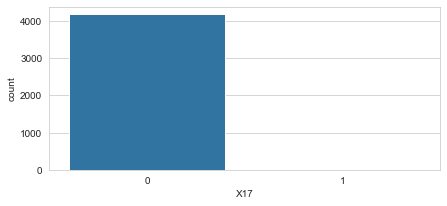

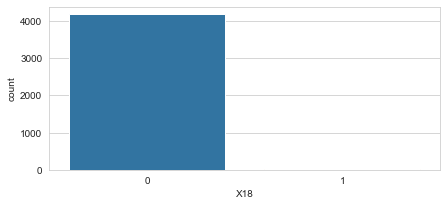

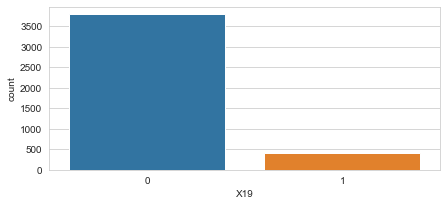

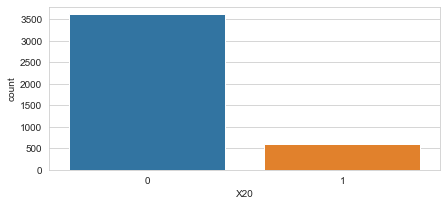

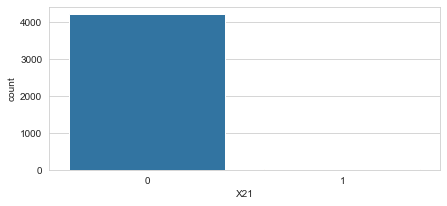

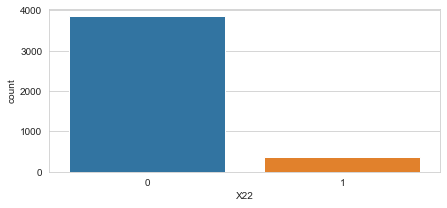

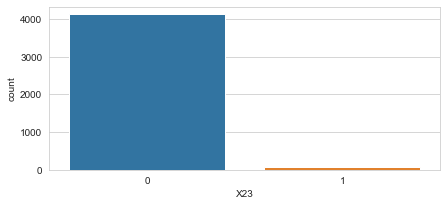

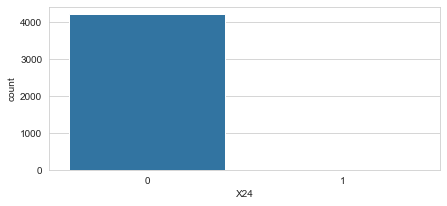

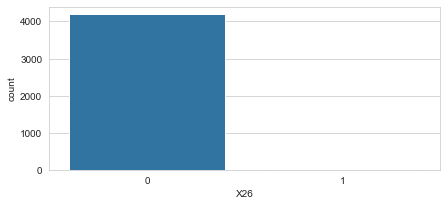

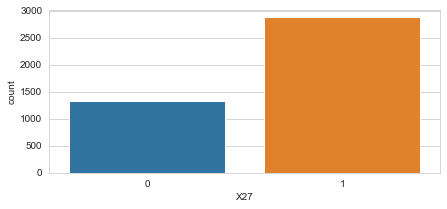

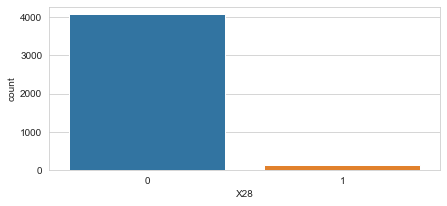

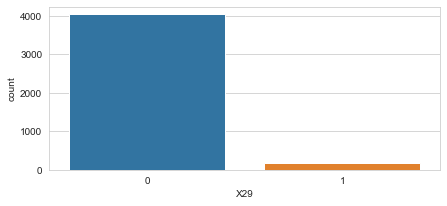

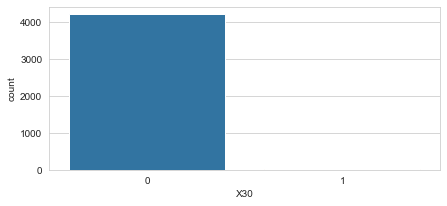

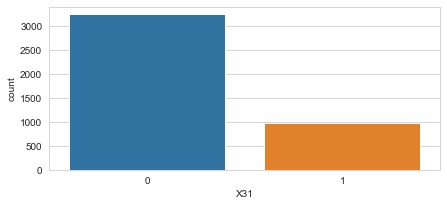

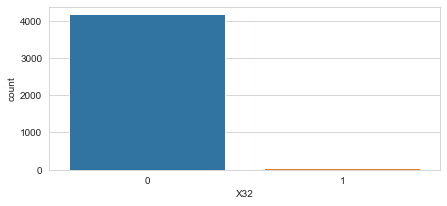

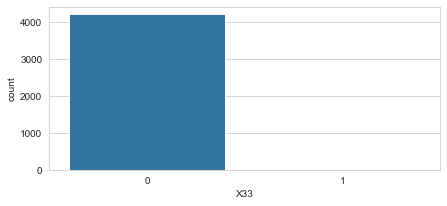

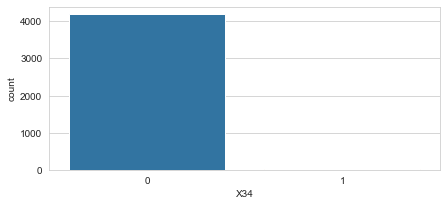

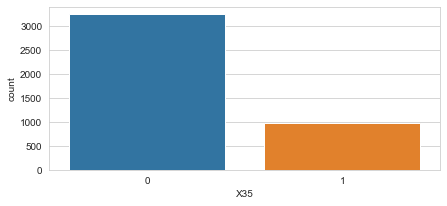

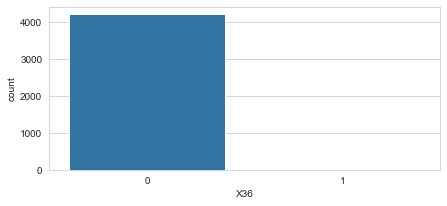

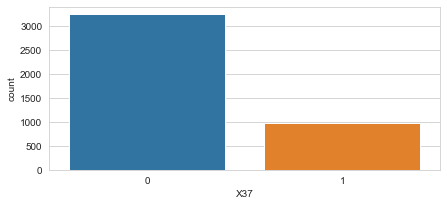

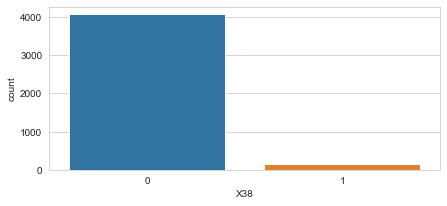

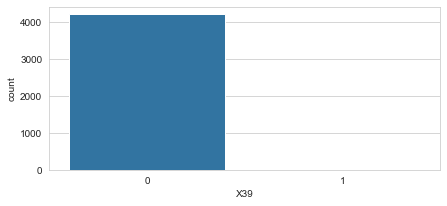

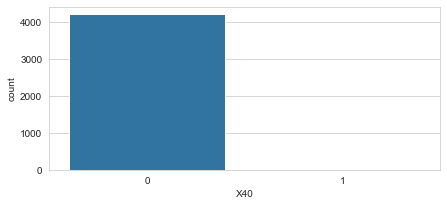

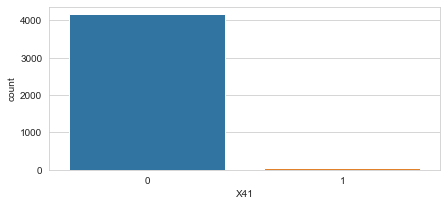

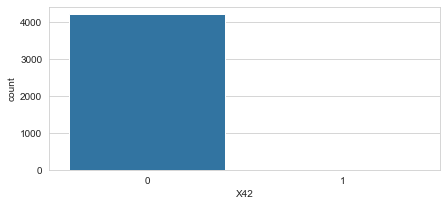

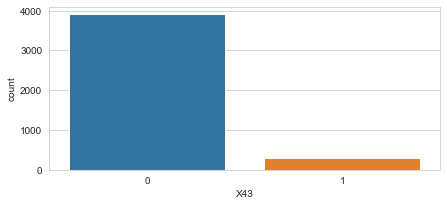

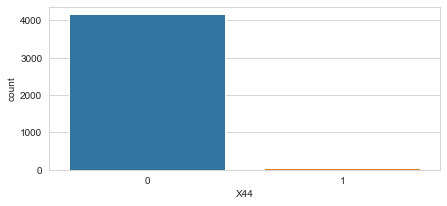

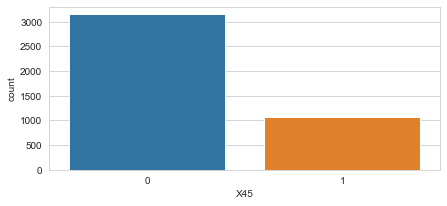

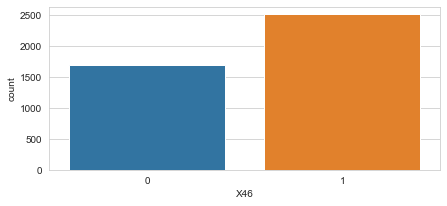

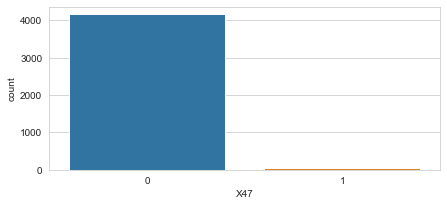

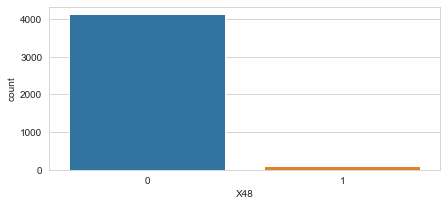

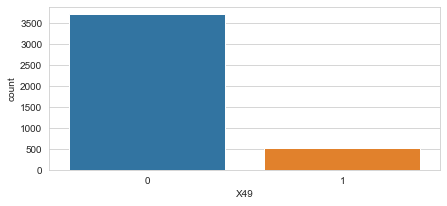

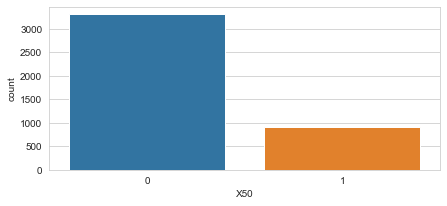

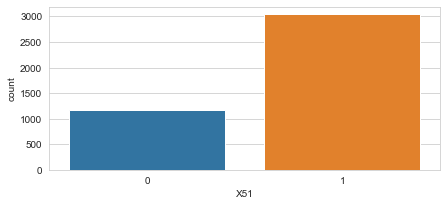

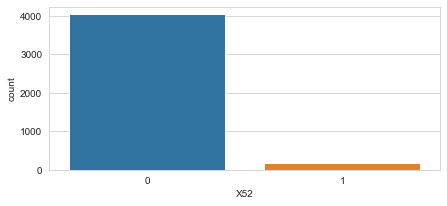

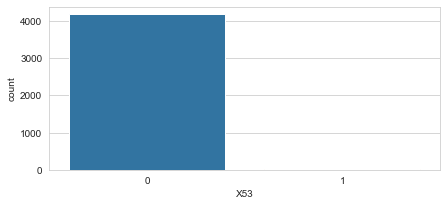

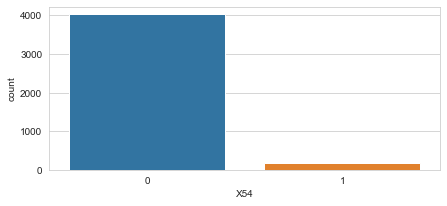

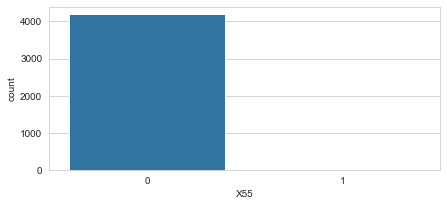

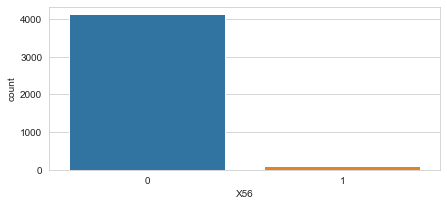

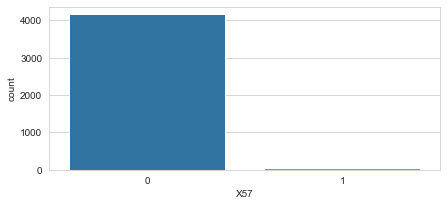

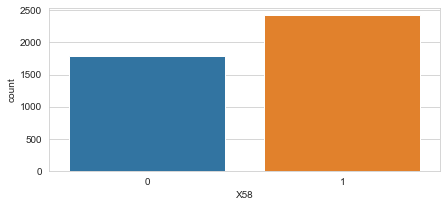

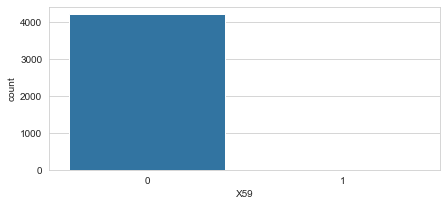

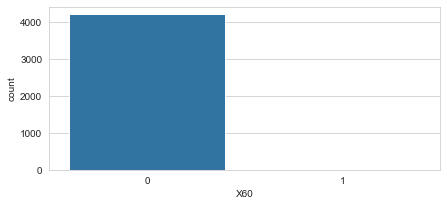

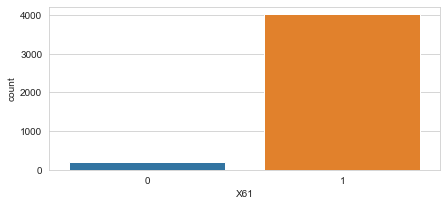

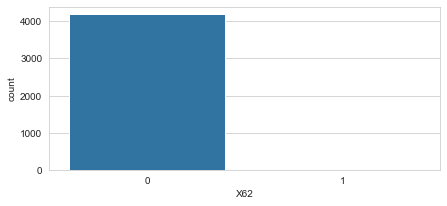

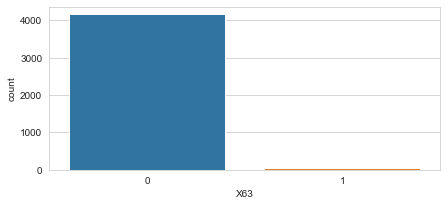

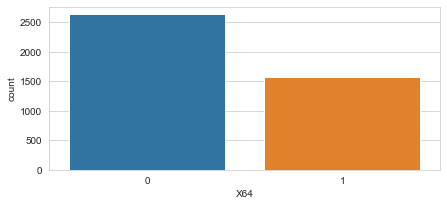

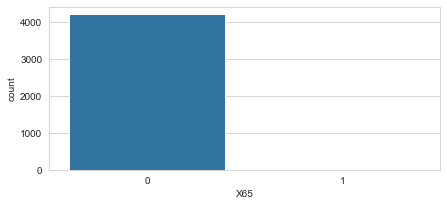

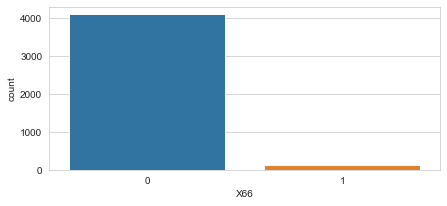

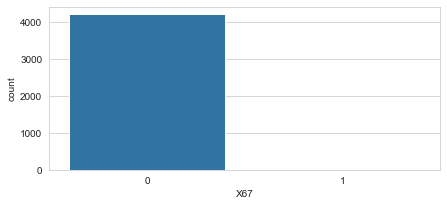

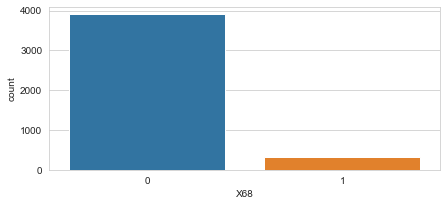

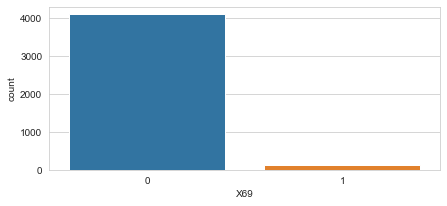

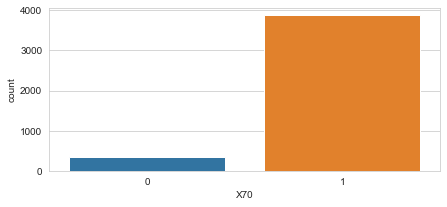

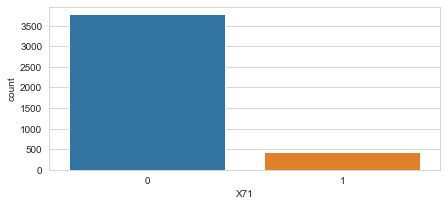

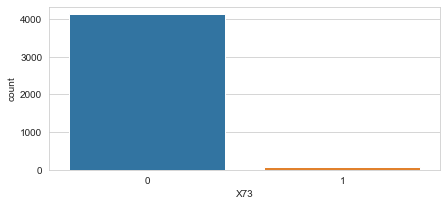

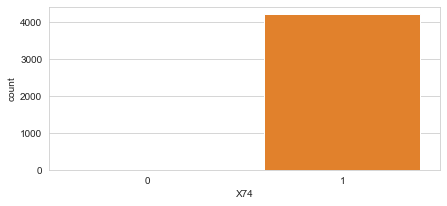

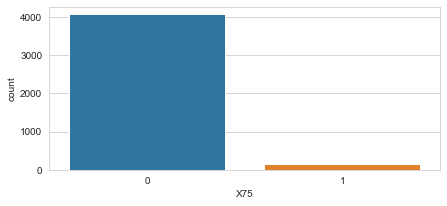

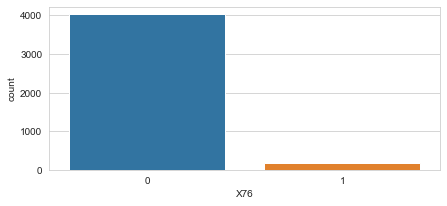

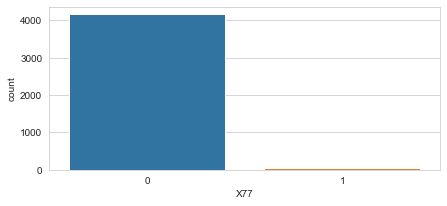

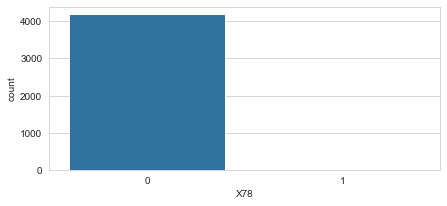

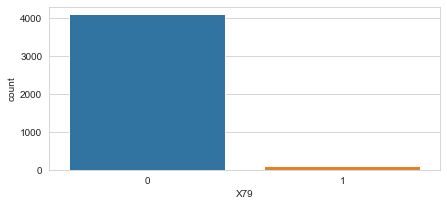

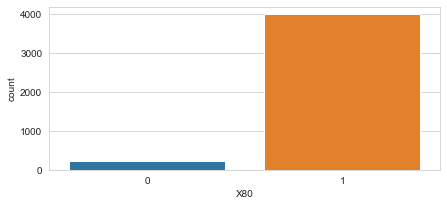

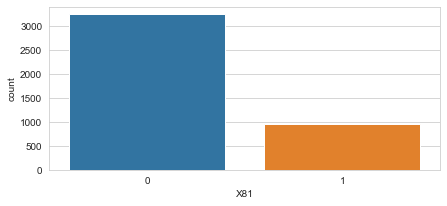

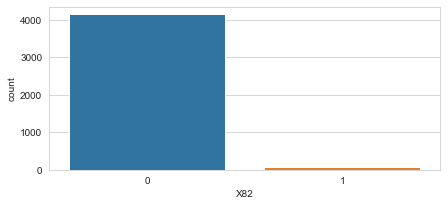

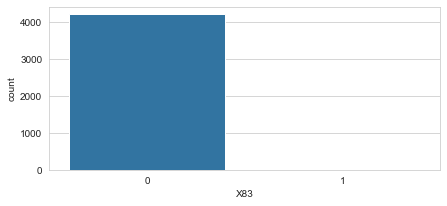

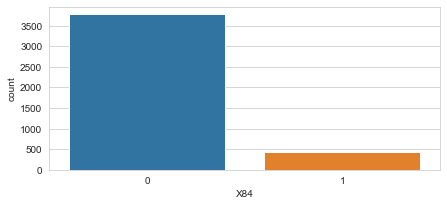

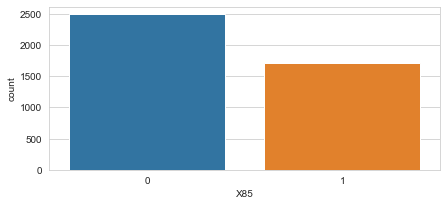

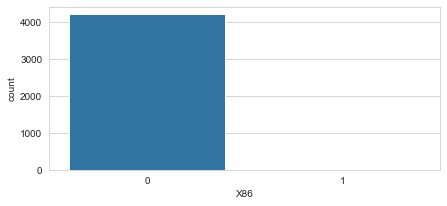

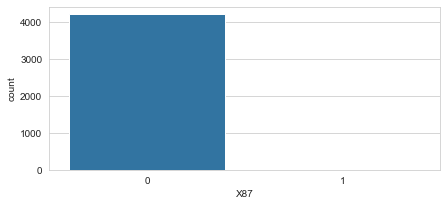

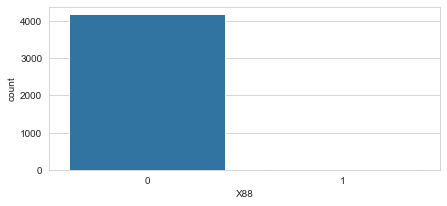

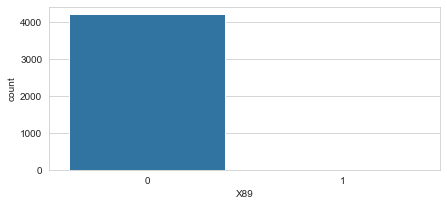

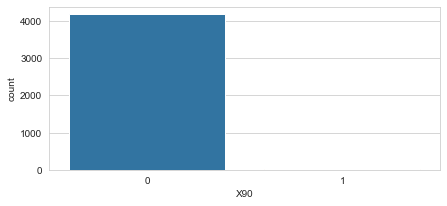

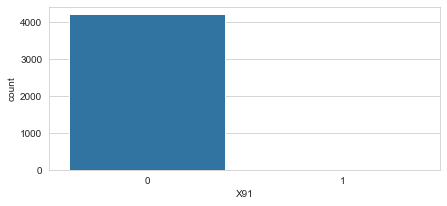

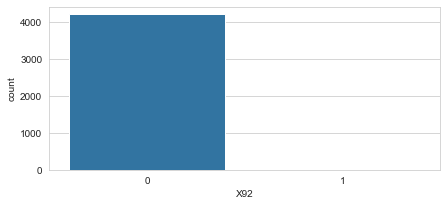

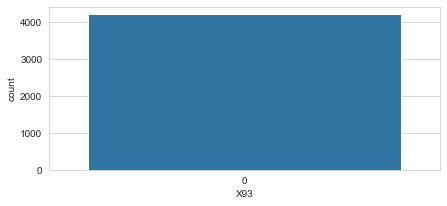

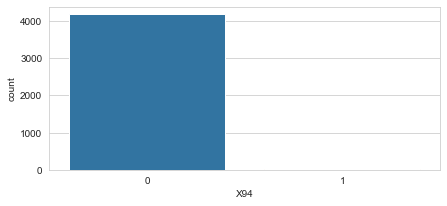

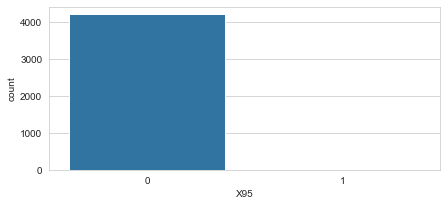

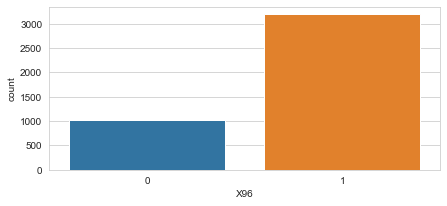

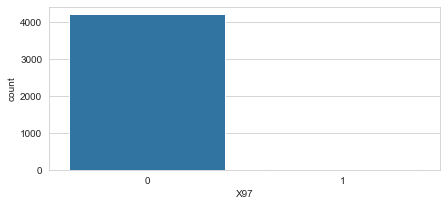

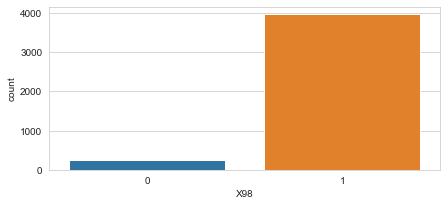

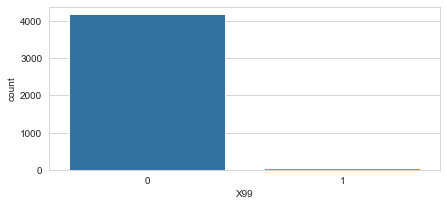

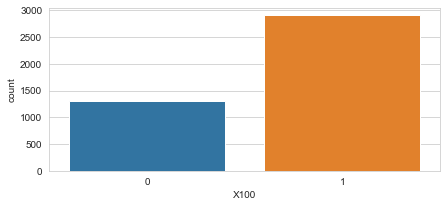

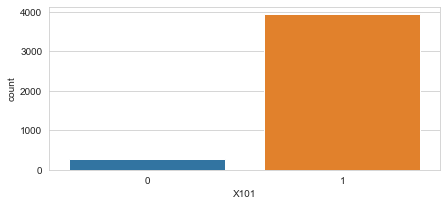

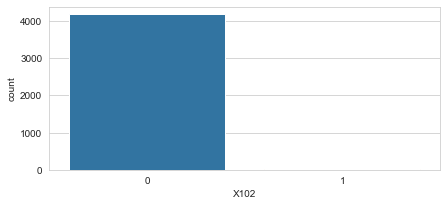

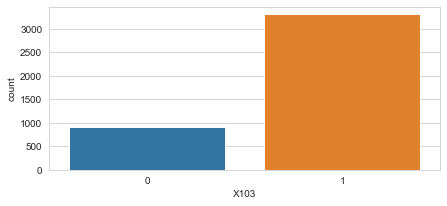

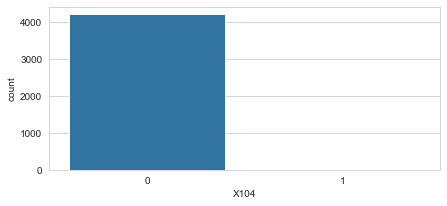

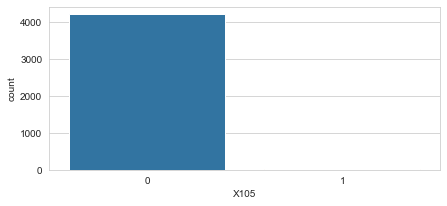

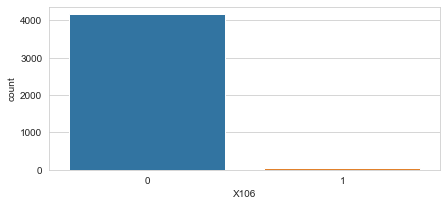

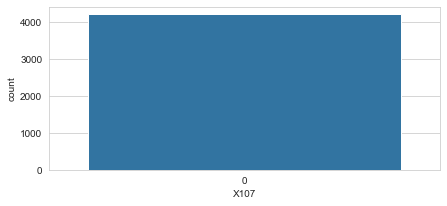

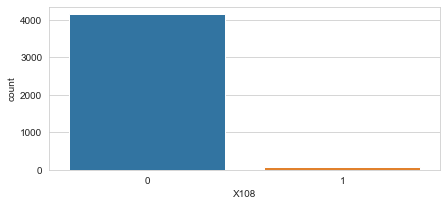

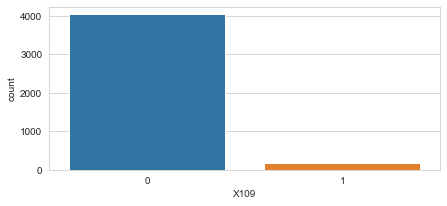

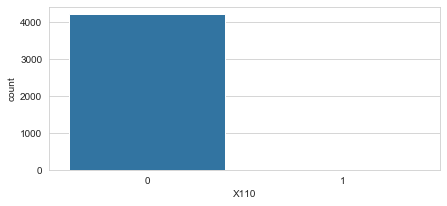

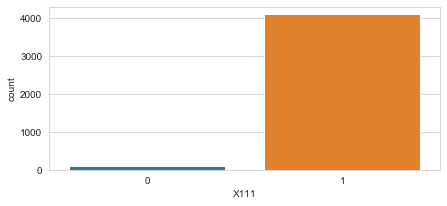

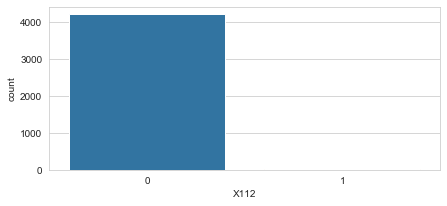

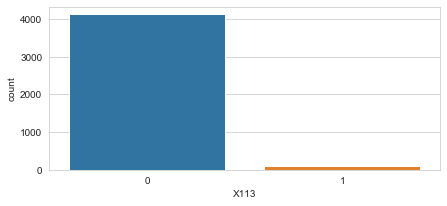

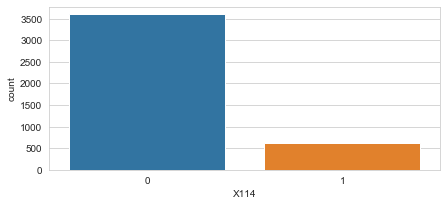

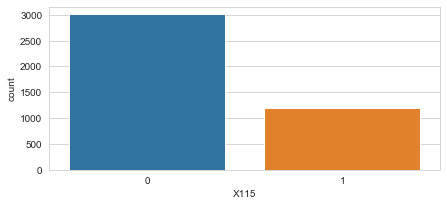

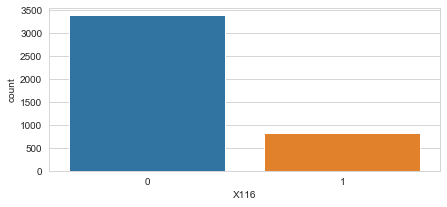

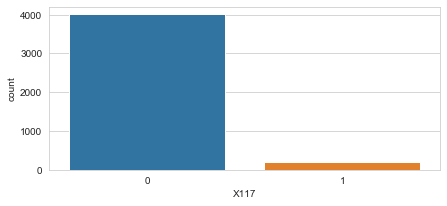

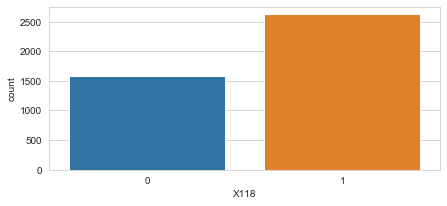

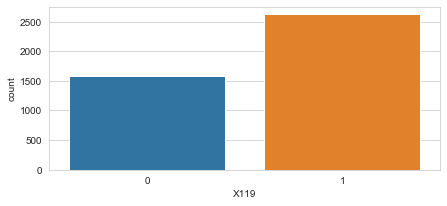

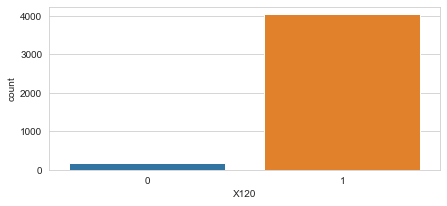

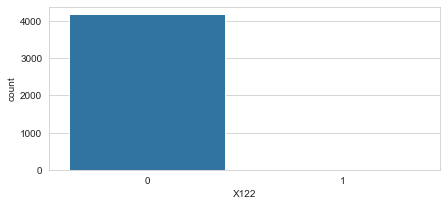

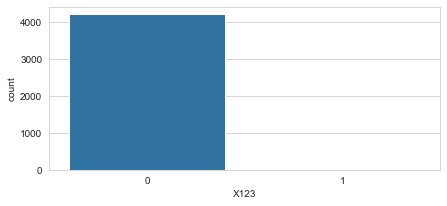

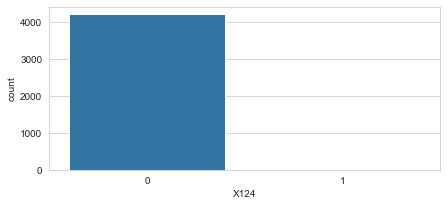

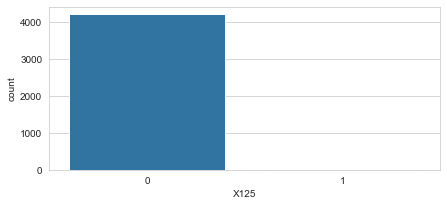

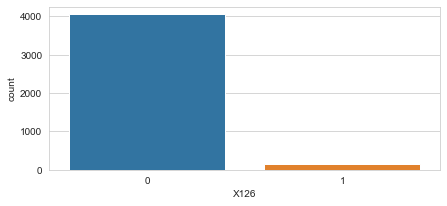

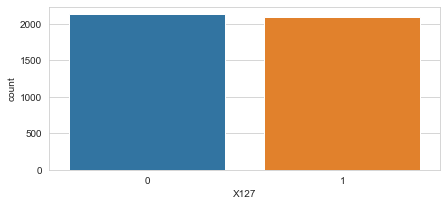

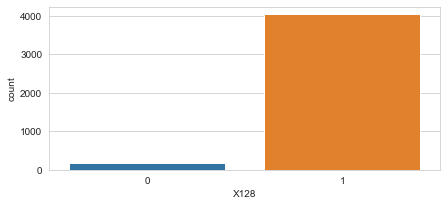

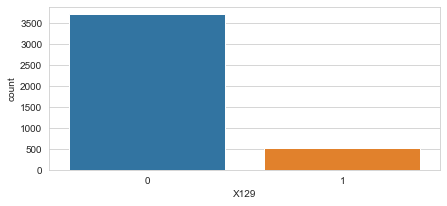

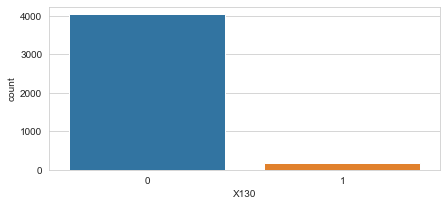

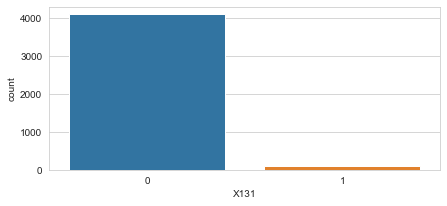

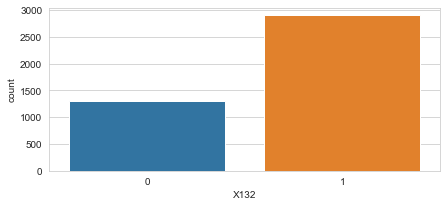

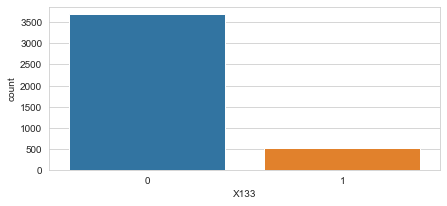

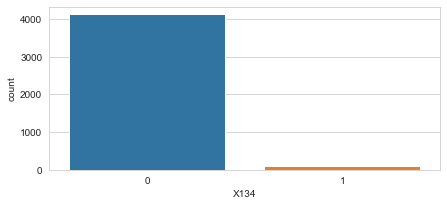

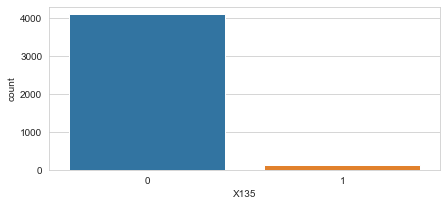

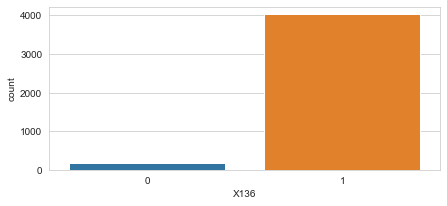

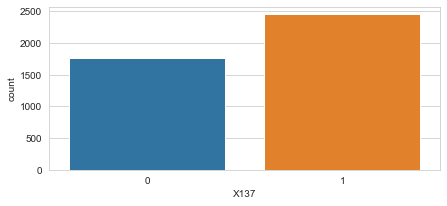

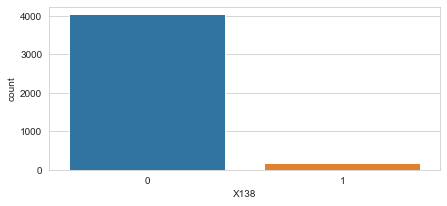

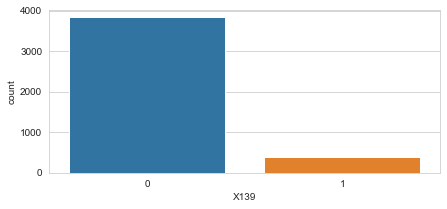

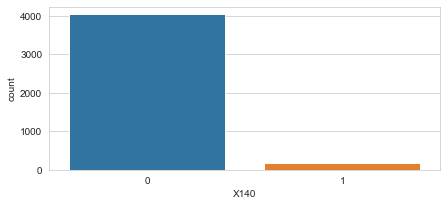

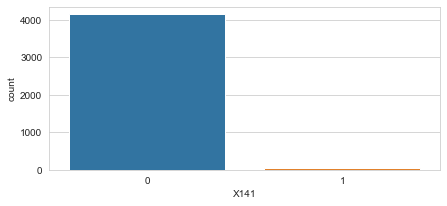

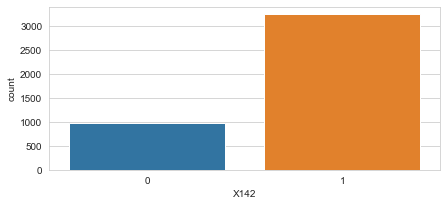

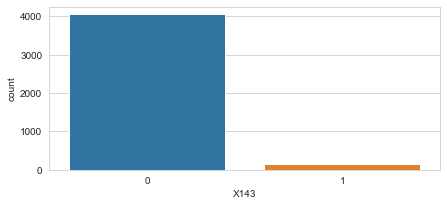

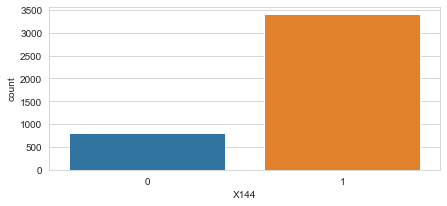

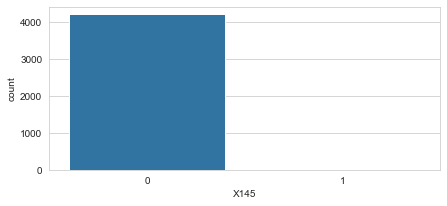

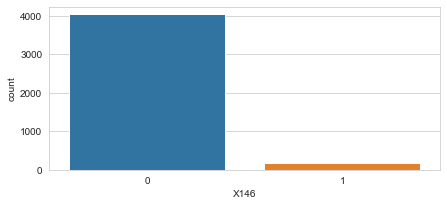

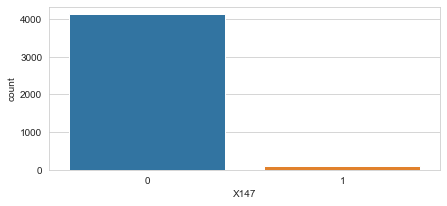

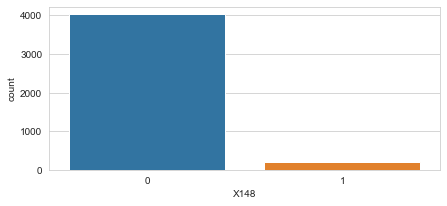

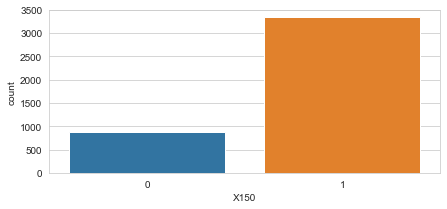

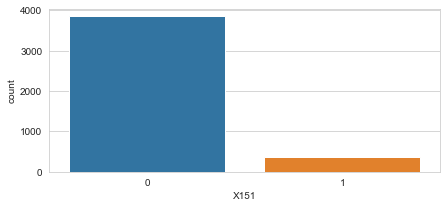

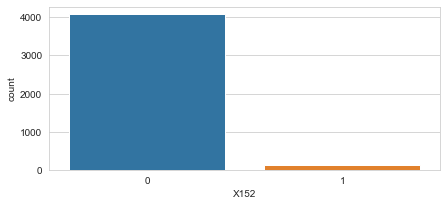

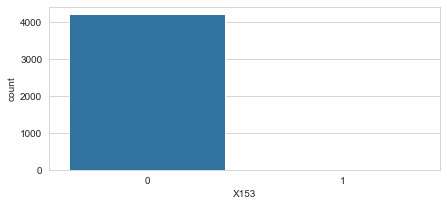

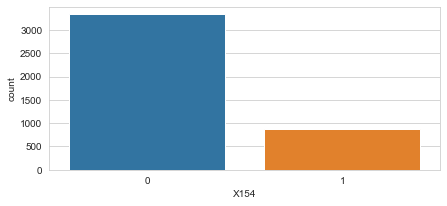

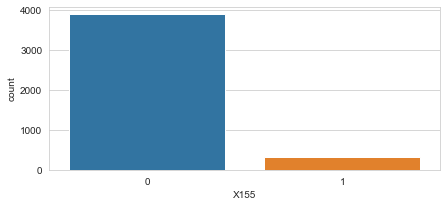

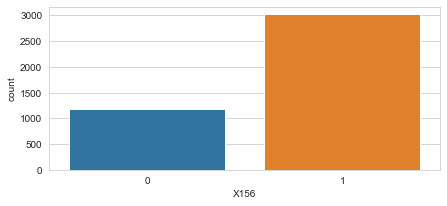

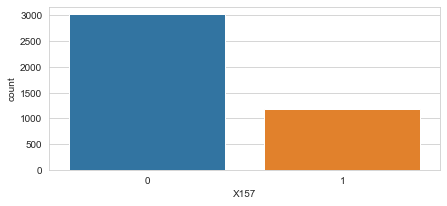

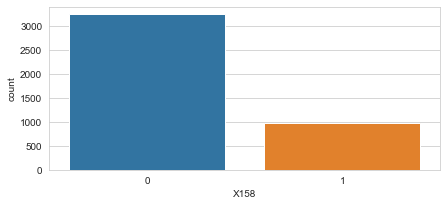

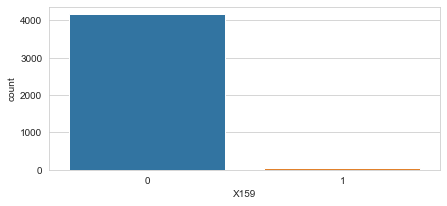

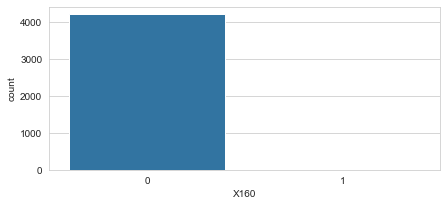

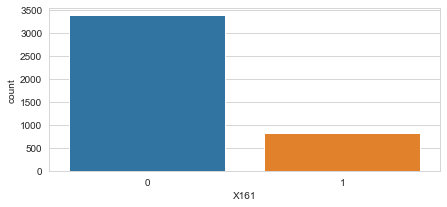

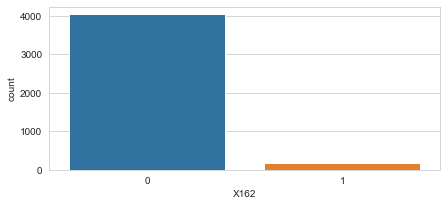

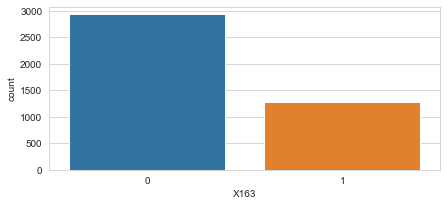

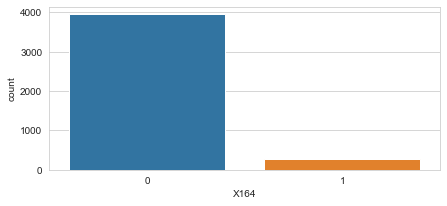

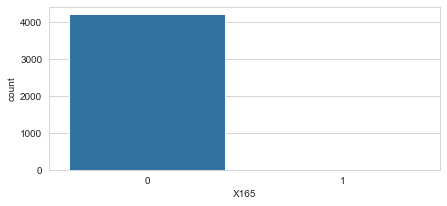

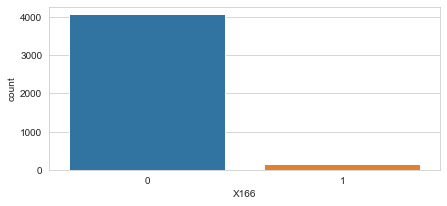

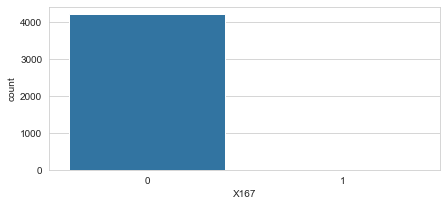

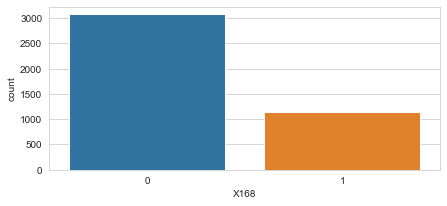

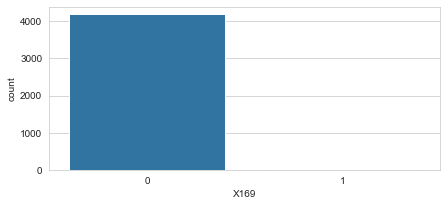

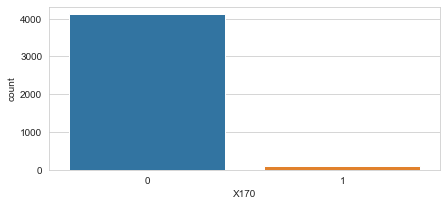

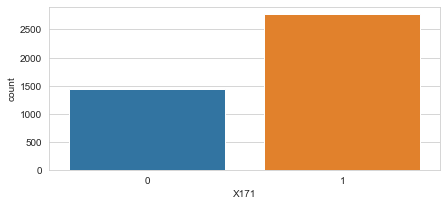

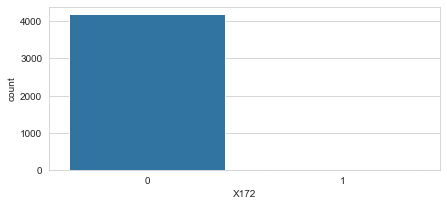

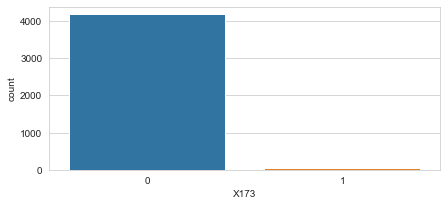

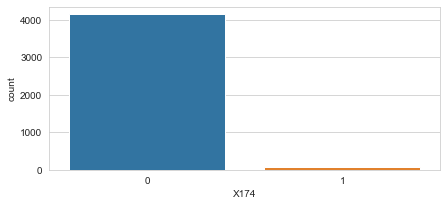

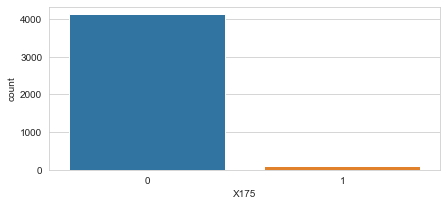

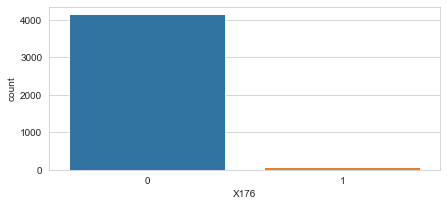

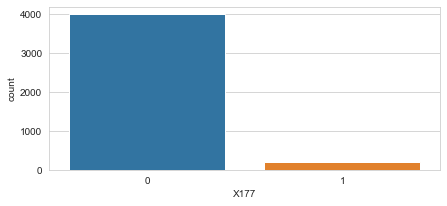

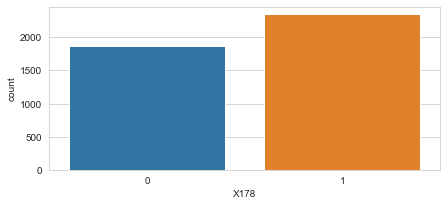

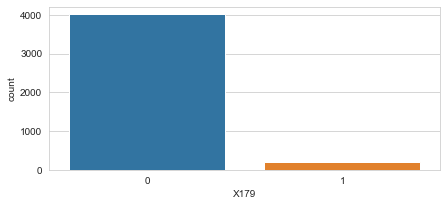

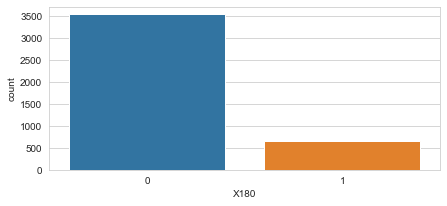

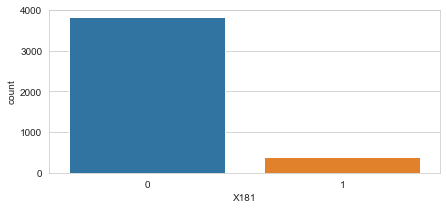

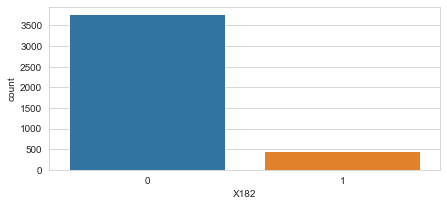

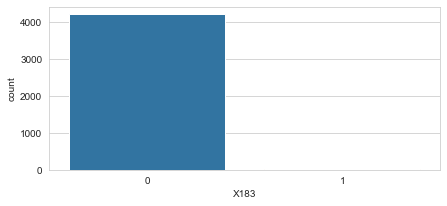

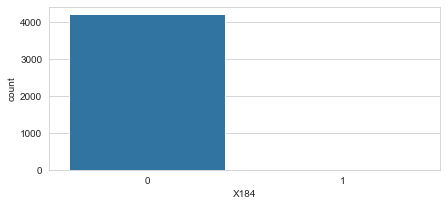

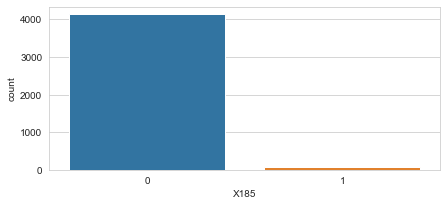

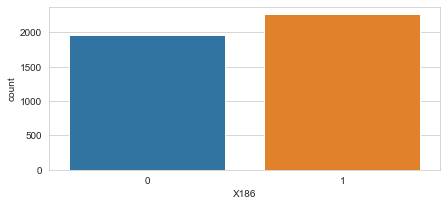

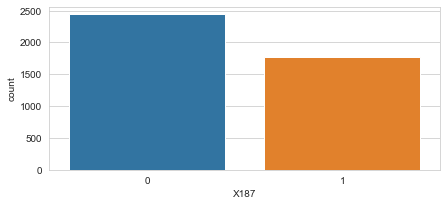

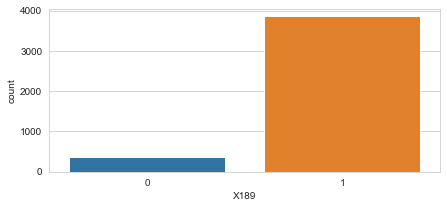

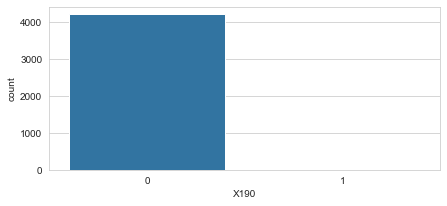

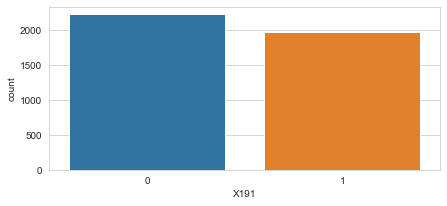

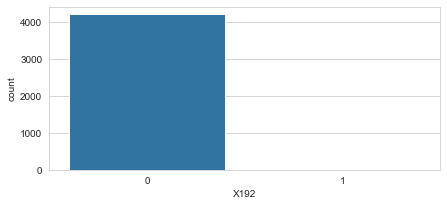

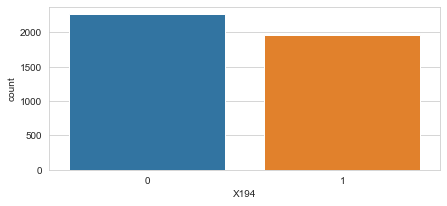

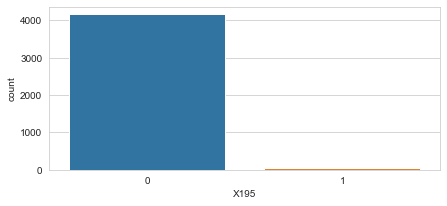

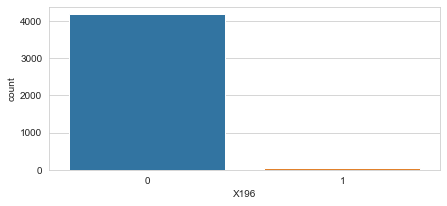

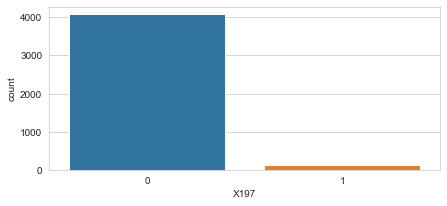

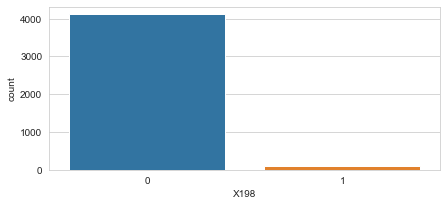

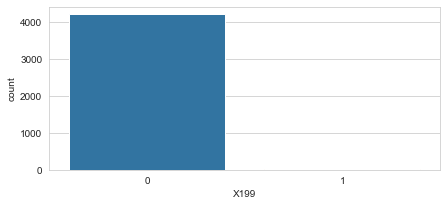

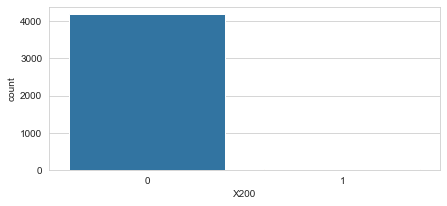

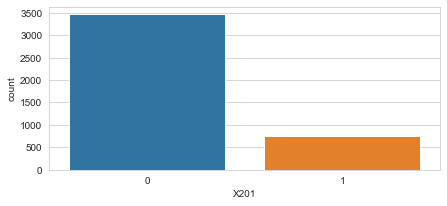

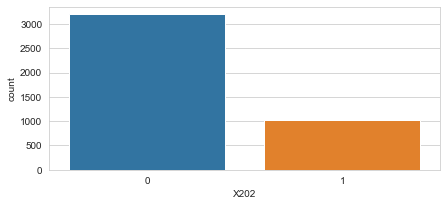

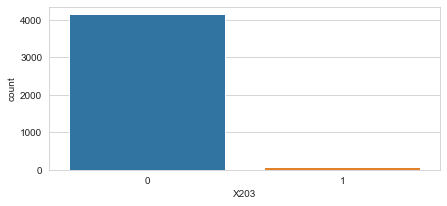

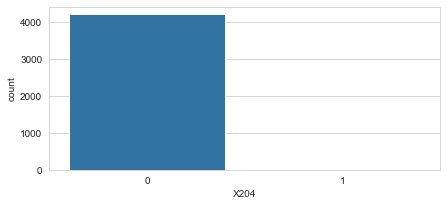

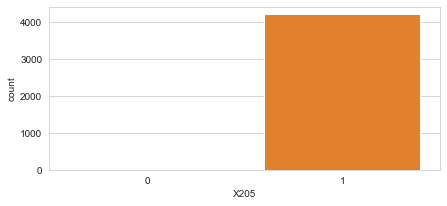

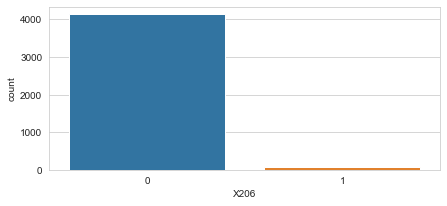

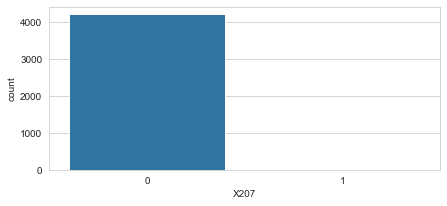

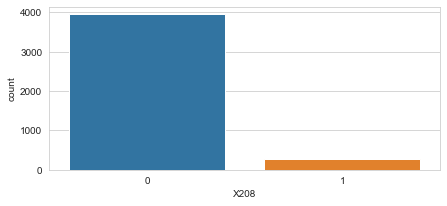

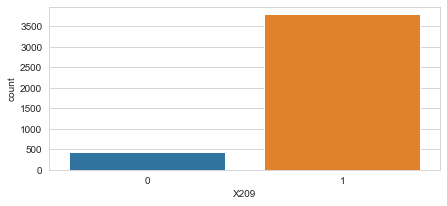

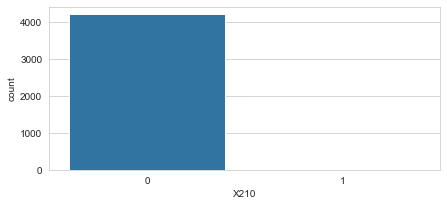

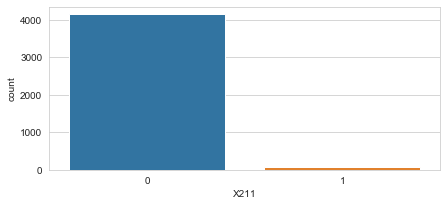

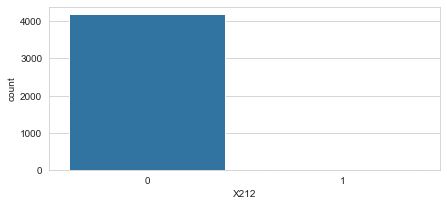

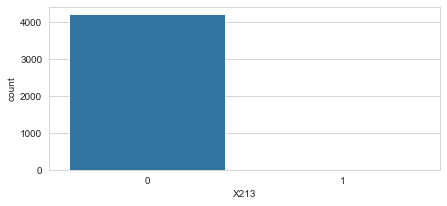

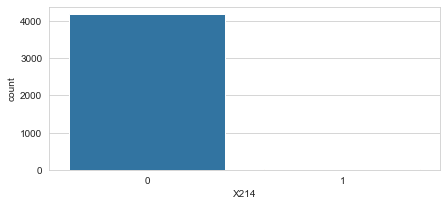

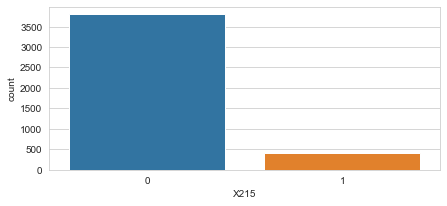

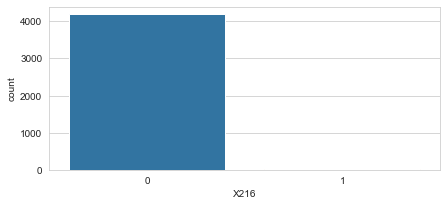

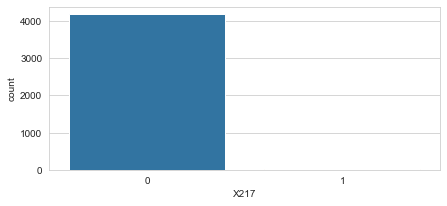

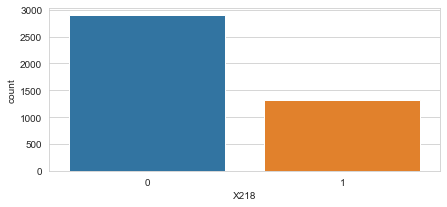

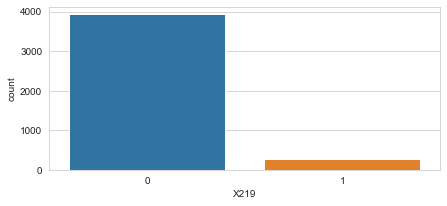

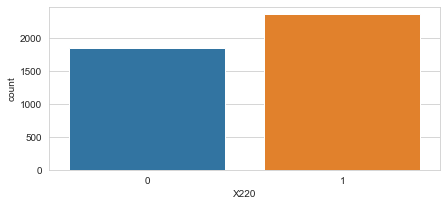

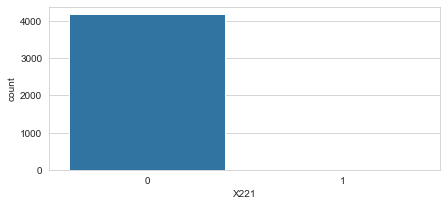

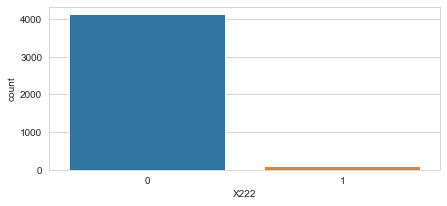

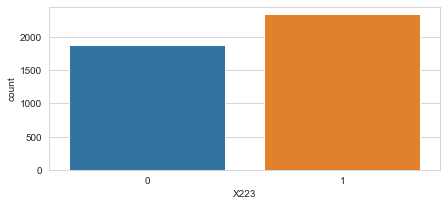

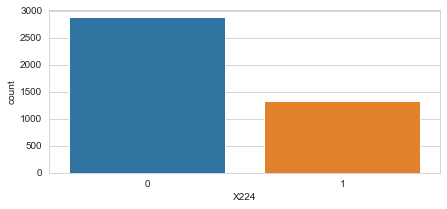

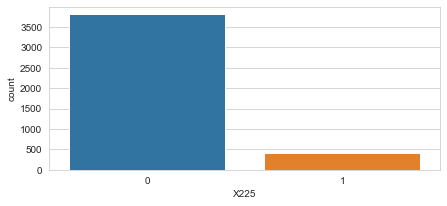

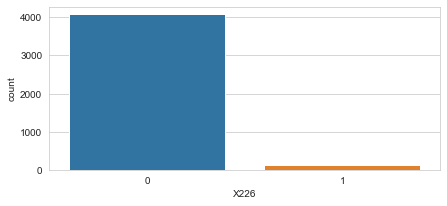

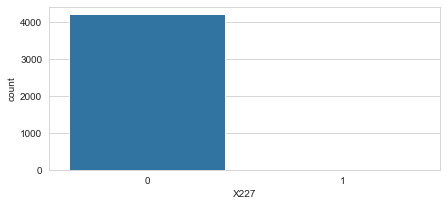

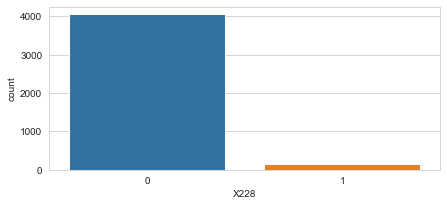

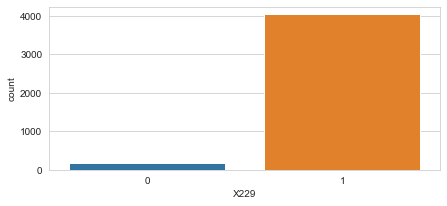

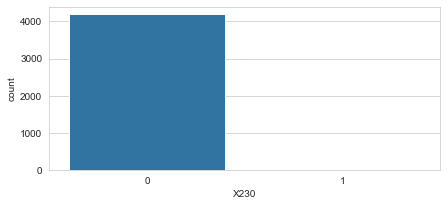

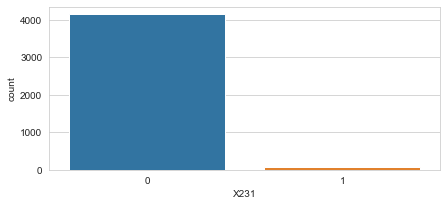

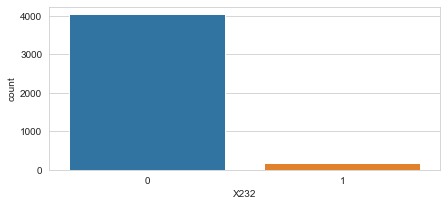

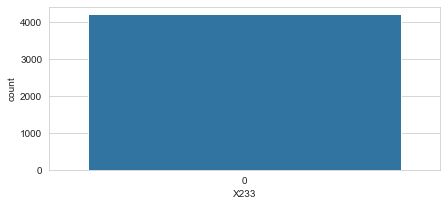

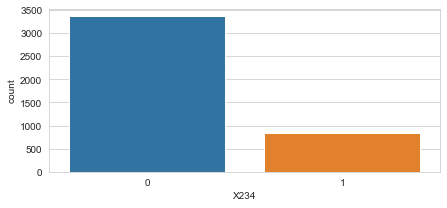

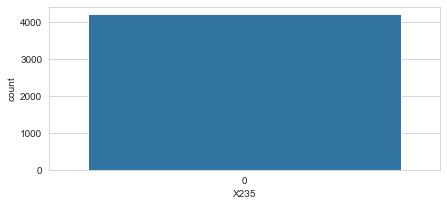

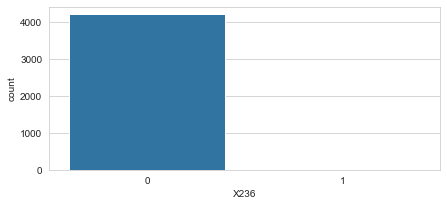

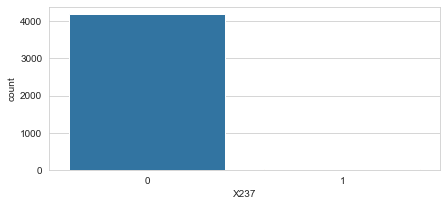

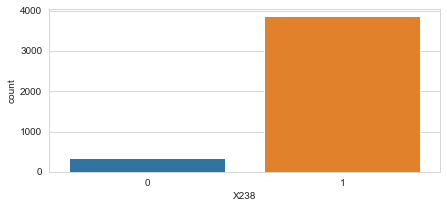

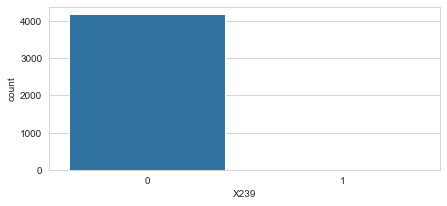

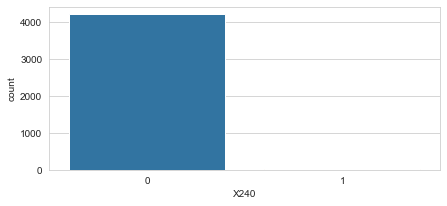

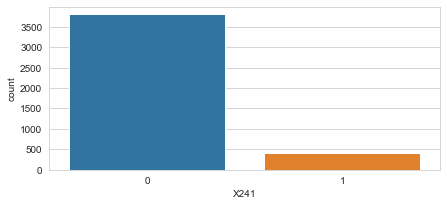

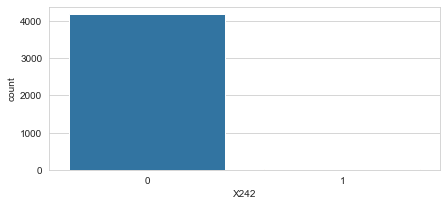

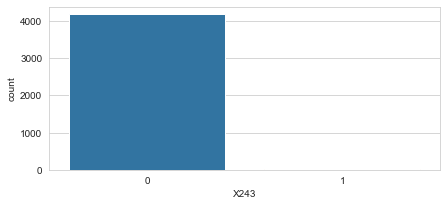

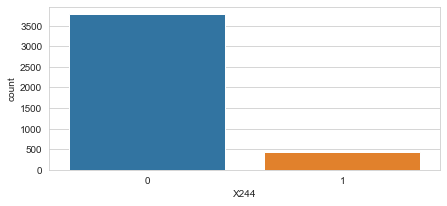

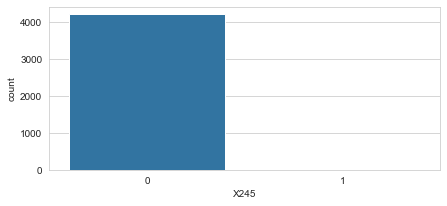

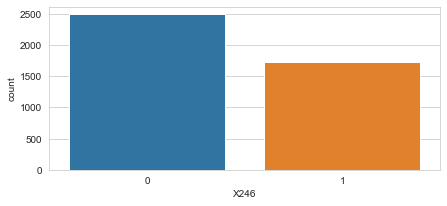

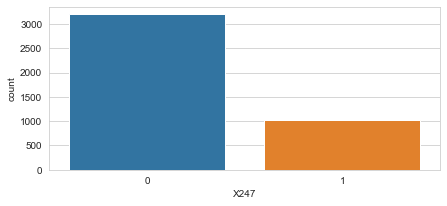

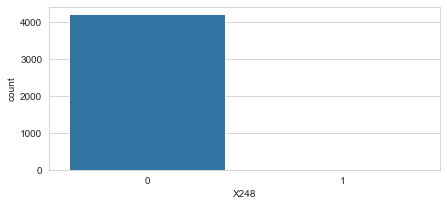

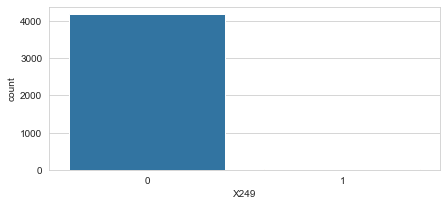

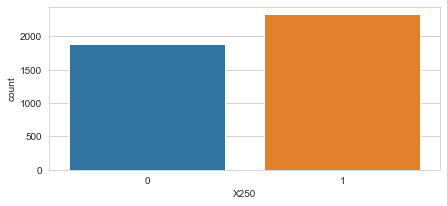

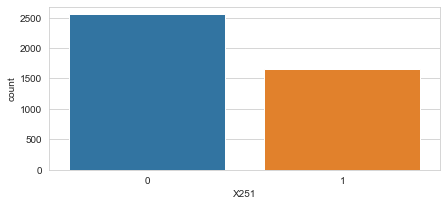

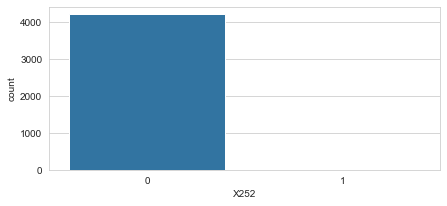

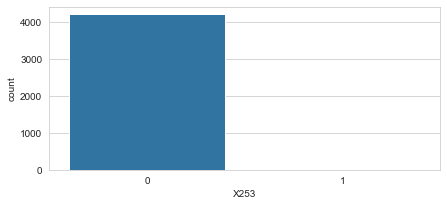

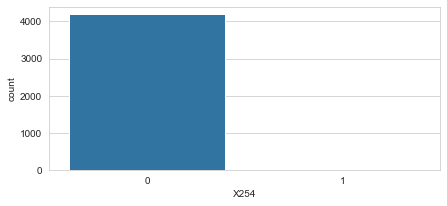

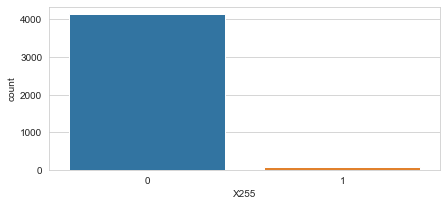

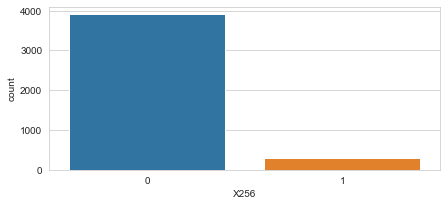

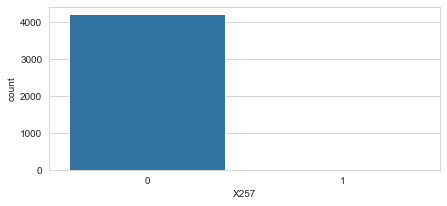

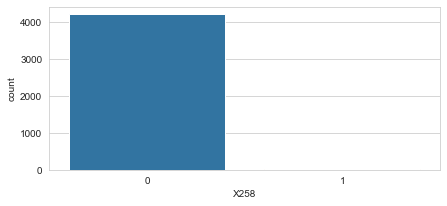

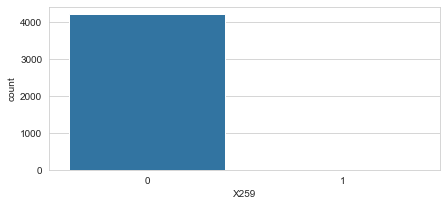

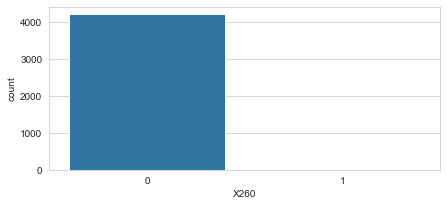

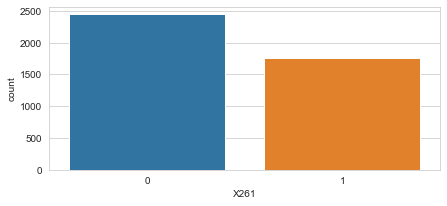

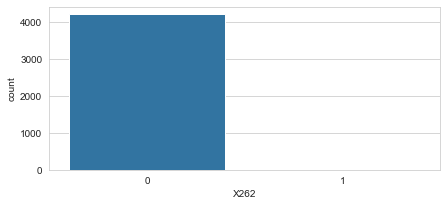

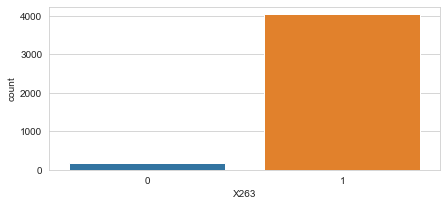

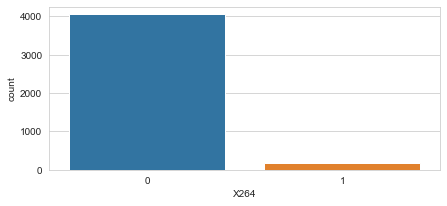

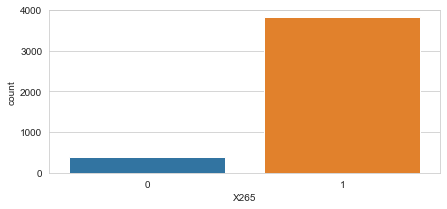

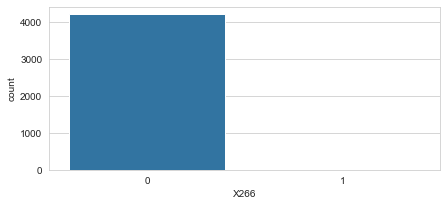

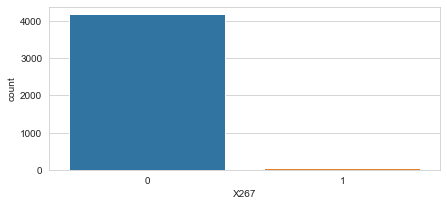

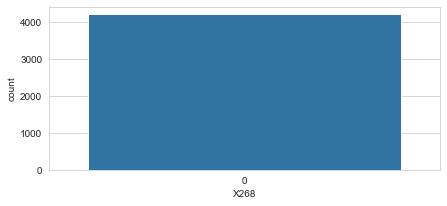

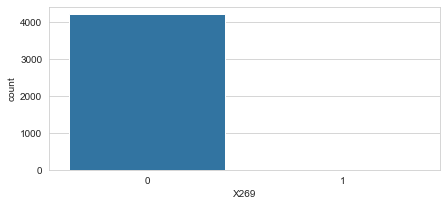

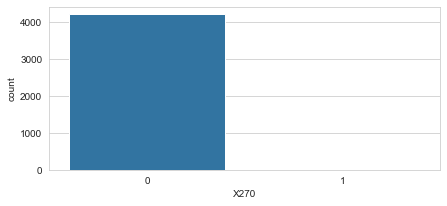

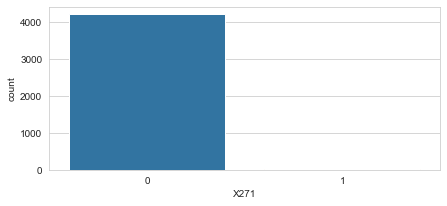

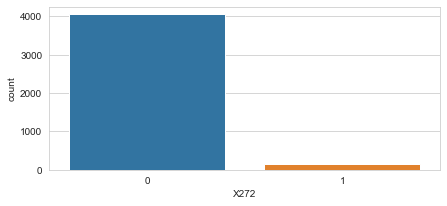

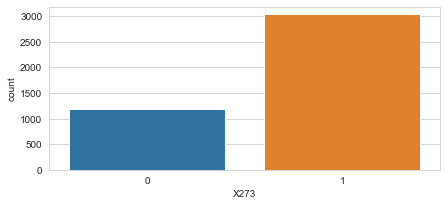

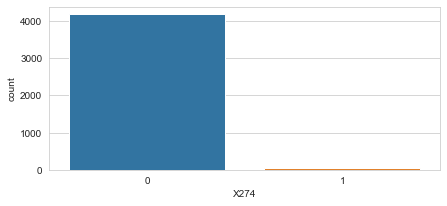

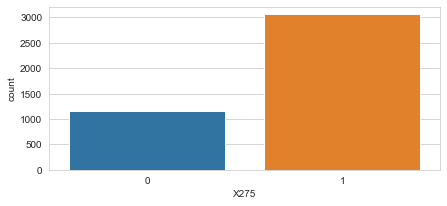

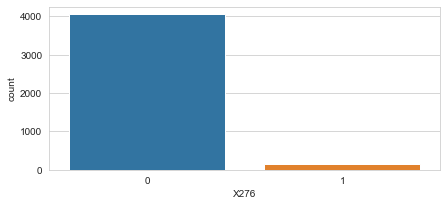

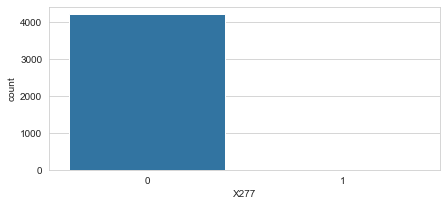

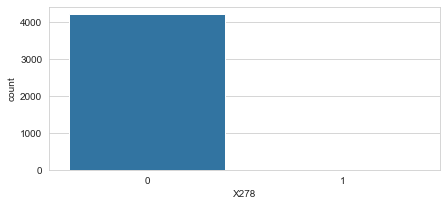

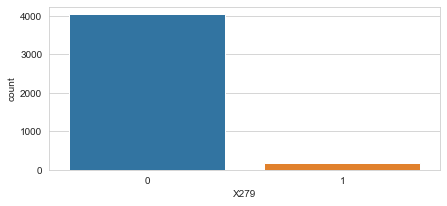

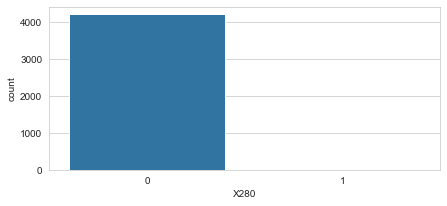

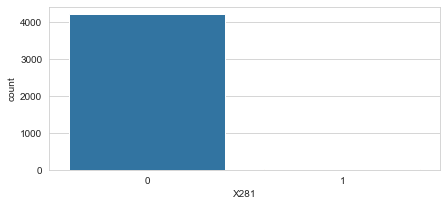

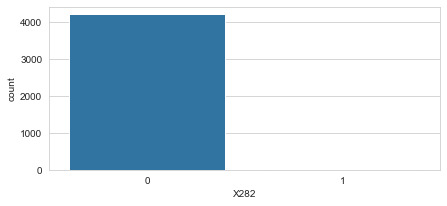

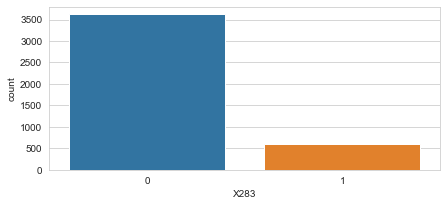

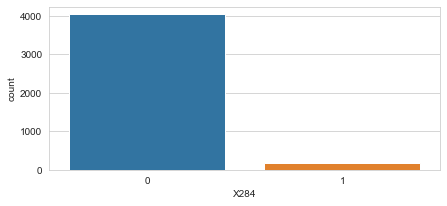

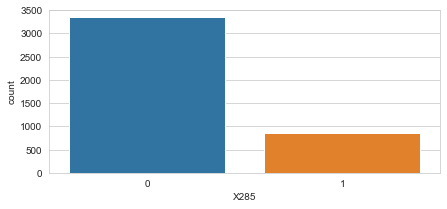

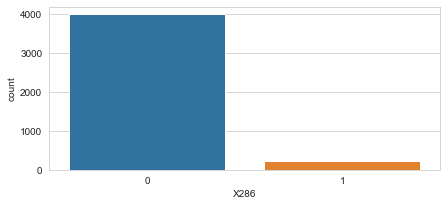

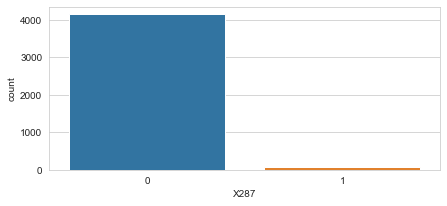

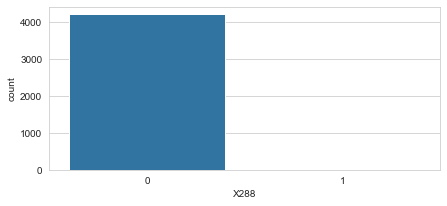

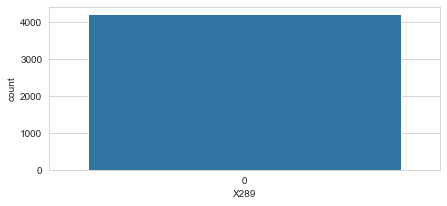

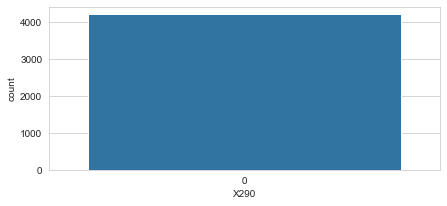

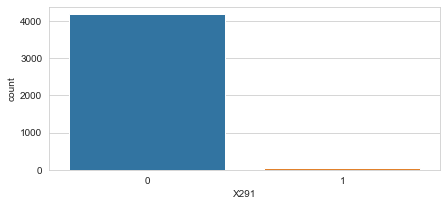

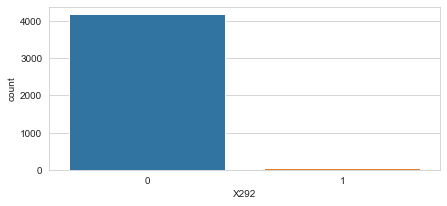

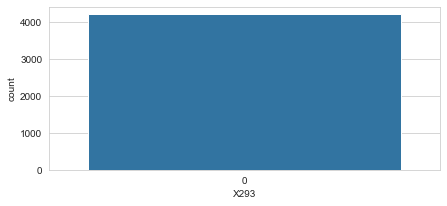

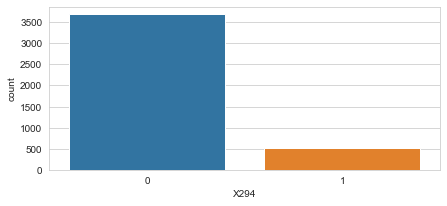

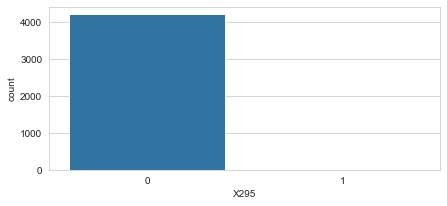

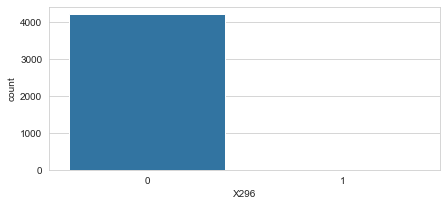

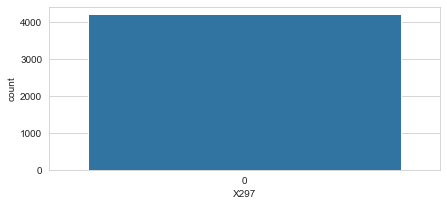

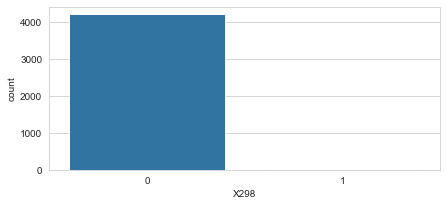

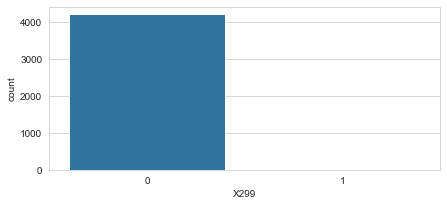

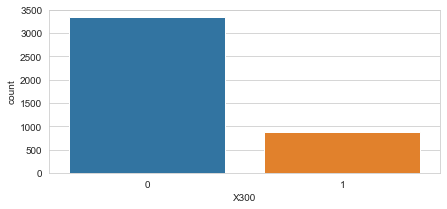

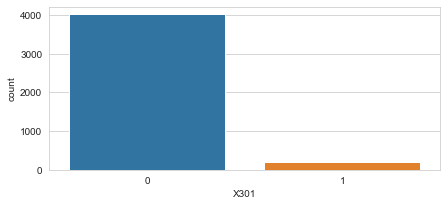

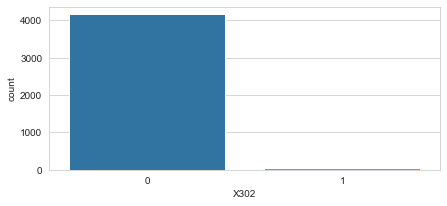

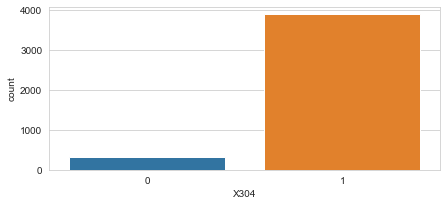

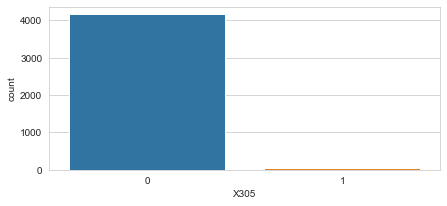

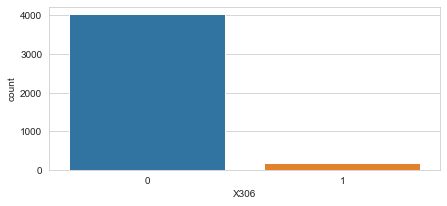

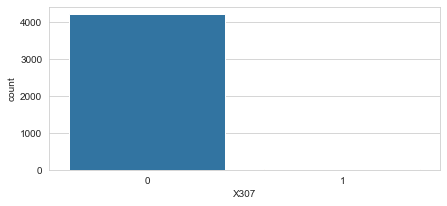

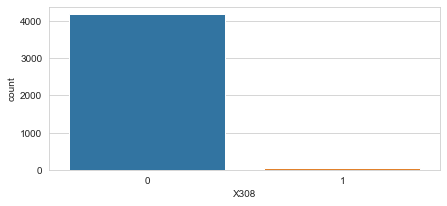

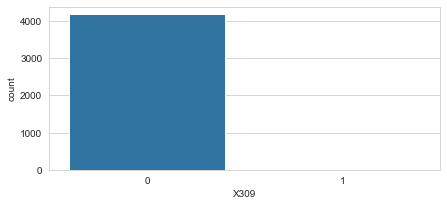

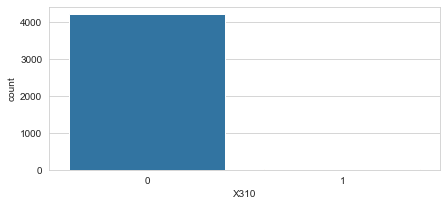

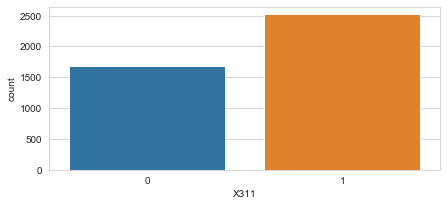

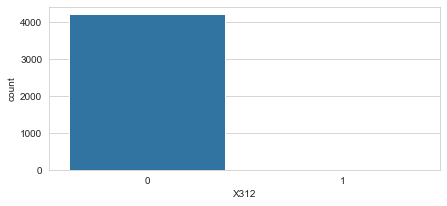

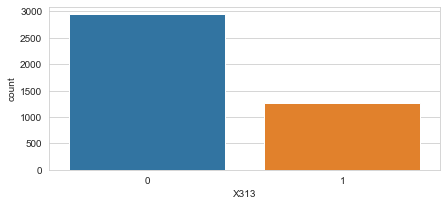

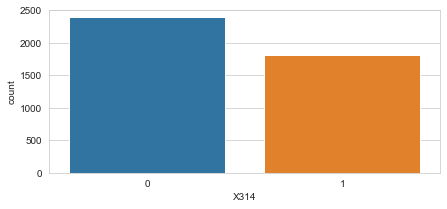

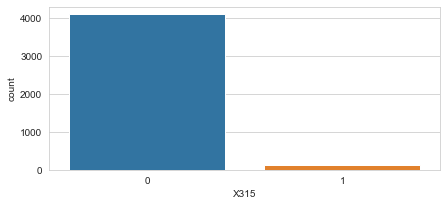

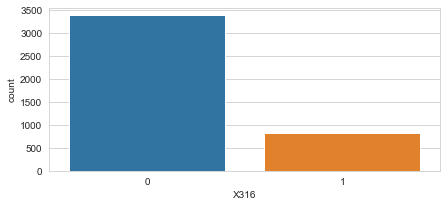

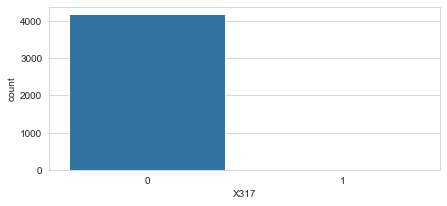

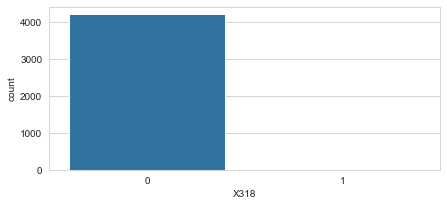

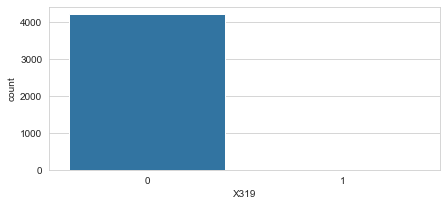

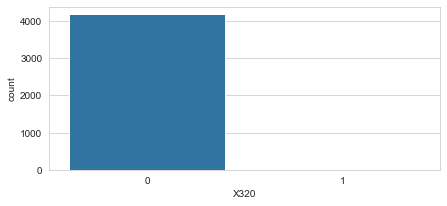

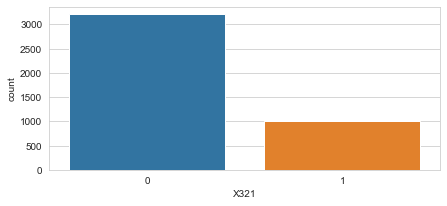

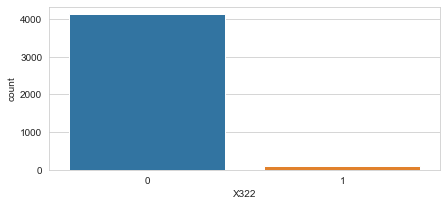

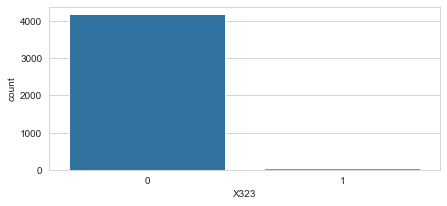

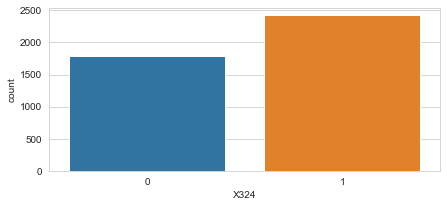

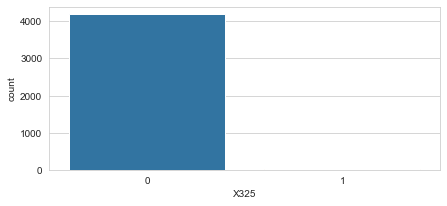

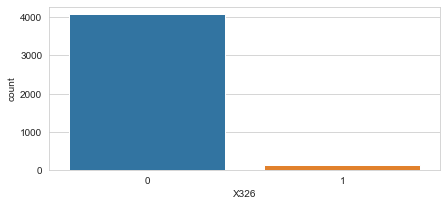

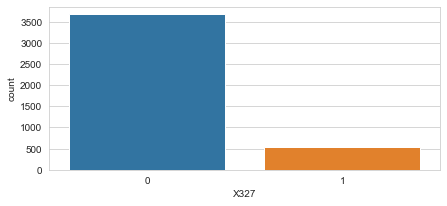

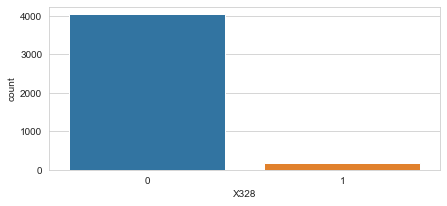

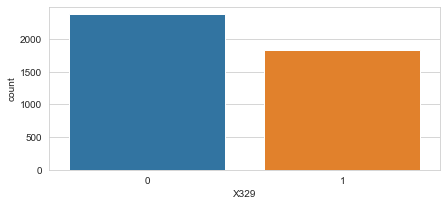

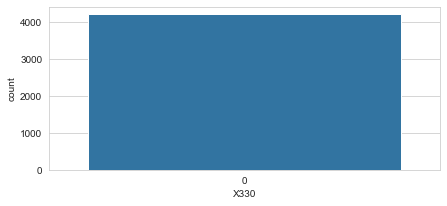

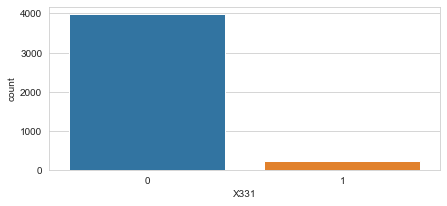

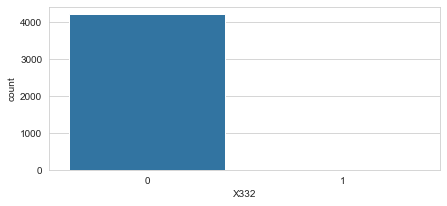

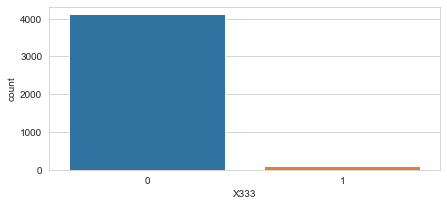

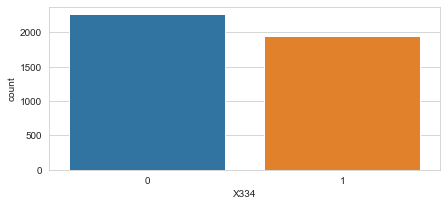

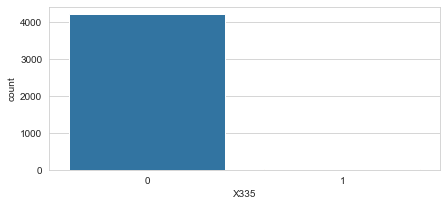

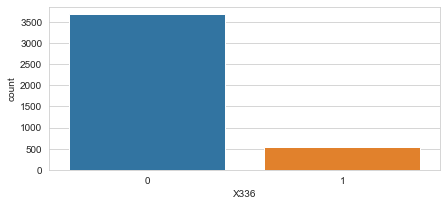

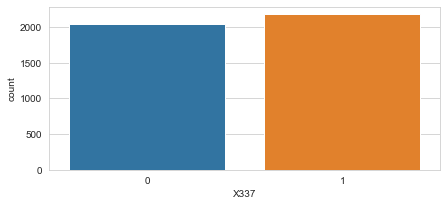

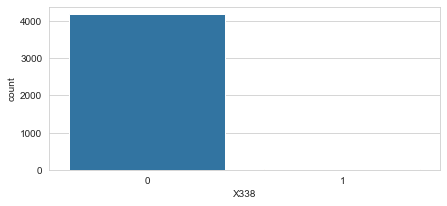

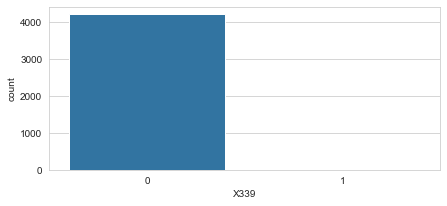

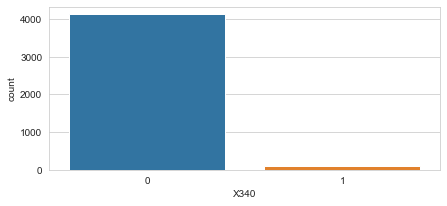

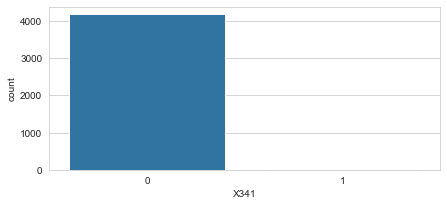

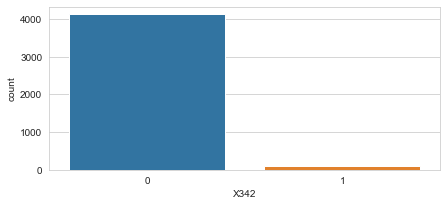

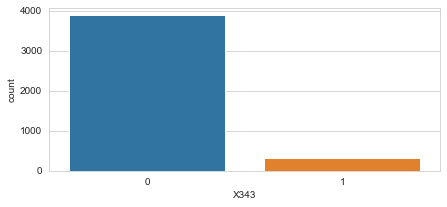

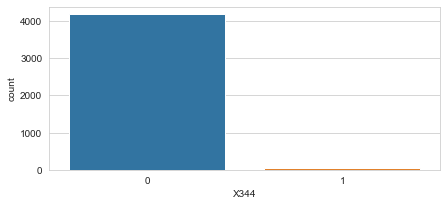

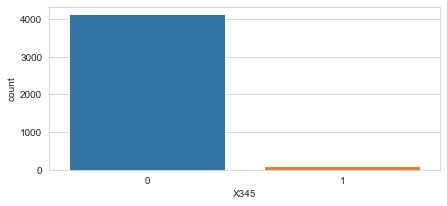

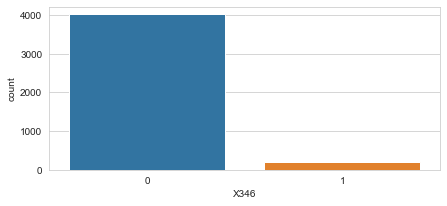

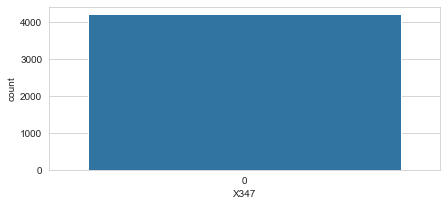

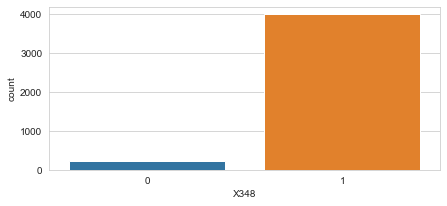

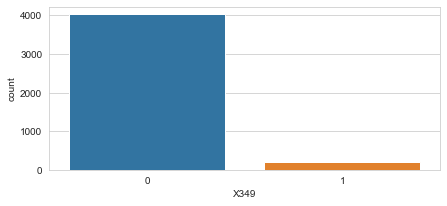

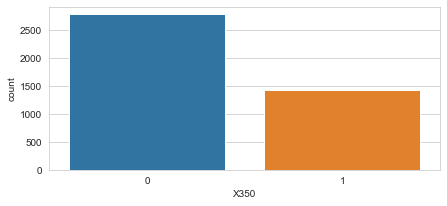

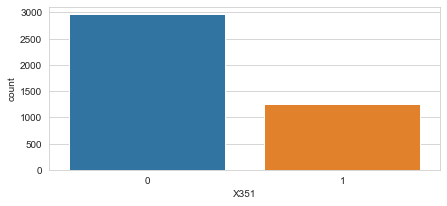

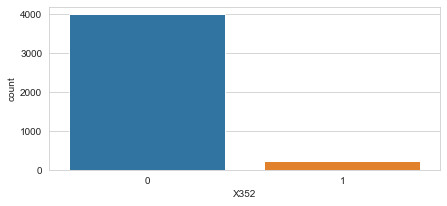

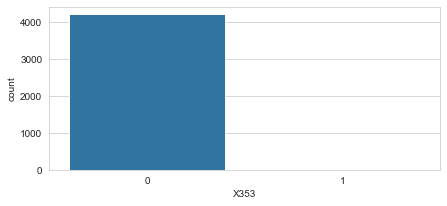

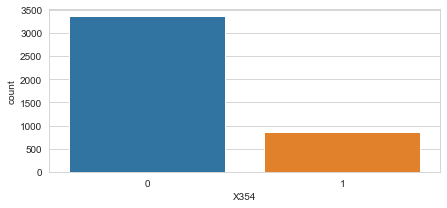

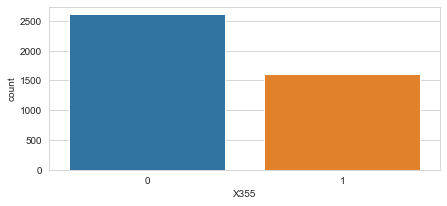

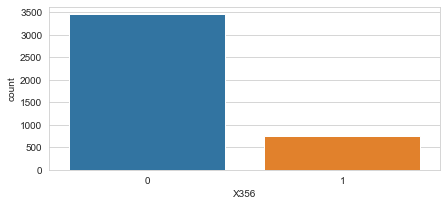

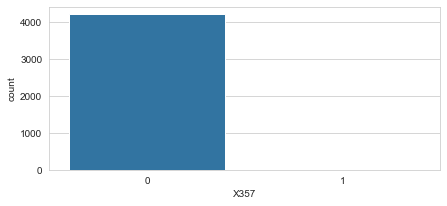

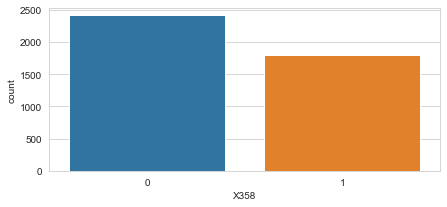

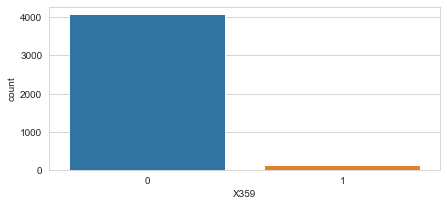

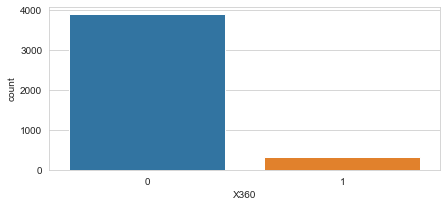

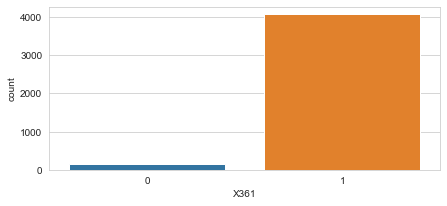

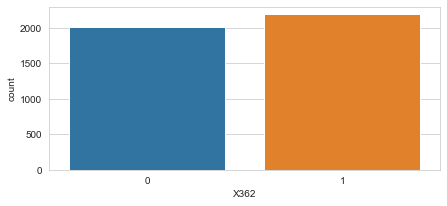

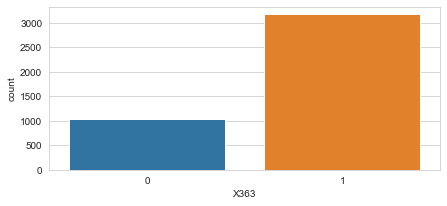

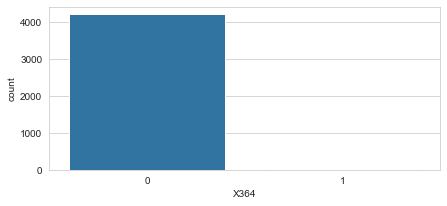

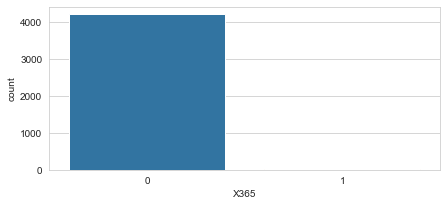

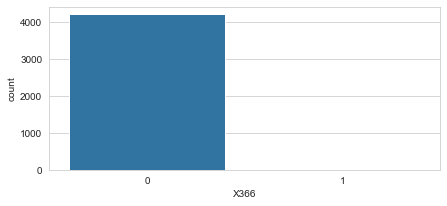

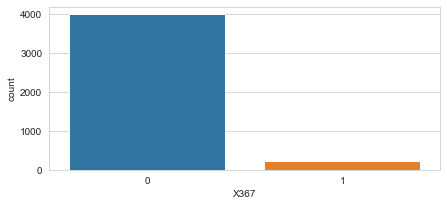

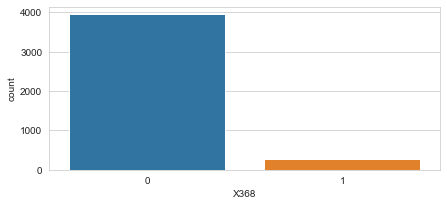

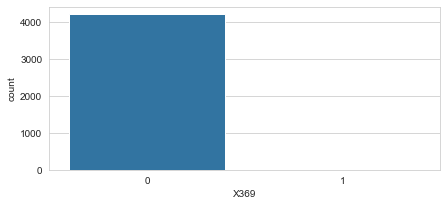

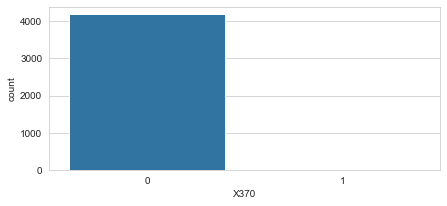

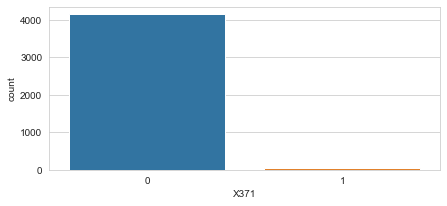

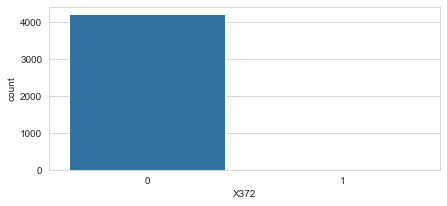

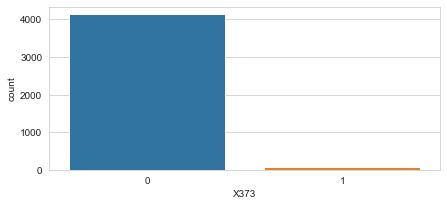

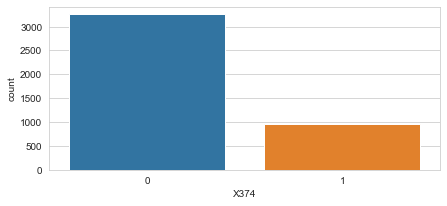

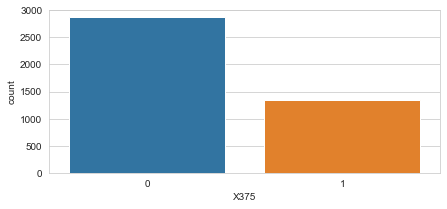

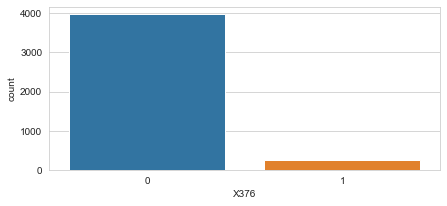

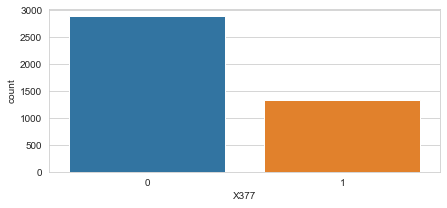

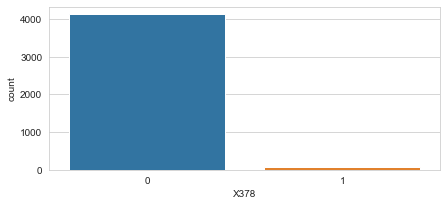

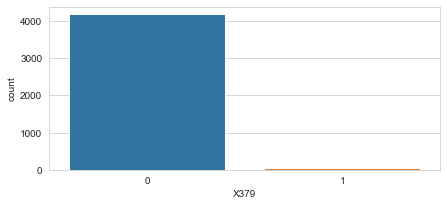

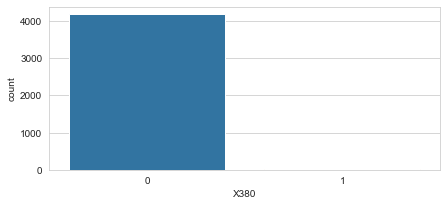

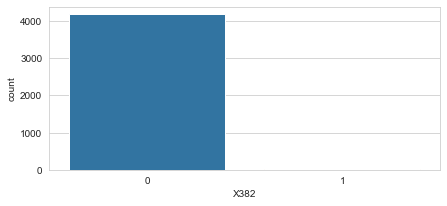

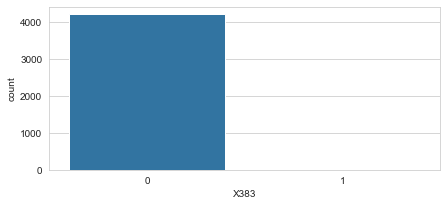

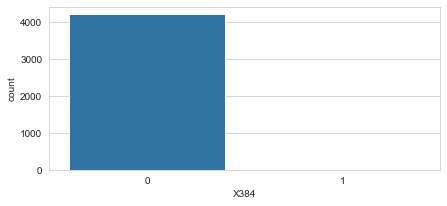

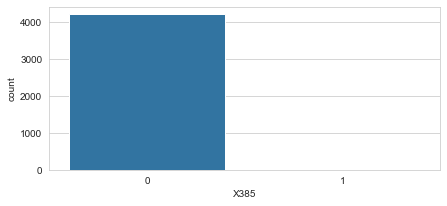

In [ ]:
for col in train[binary_feats].columns:
    plt.figure(figsize=(7,3))
    sns.countplot(x=col,data=train[binary_feats])

**binary features (test set):**

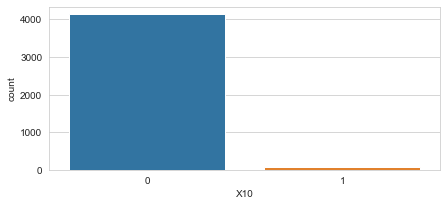

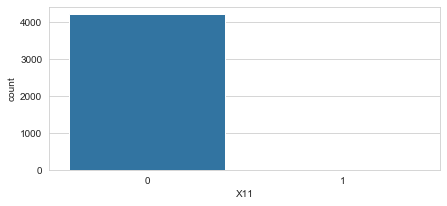

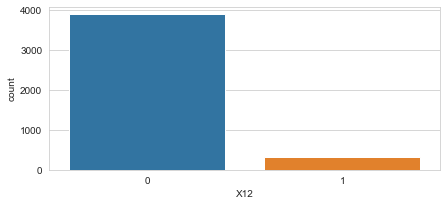

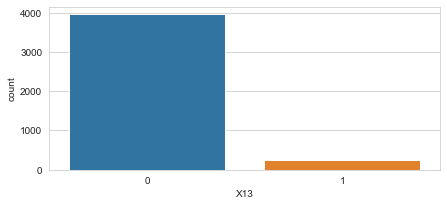

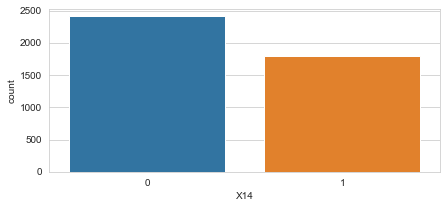

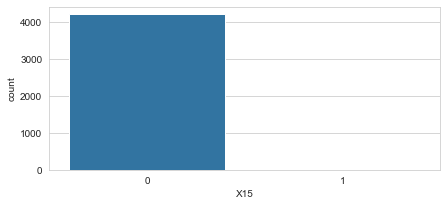

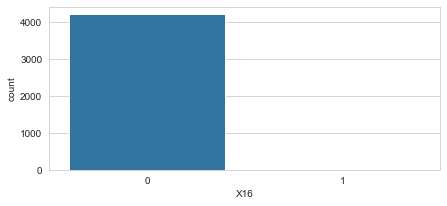

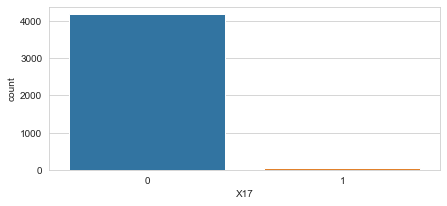

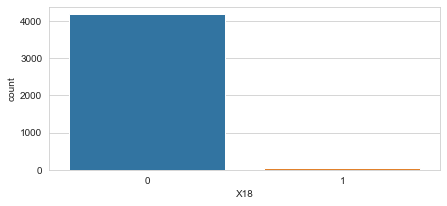

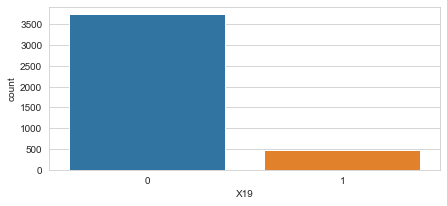

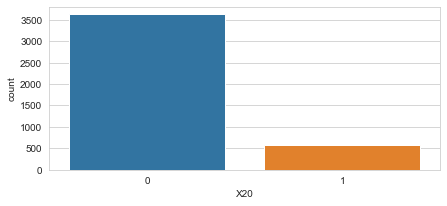

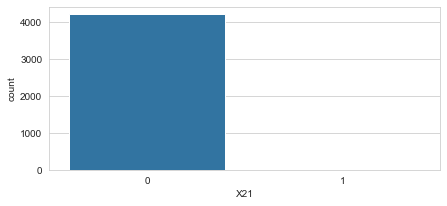

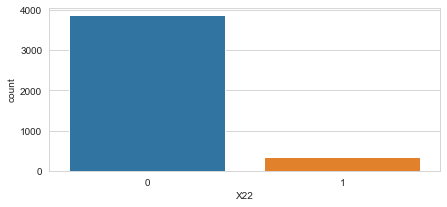

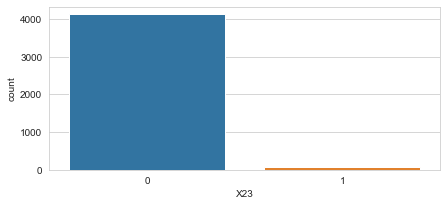

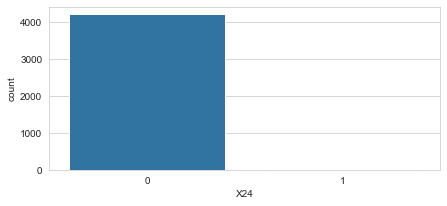

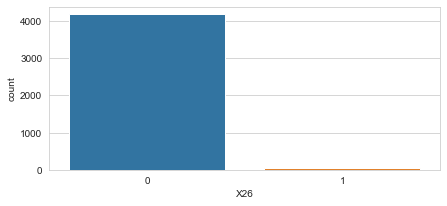

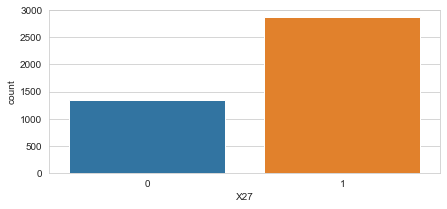

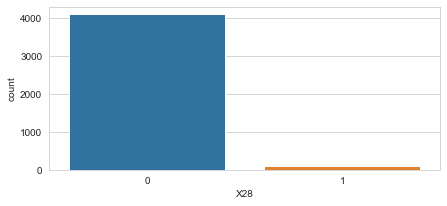

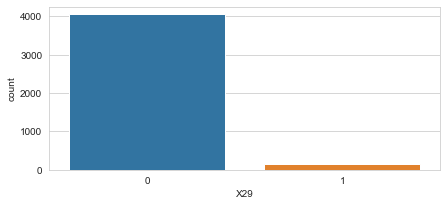

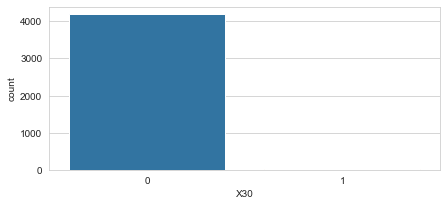

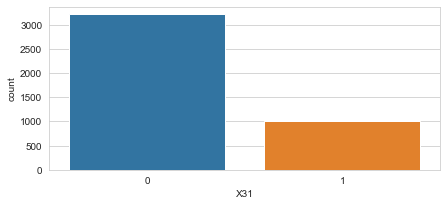

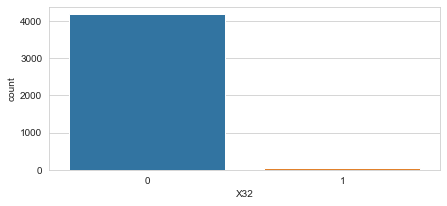

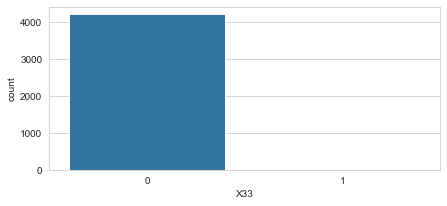

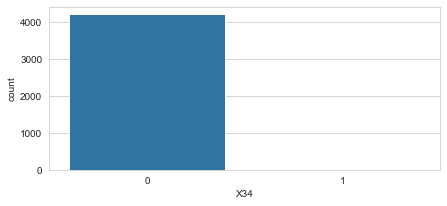

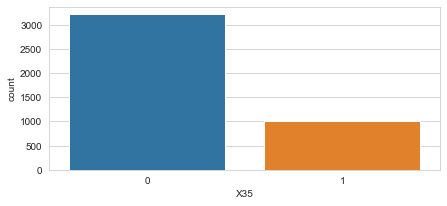

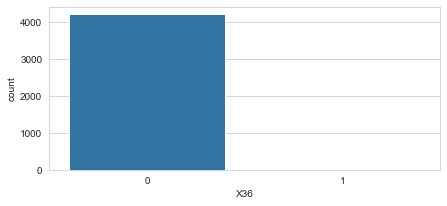

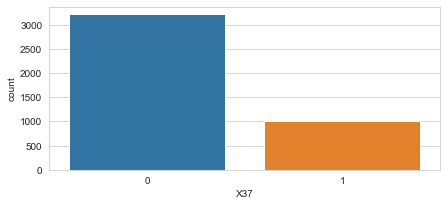

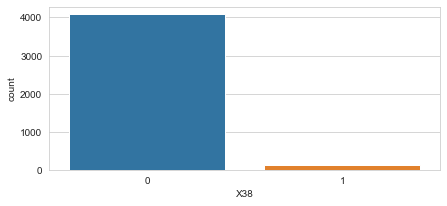

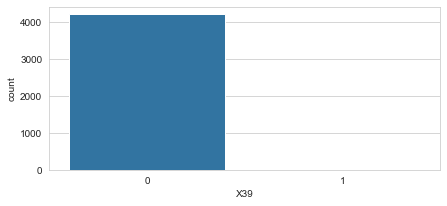

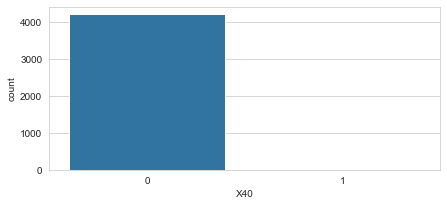

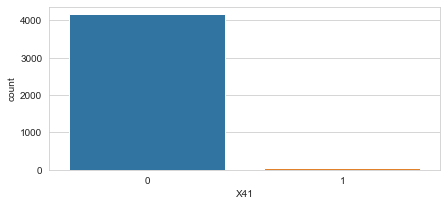

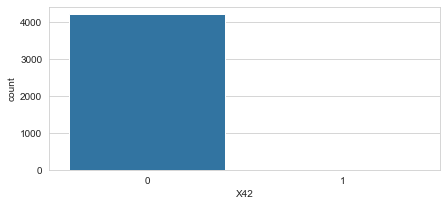

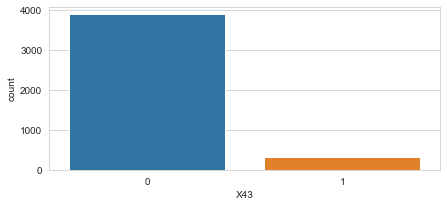

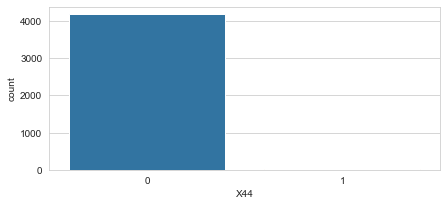

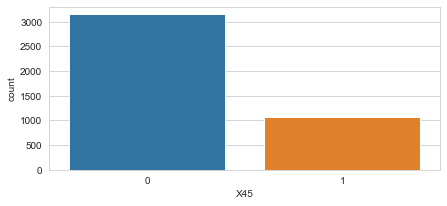

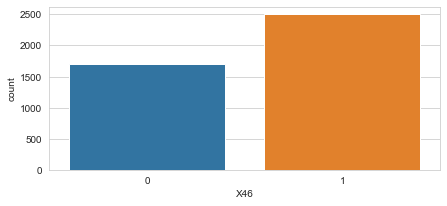

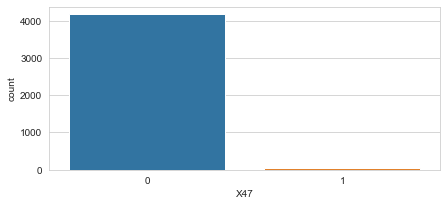

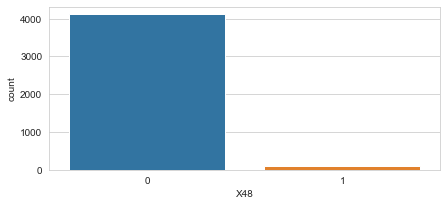

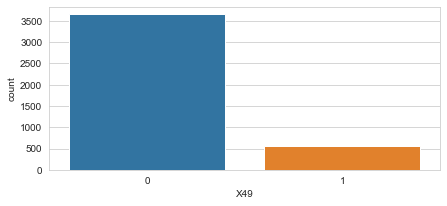

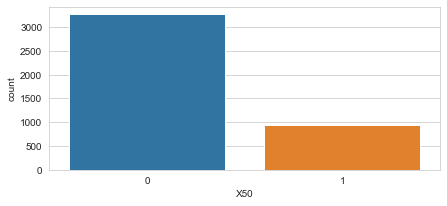

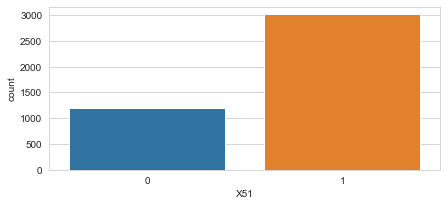

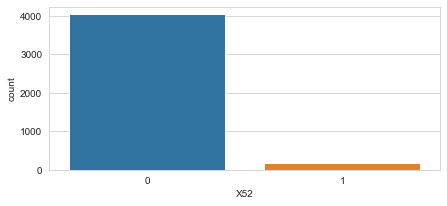

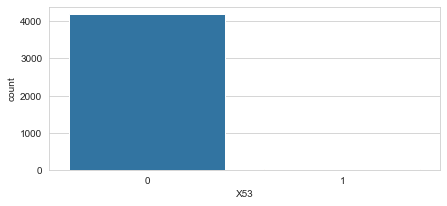

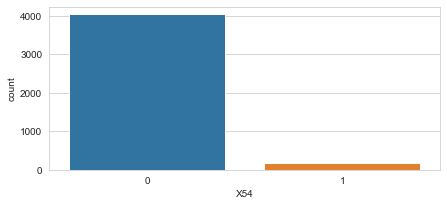

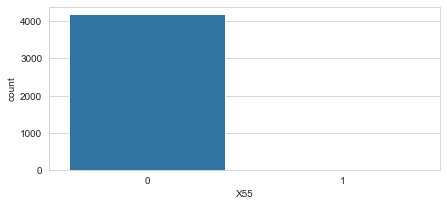

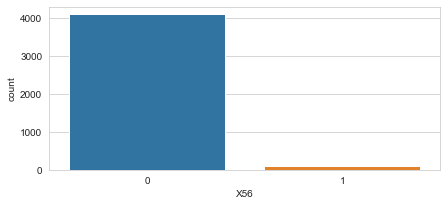

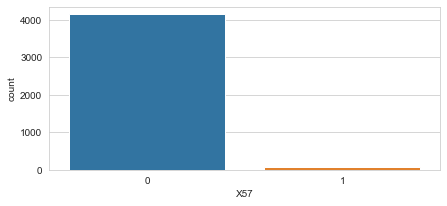

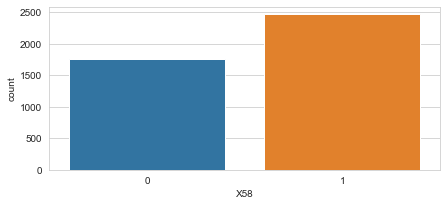

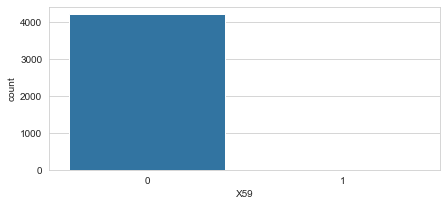

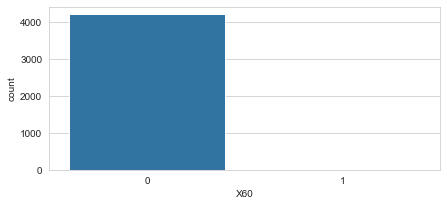

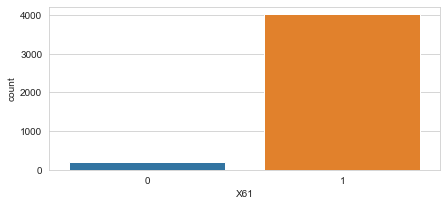

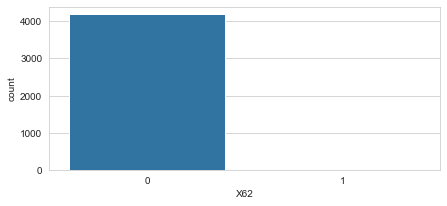

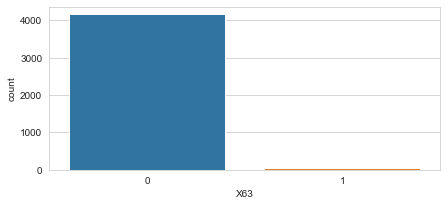

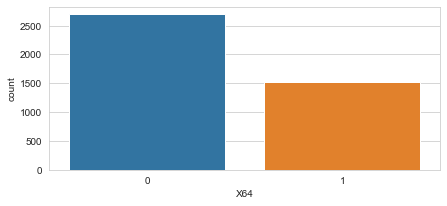

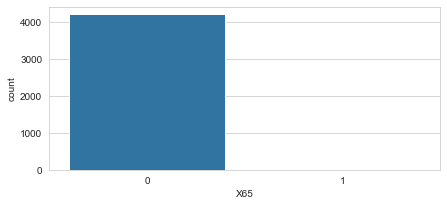

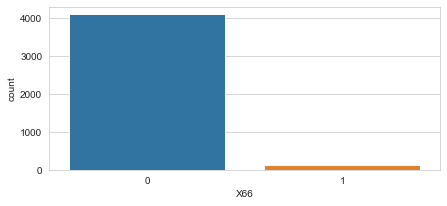

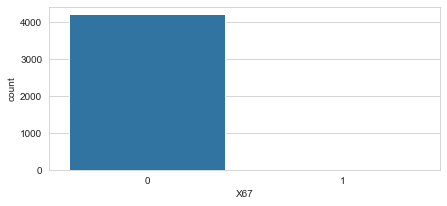

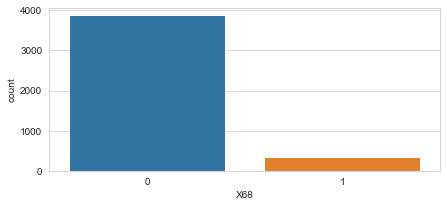

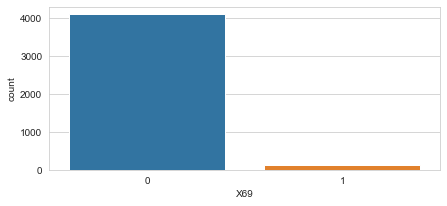

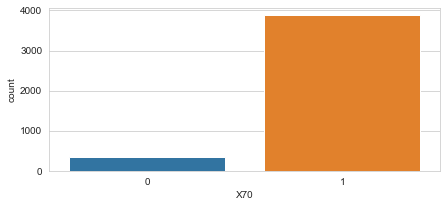

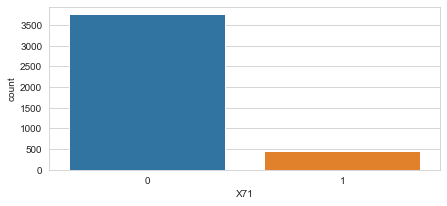

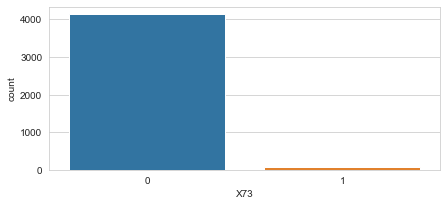

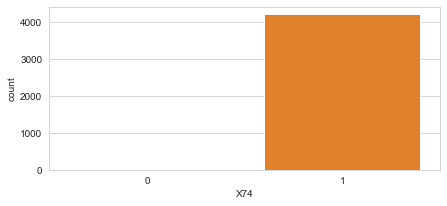

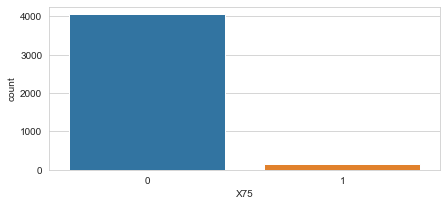

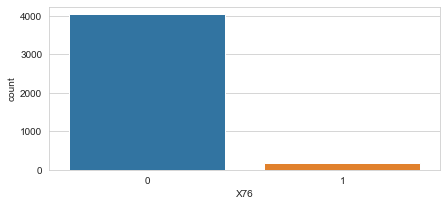

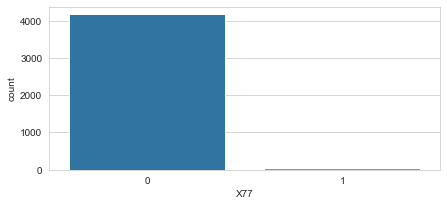

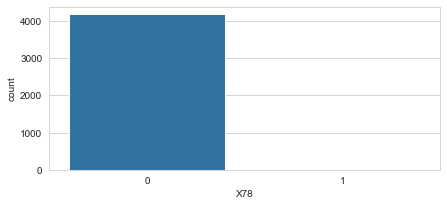

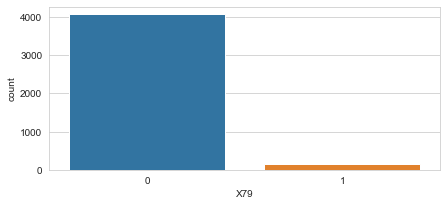

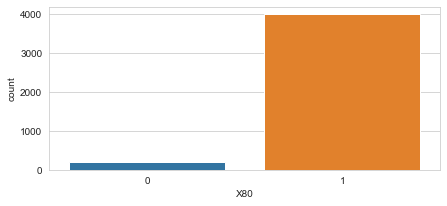

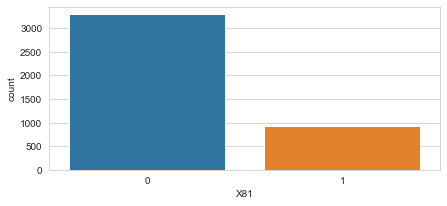

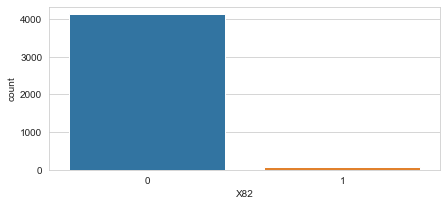

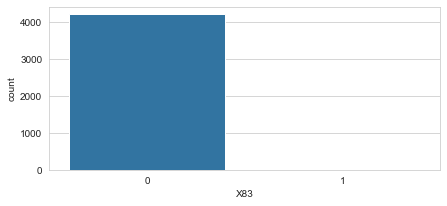

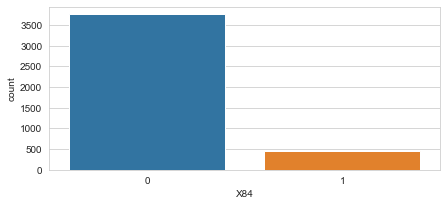

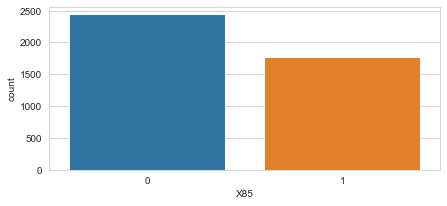

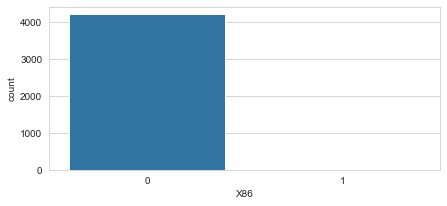

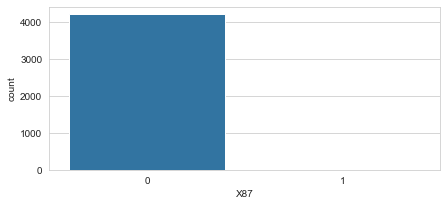

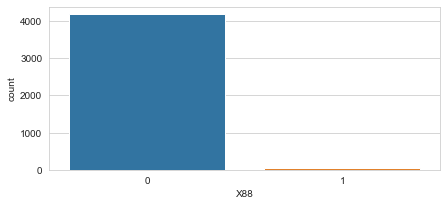

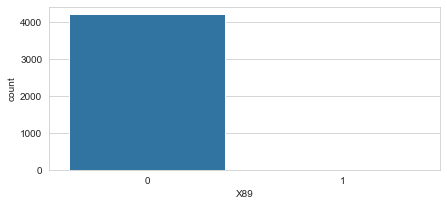

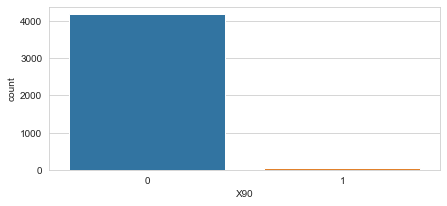

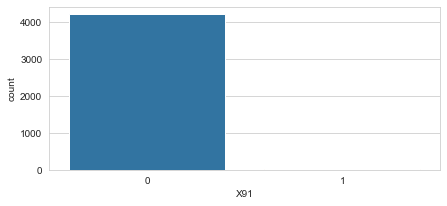

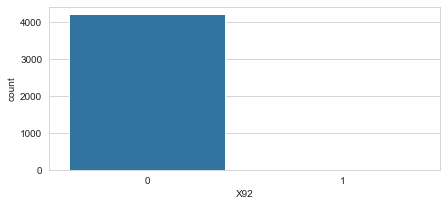

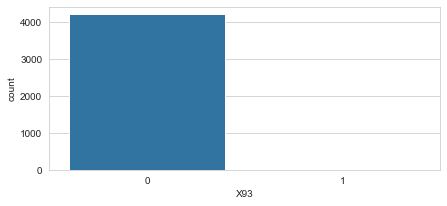

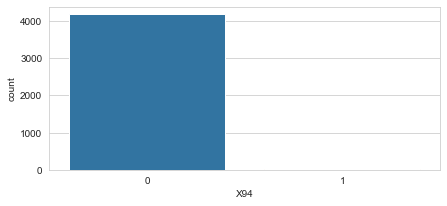

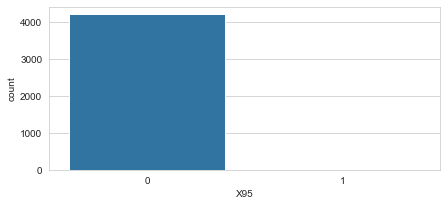

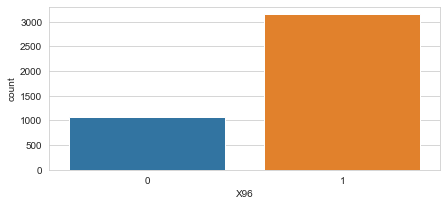

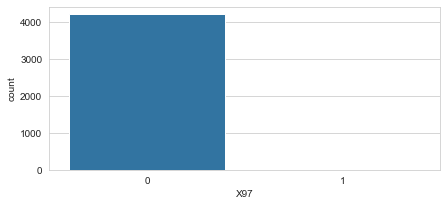

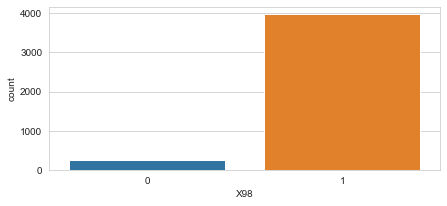

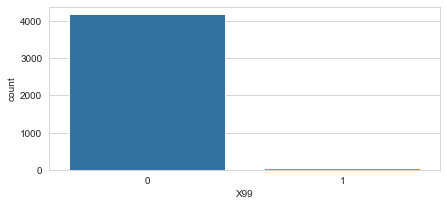

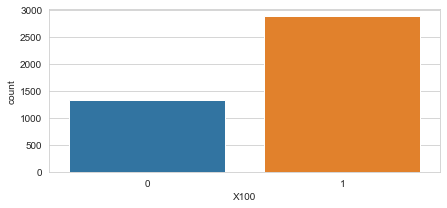

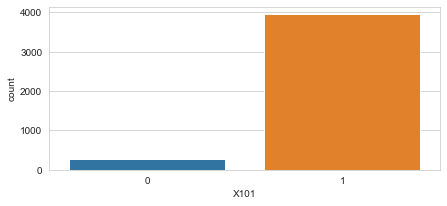

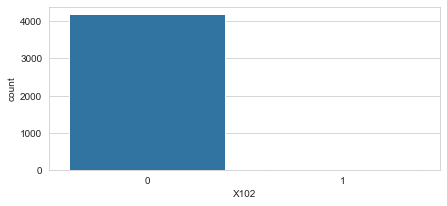

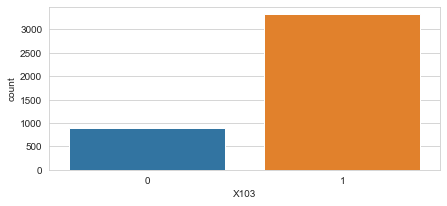

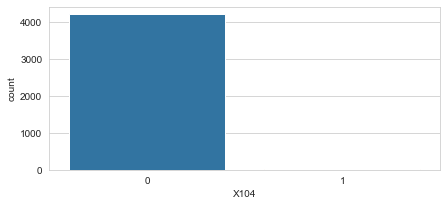

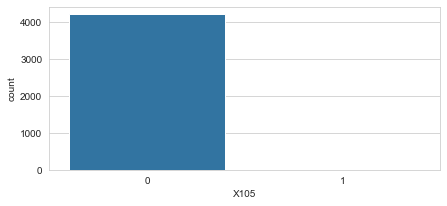

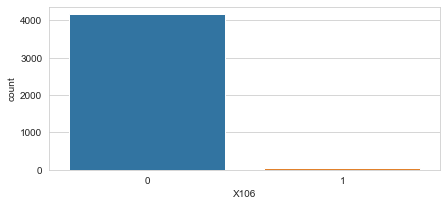

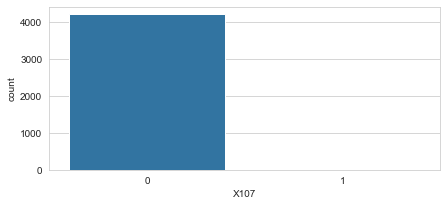

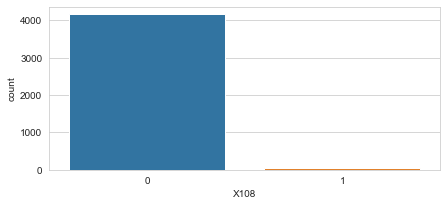

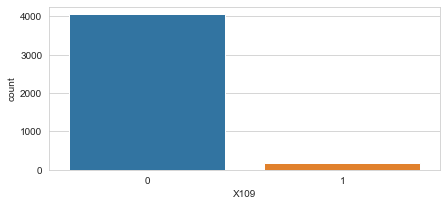

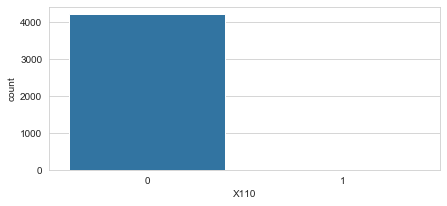

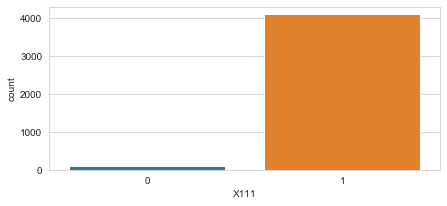

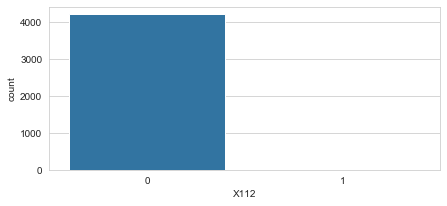

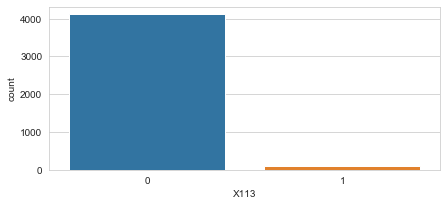

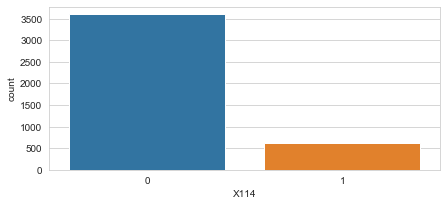

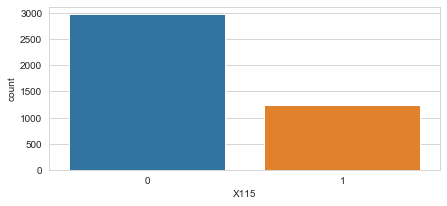

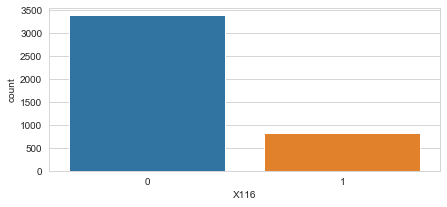

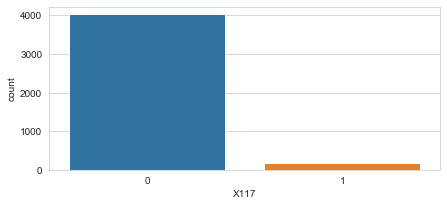

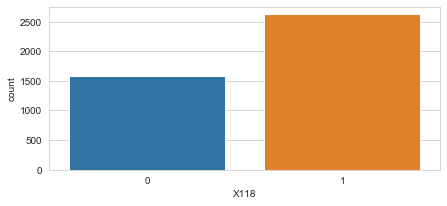

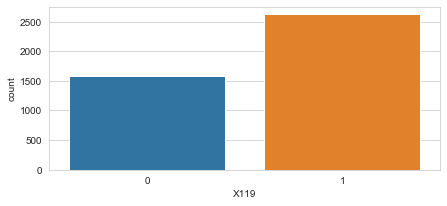

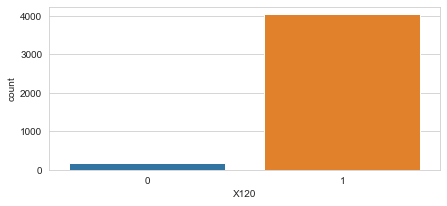

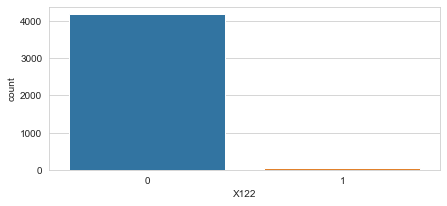

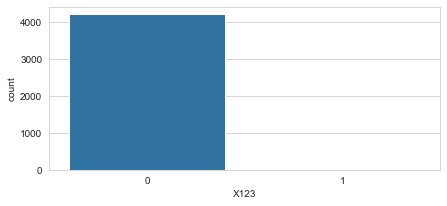

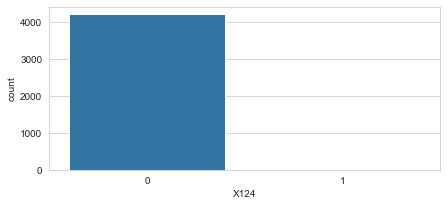

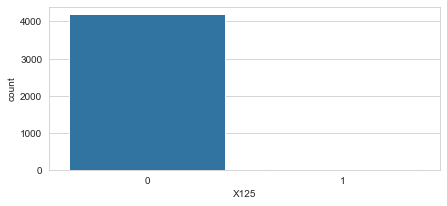

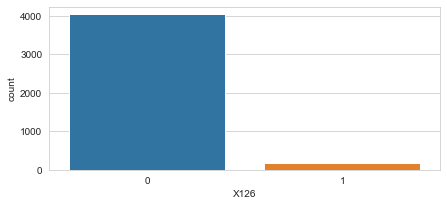

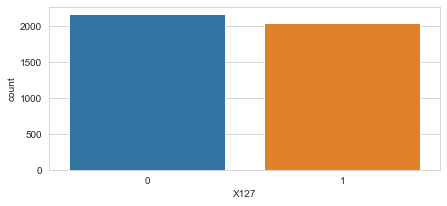

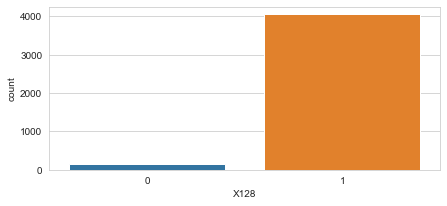

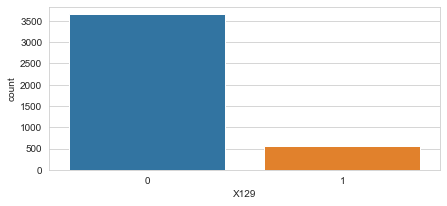

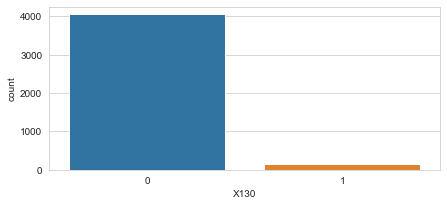

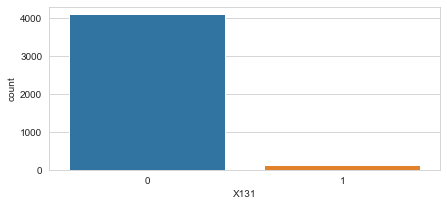

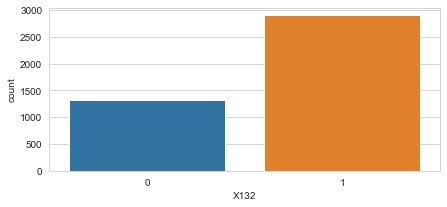

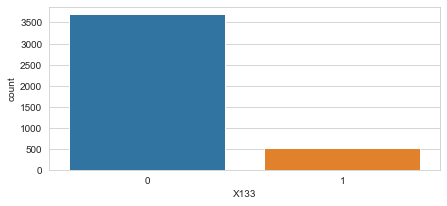

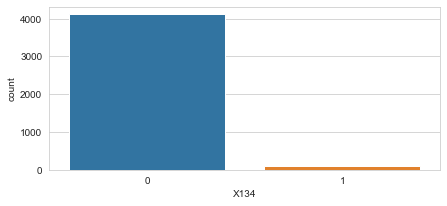

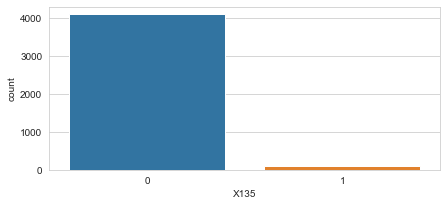

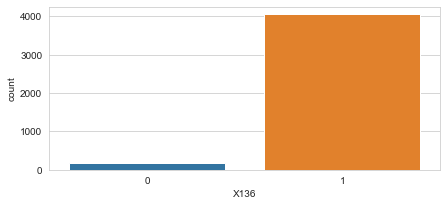

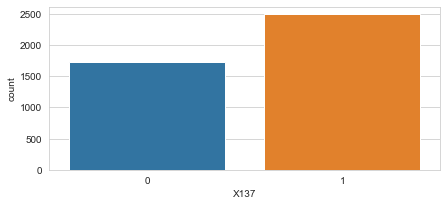

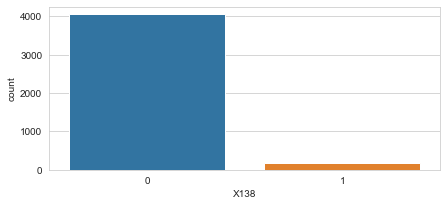

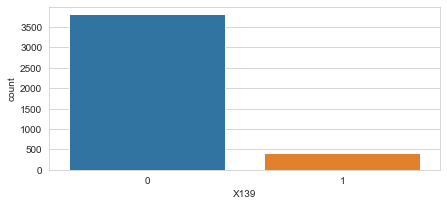

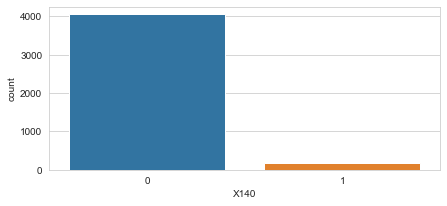

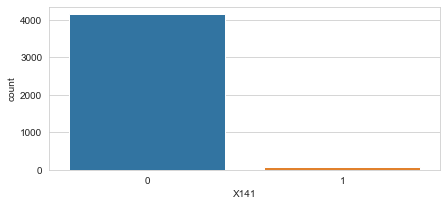

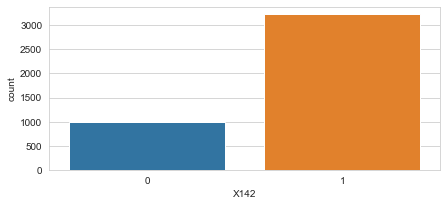

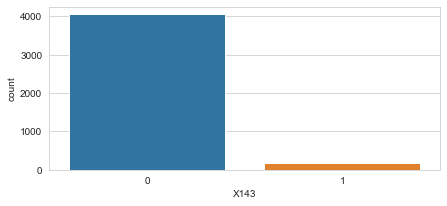

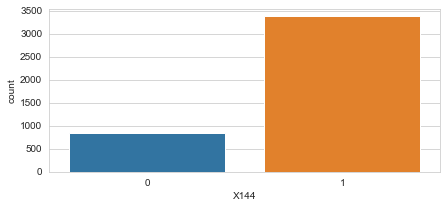

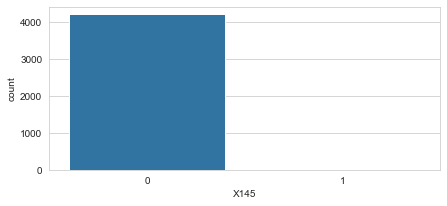

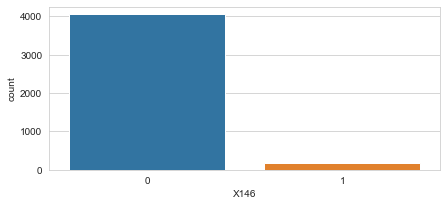

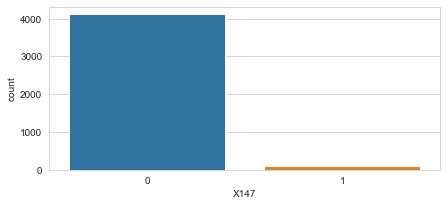

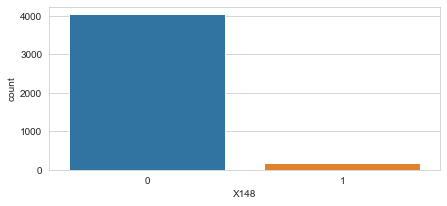

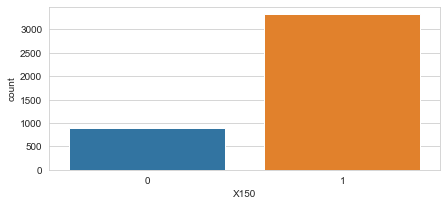

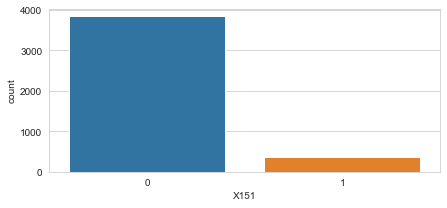

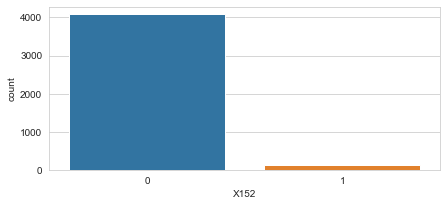

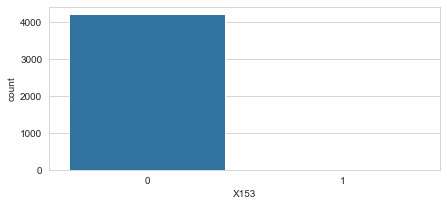

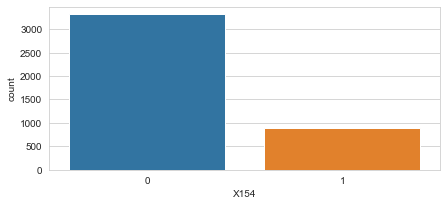

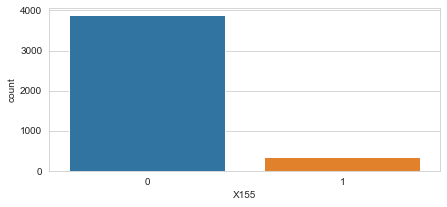

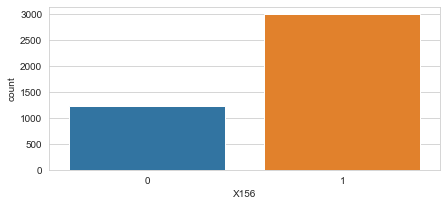

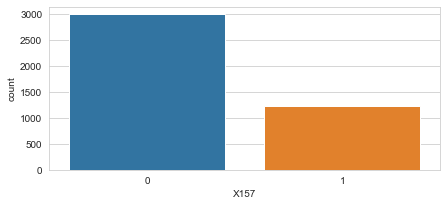

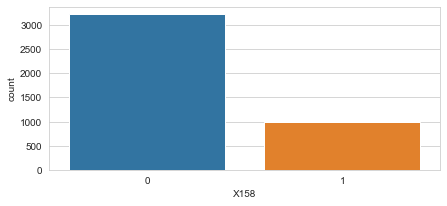

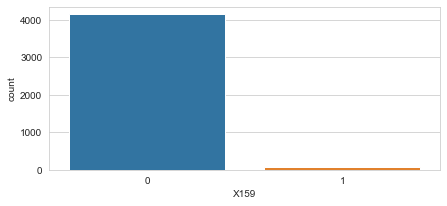

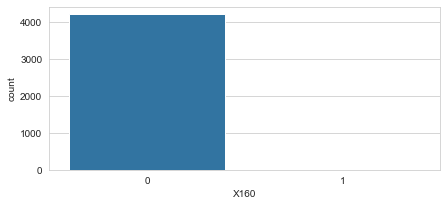

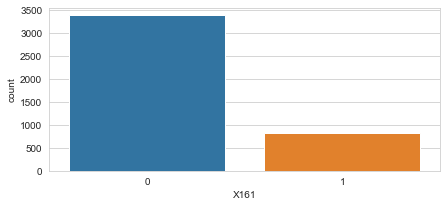

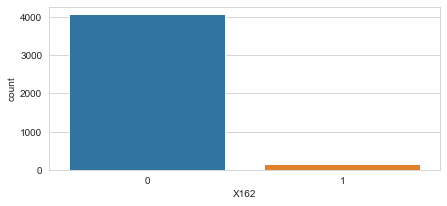

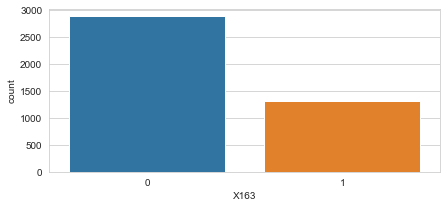

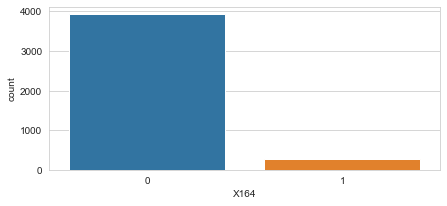

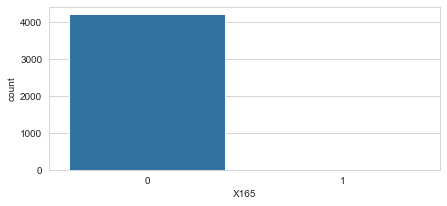

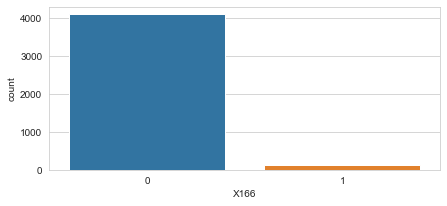

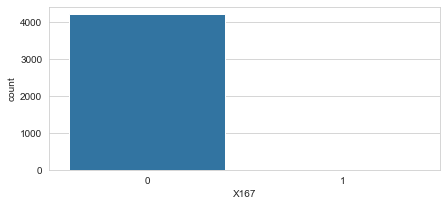

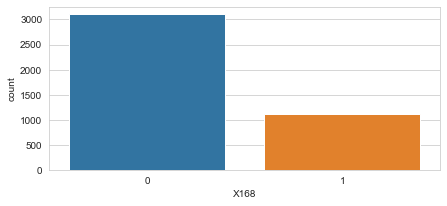

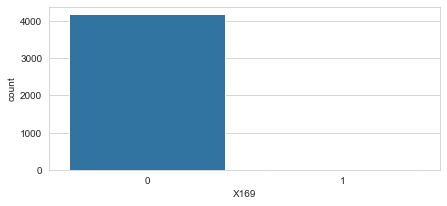

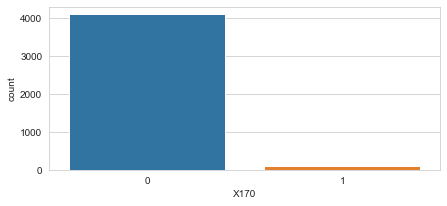

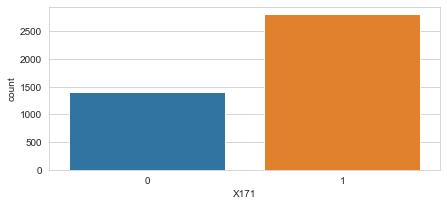

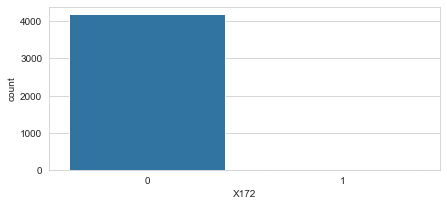

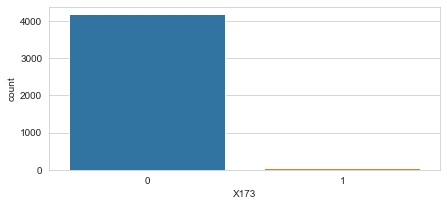

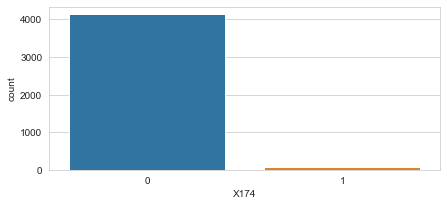

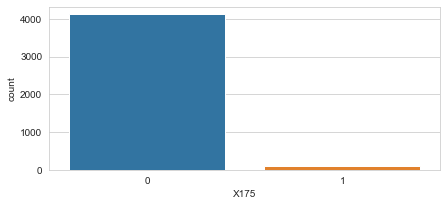

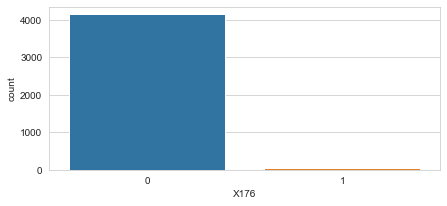

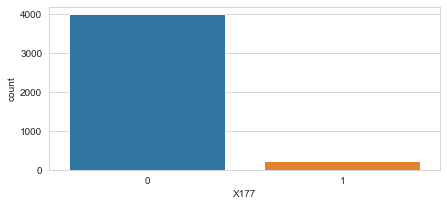

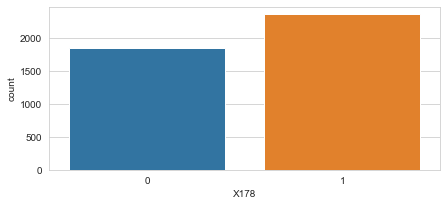

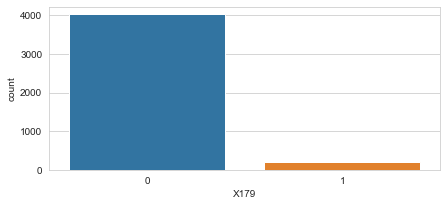

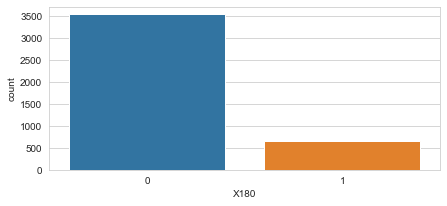

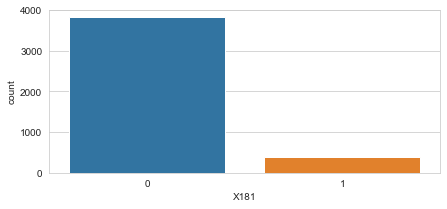

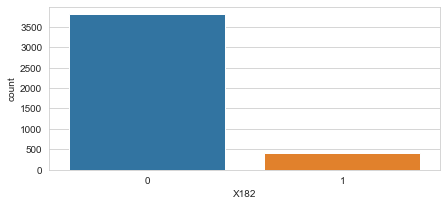

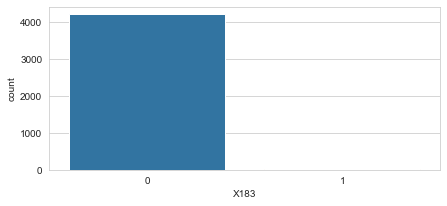

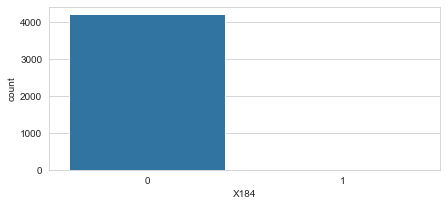

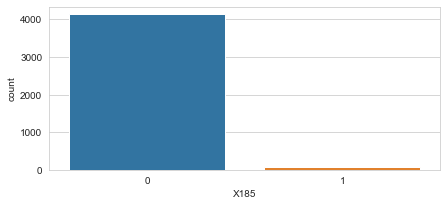

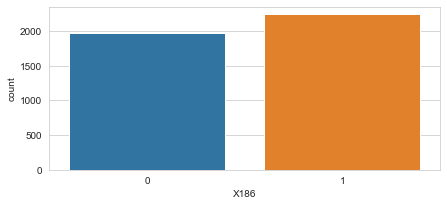

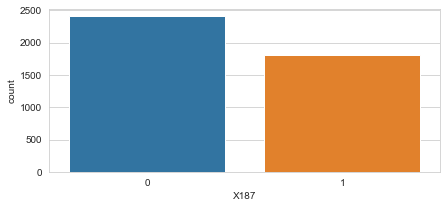

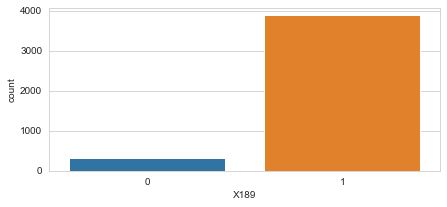

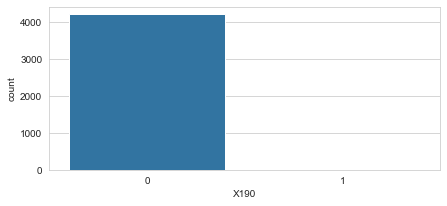

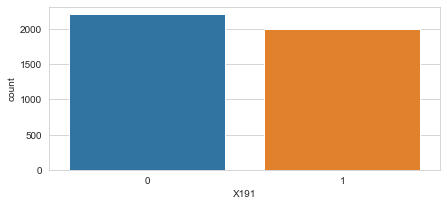

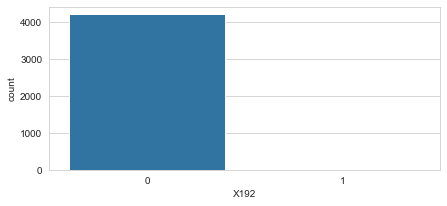

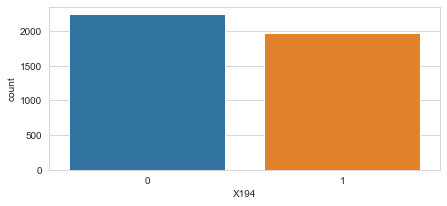

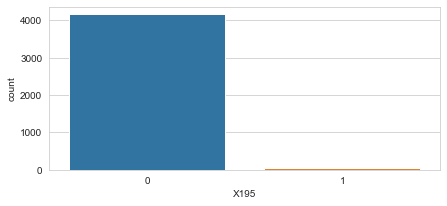

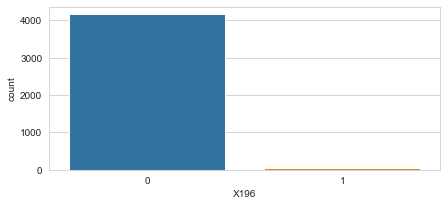

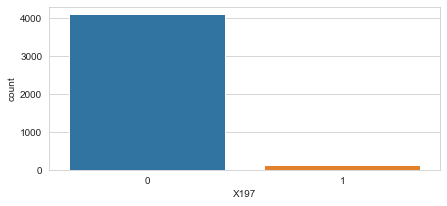

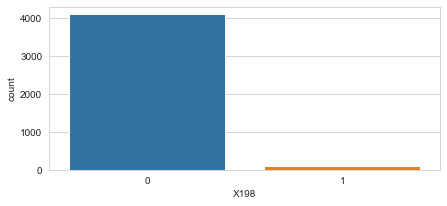

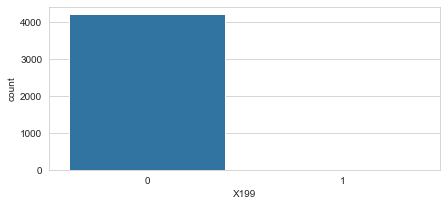

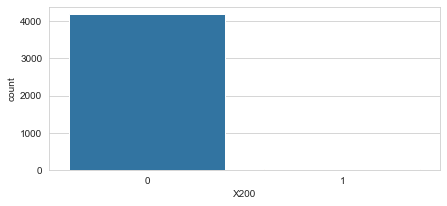

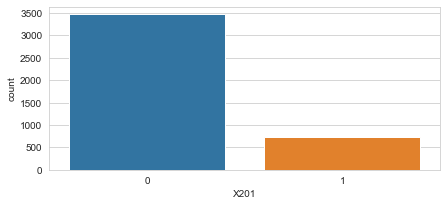

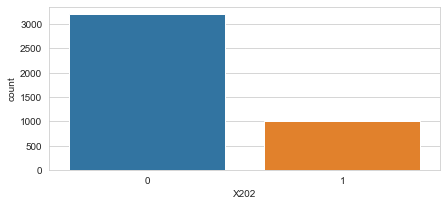

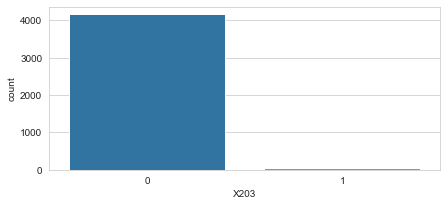

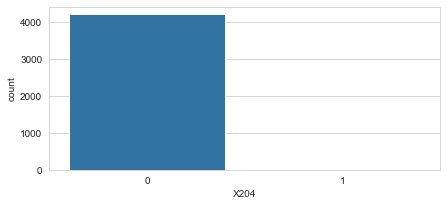

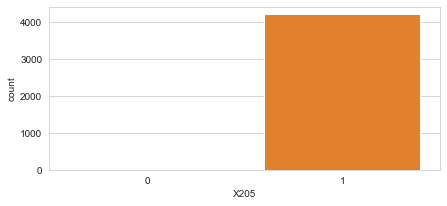

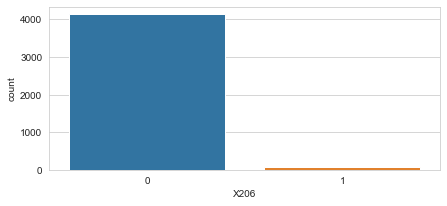

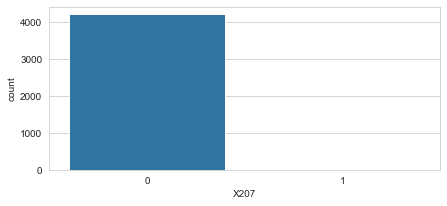

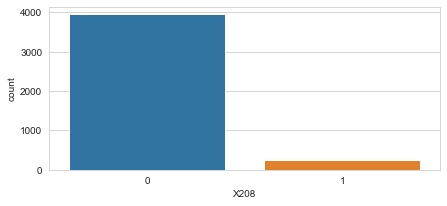

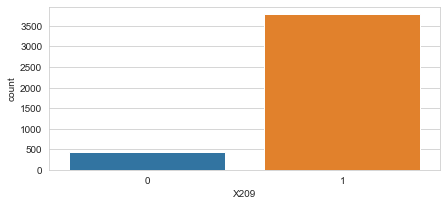

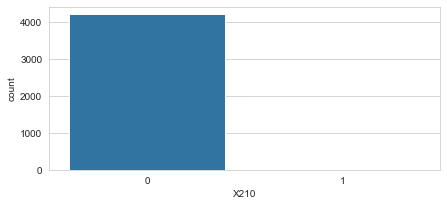

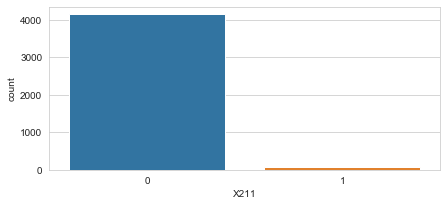

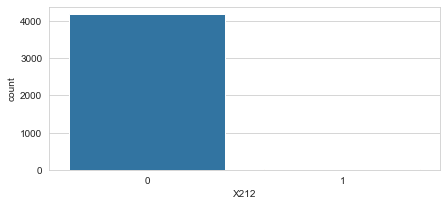

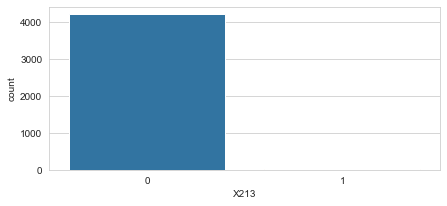

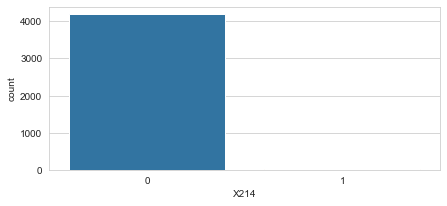

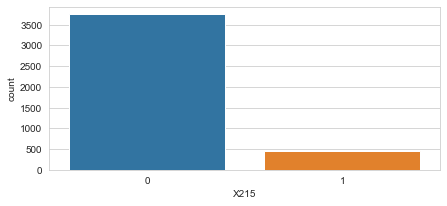

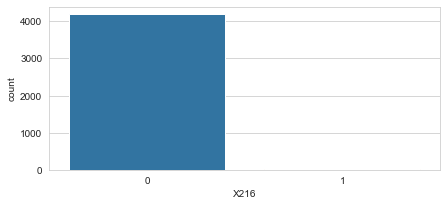

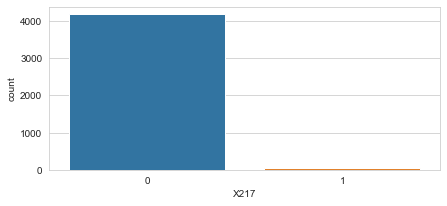

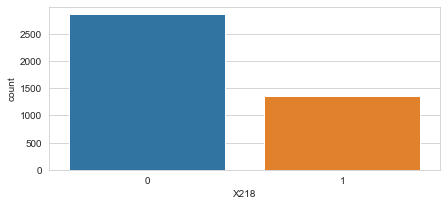

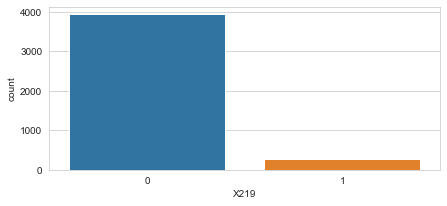

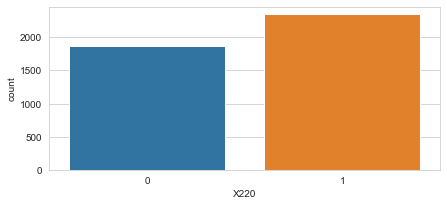

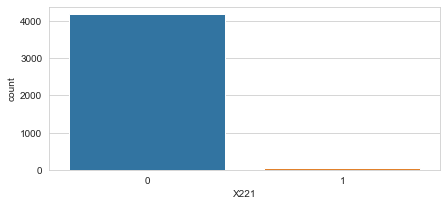

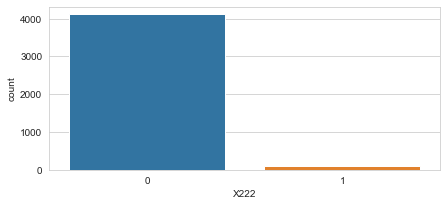

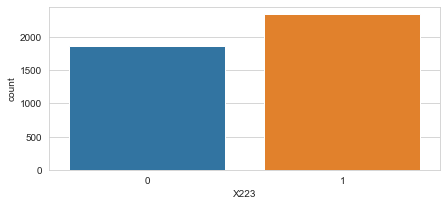

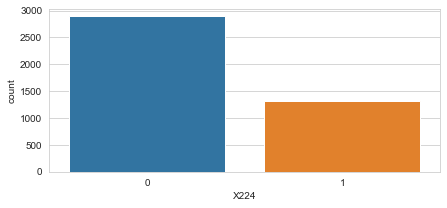

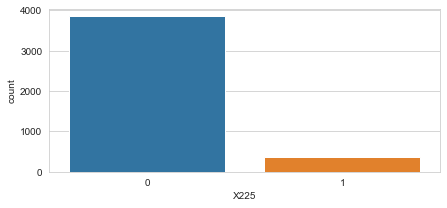

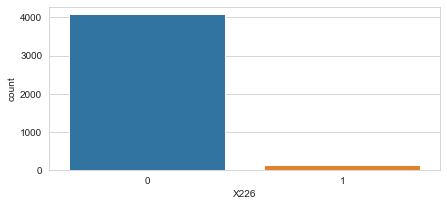

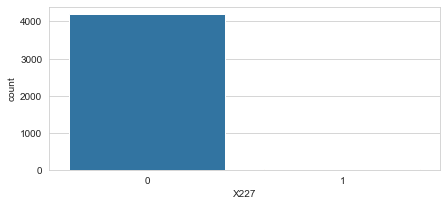

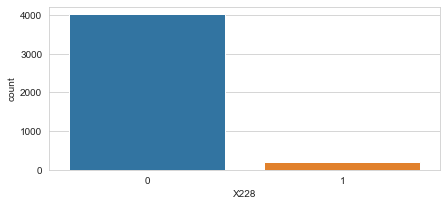

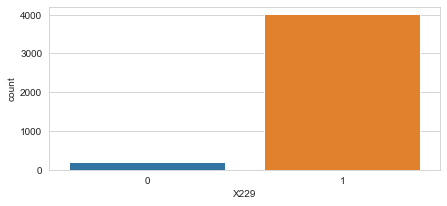

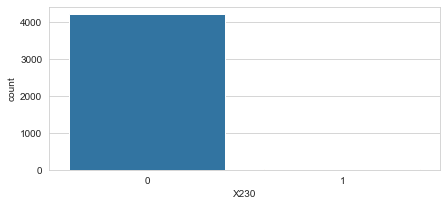

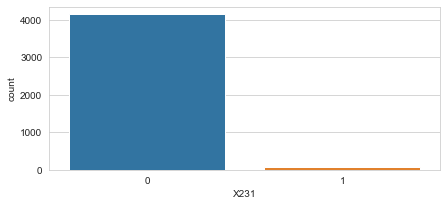

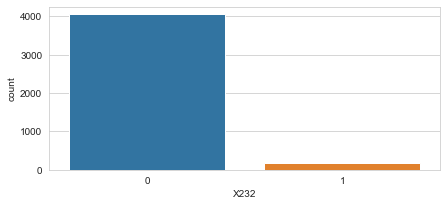

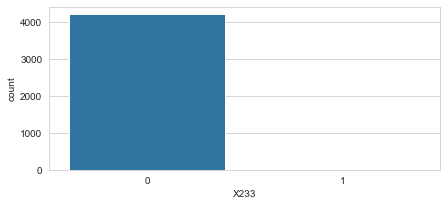

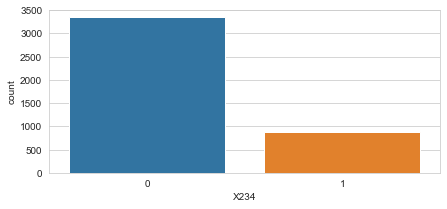

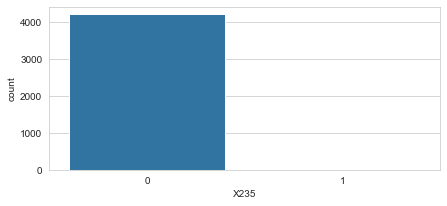

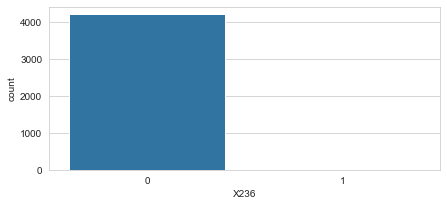

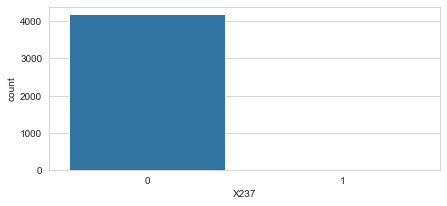

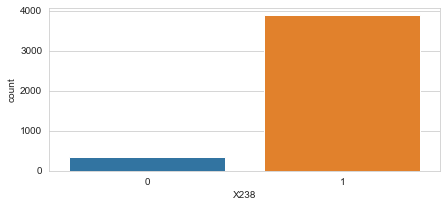

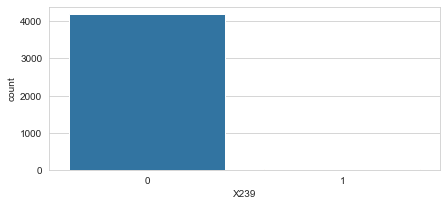

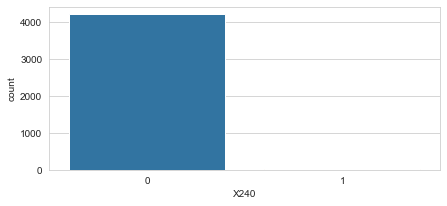

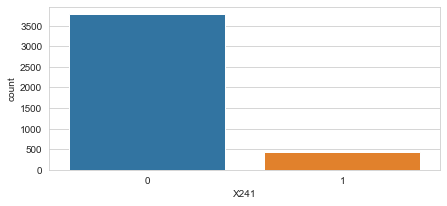

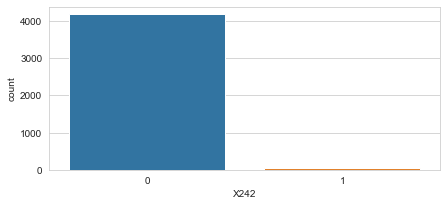

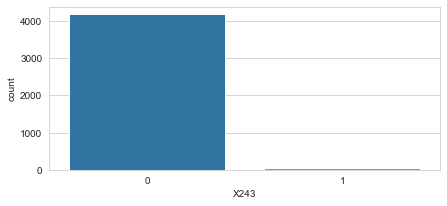

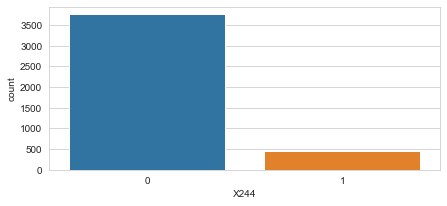

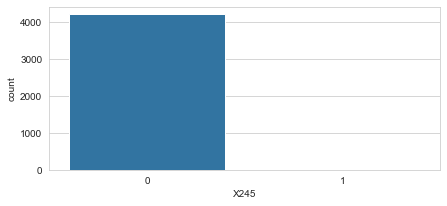

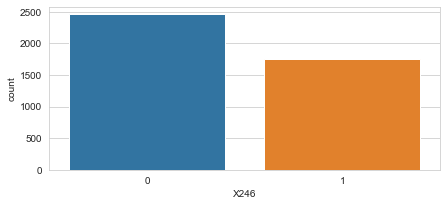

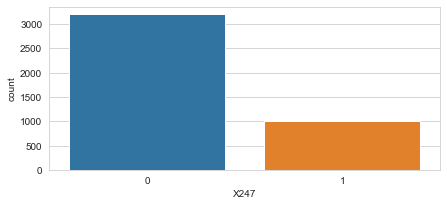

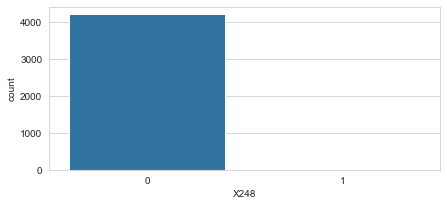

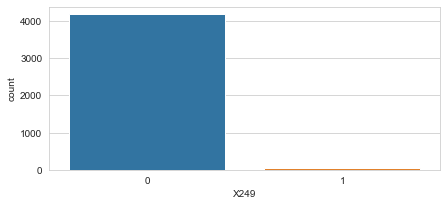

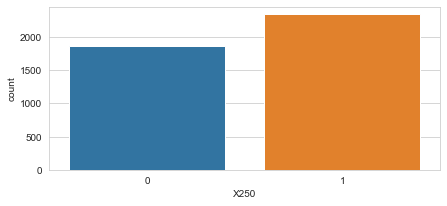

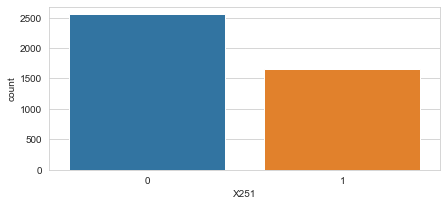

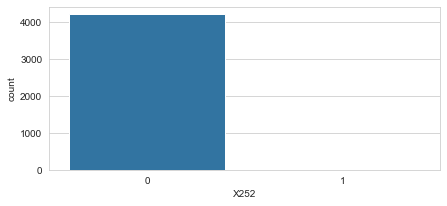

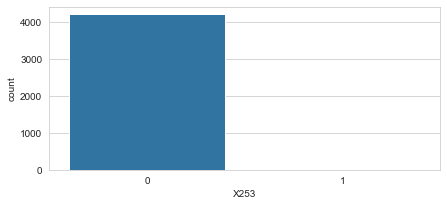

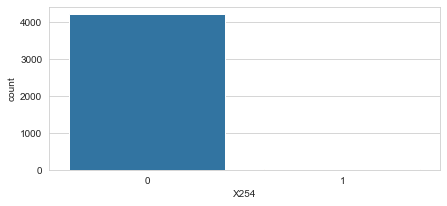

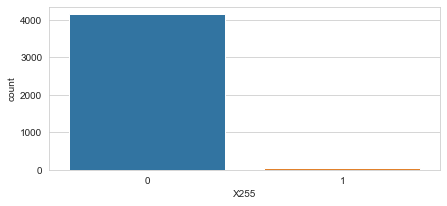

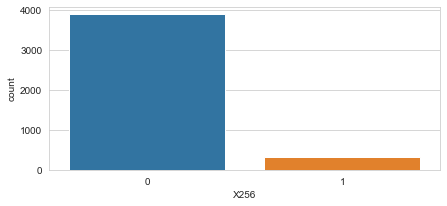

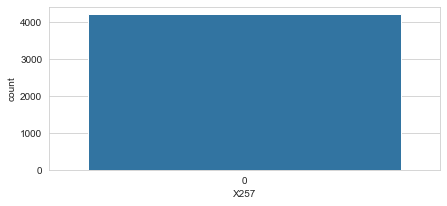

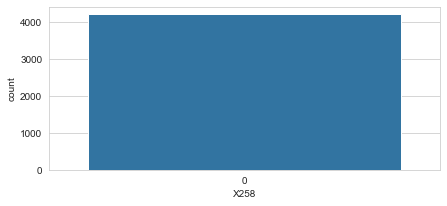

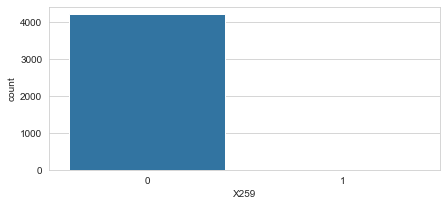

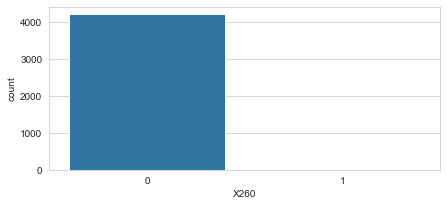

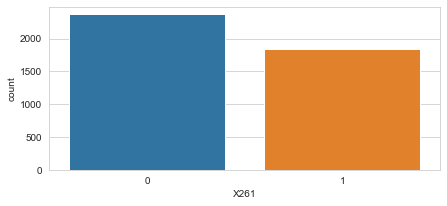

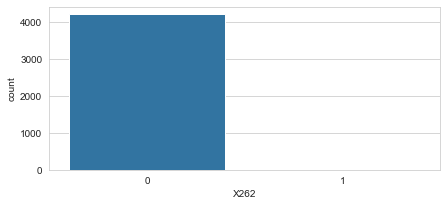

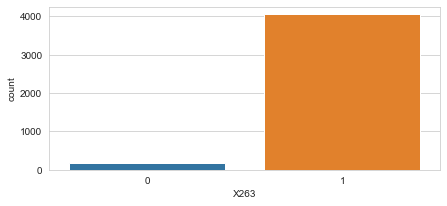

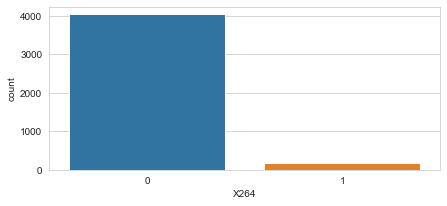

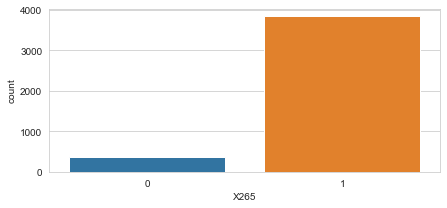

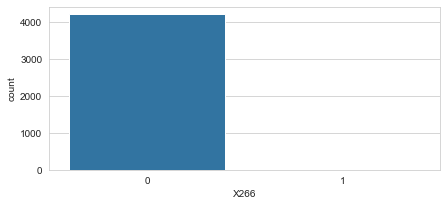

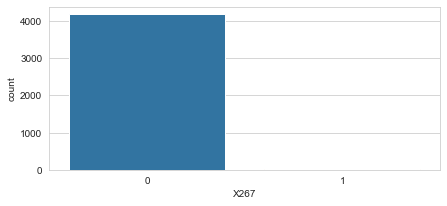

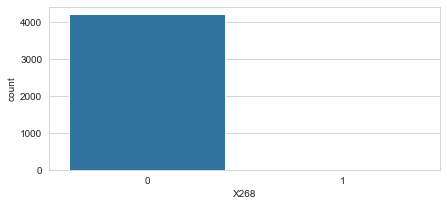

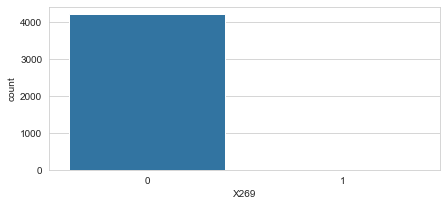

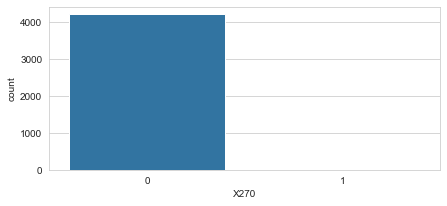

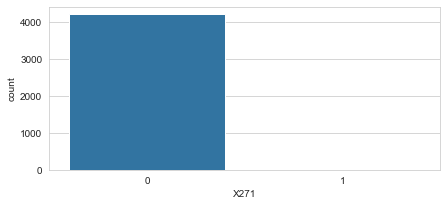

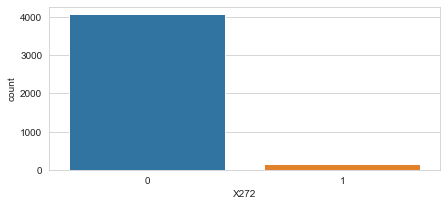

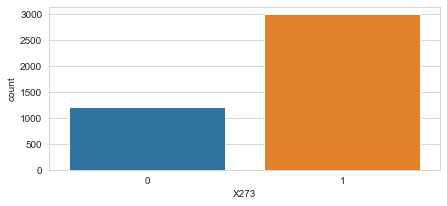

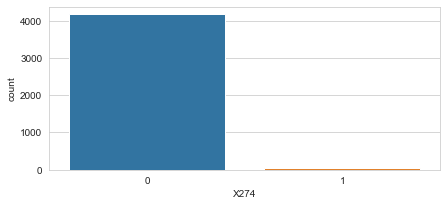

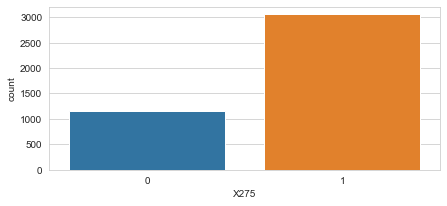

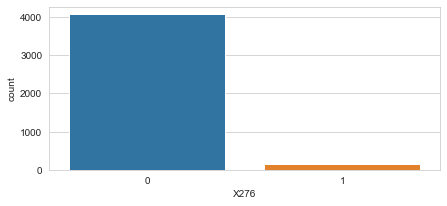

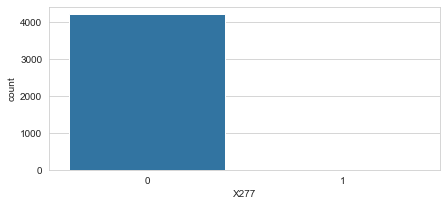

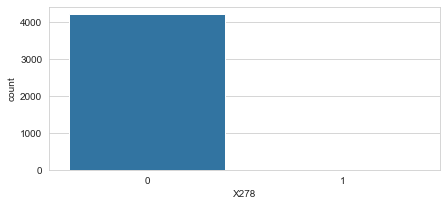

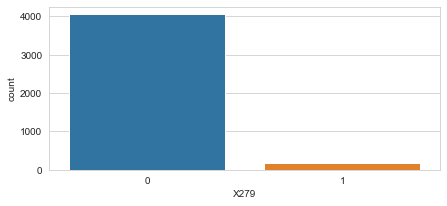

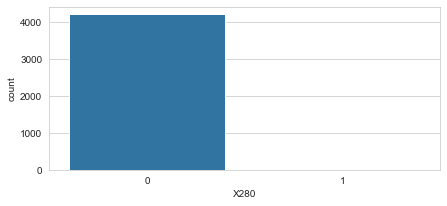

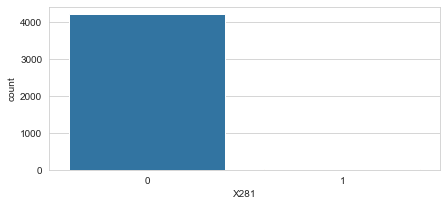

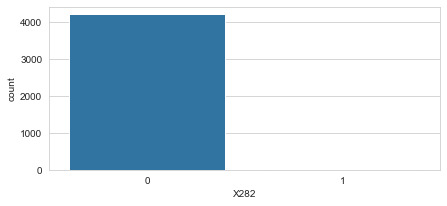

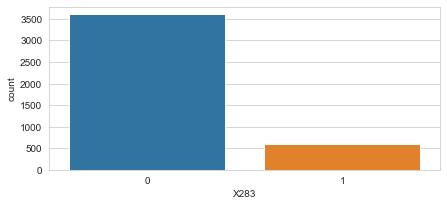

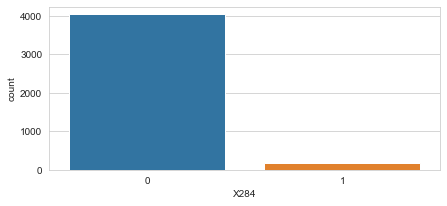

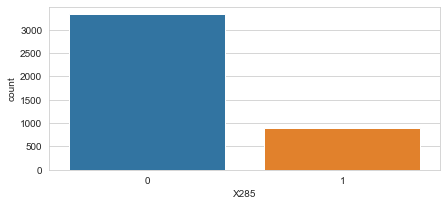

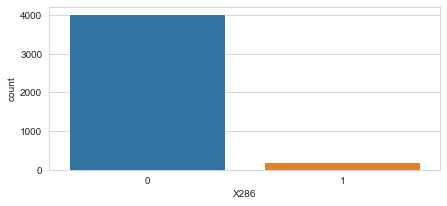

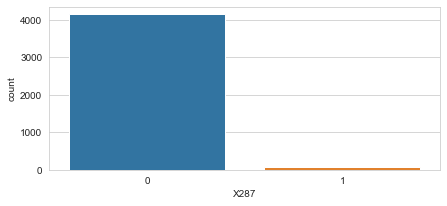

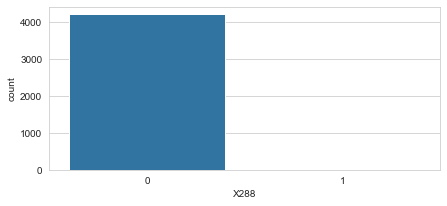

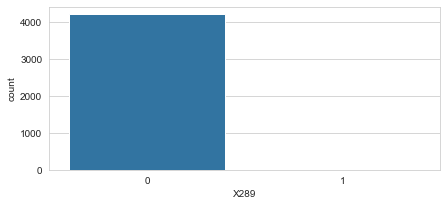

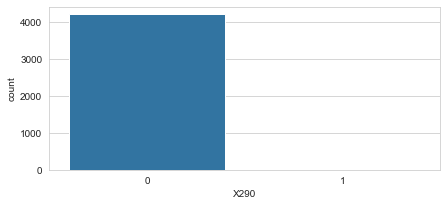

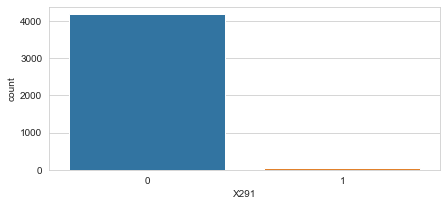

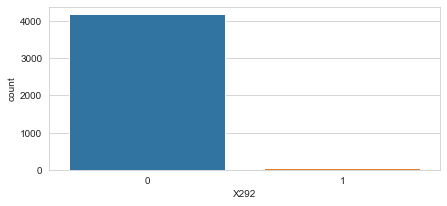

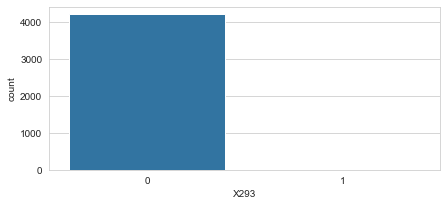

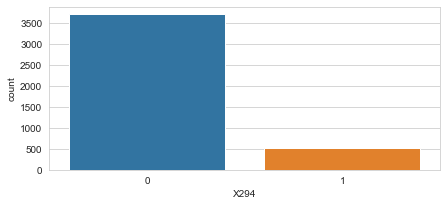

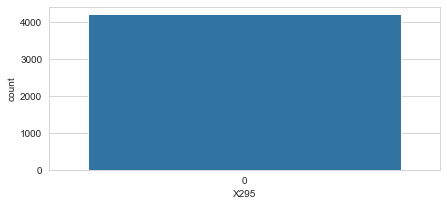

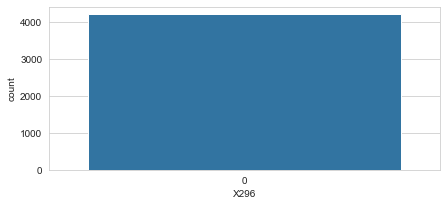

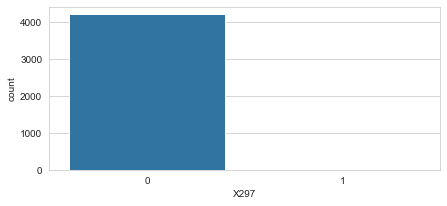

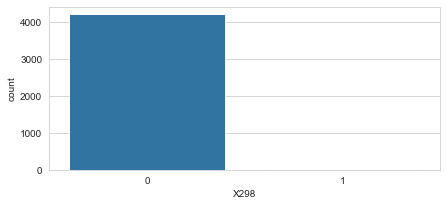

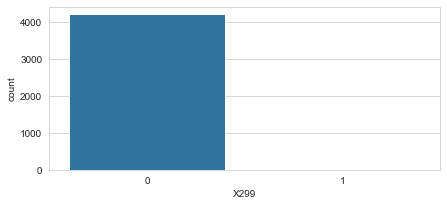

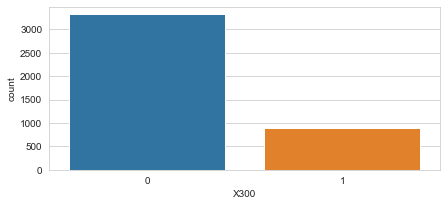

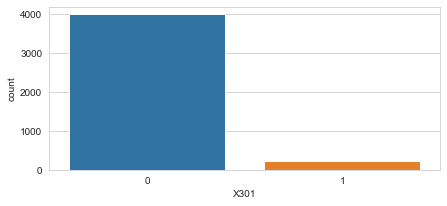

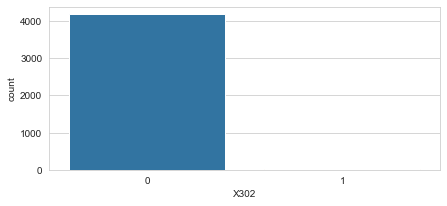

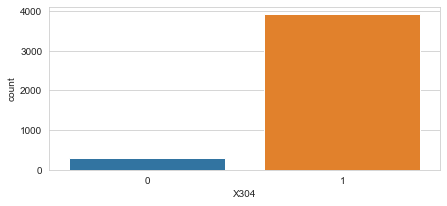

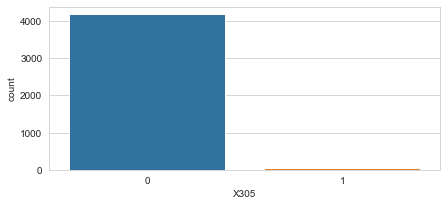

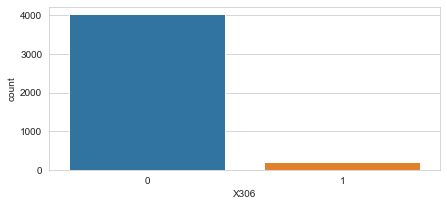

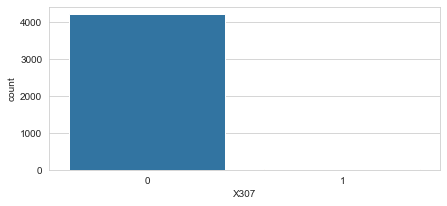

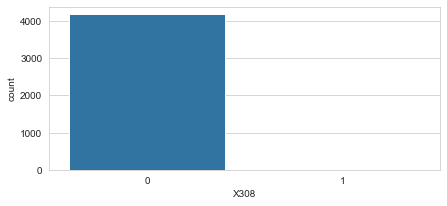

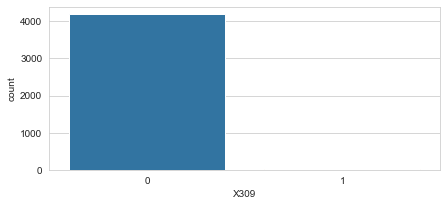

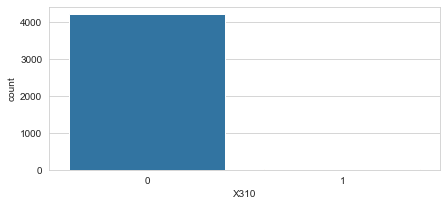

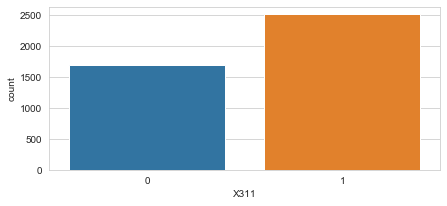

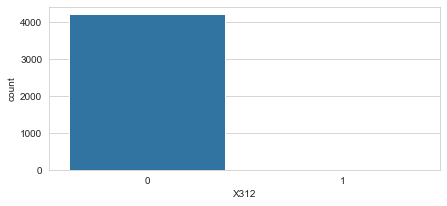

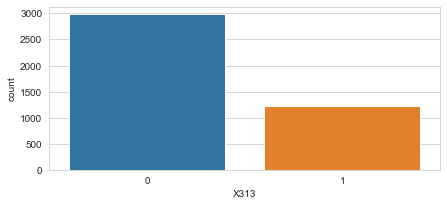

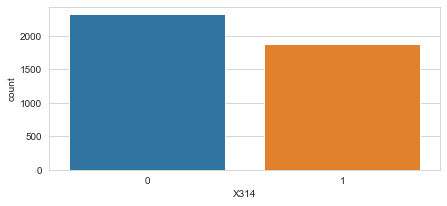

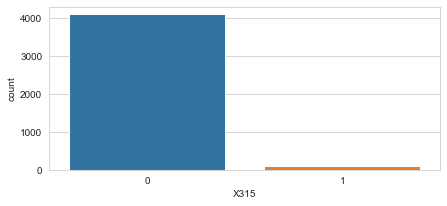

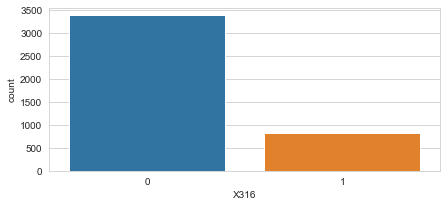

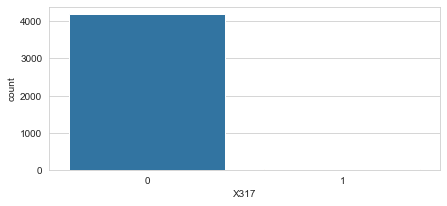

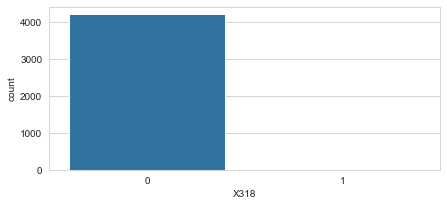

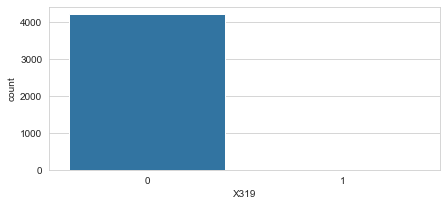

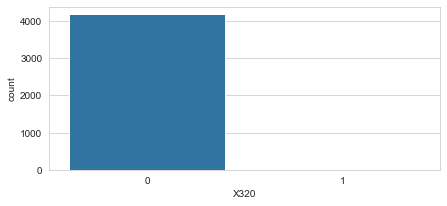

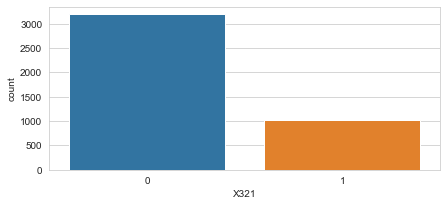

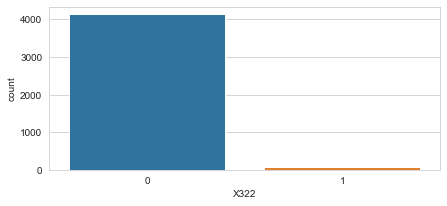

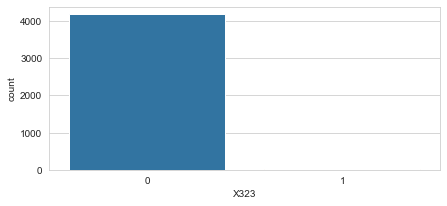

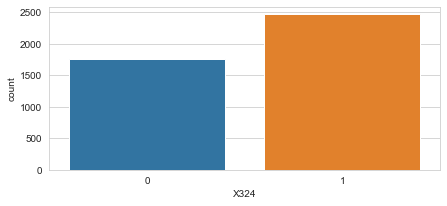

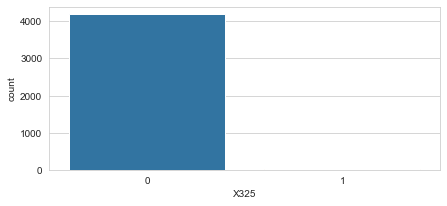

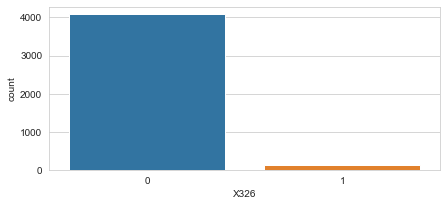

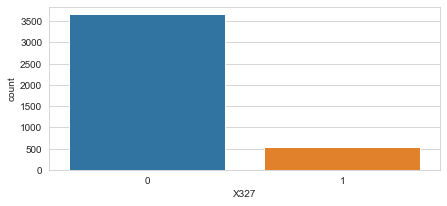

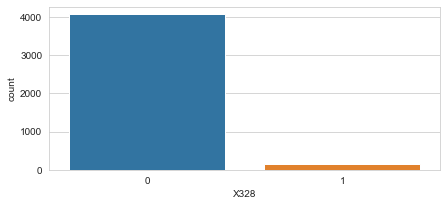

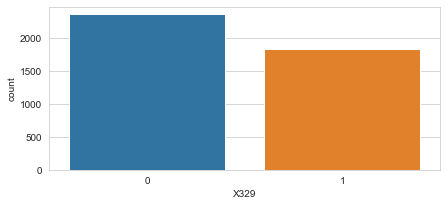

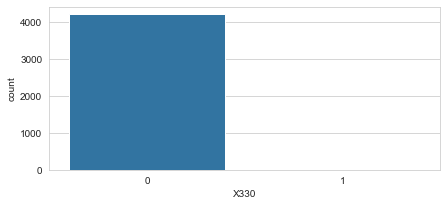

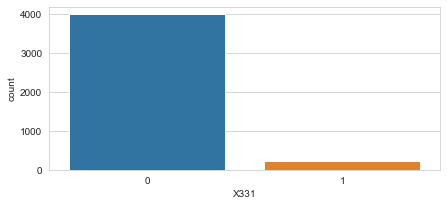

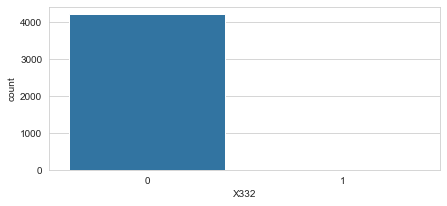

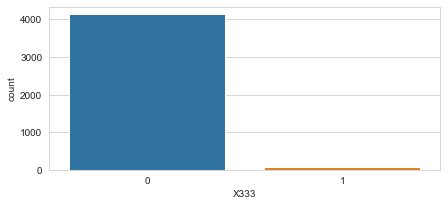

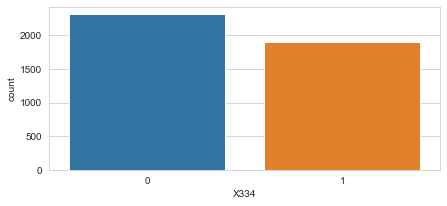

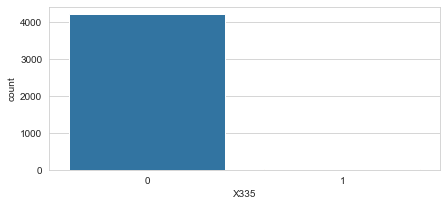

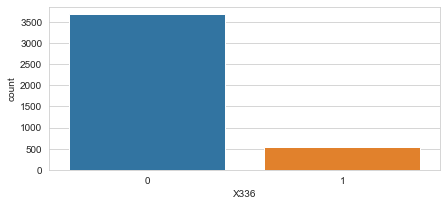

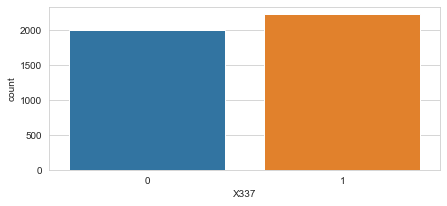

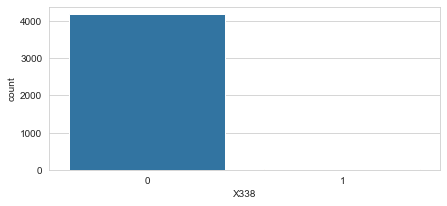

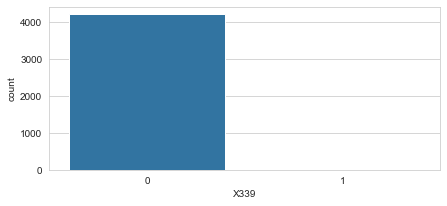

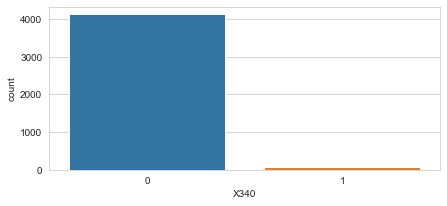

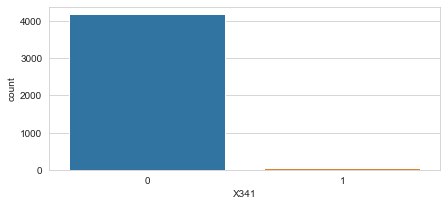

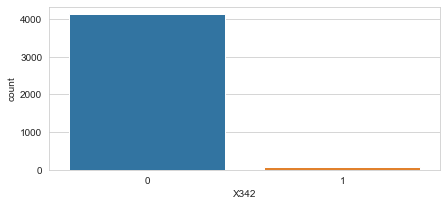

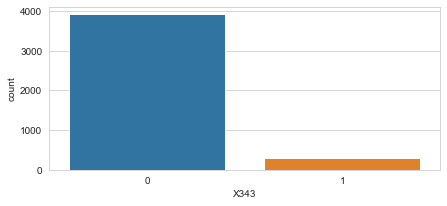

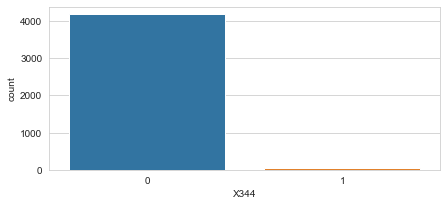

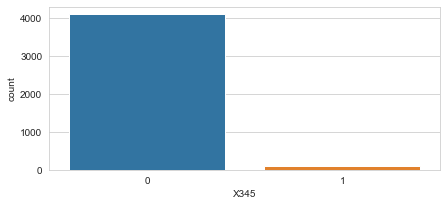

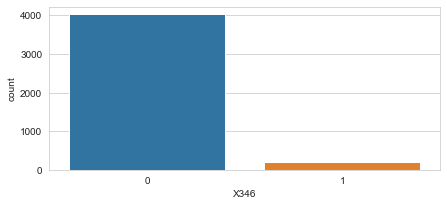

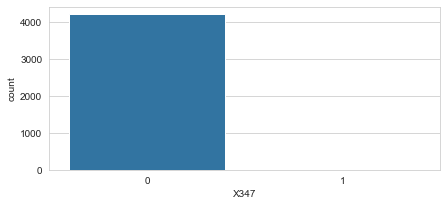

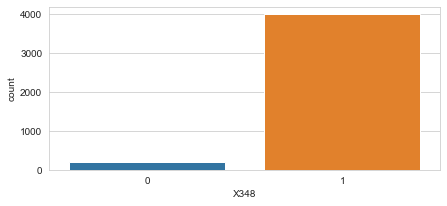

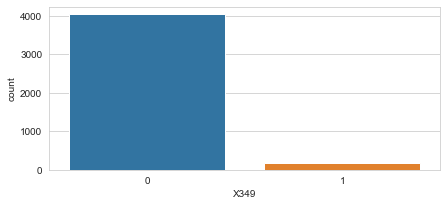

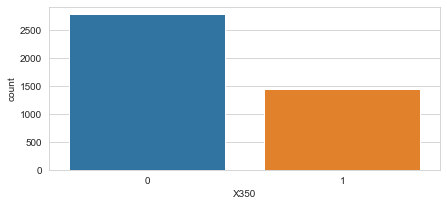

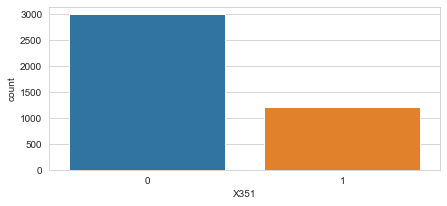

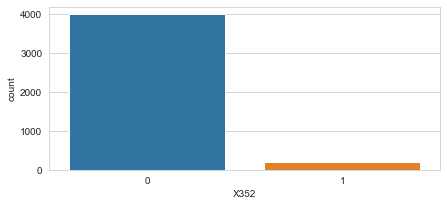

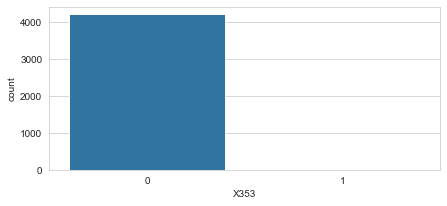

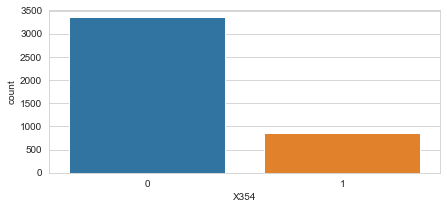

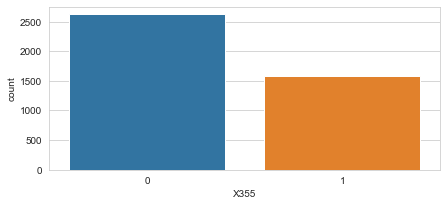

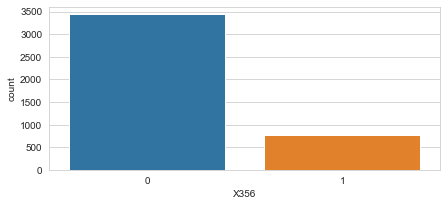

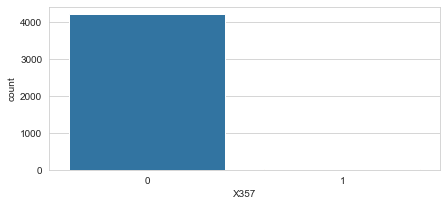

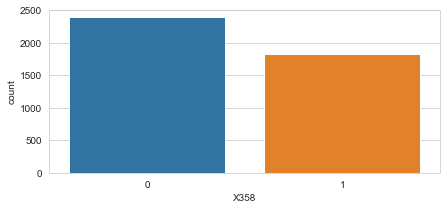

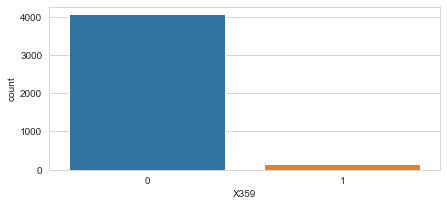

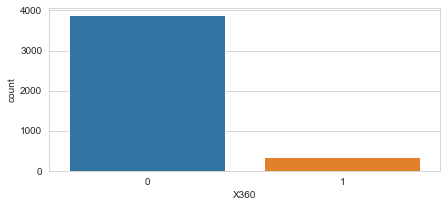

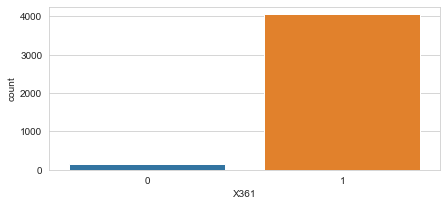

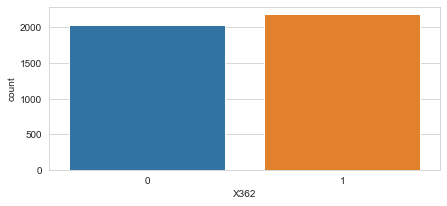

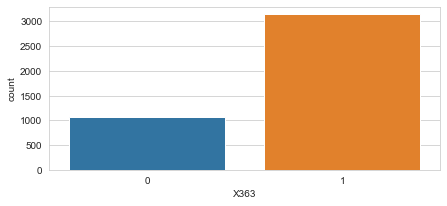

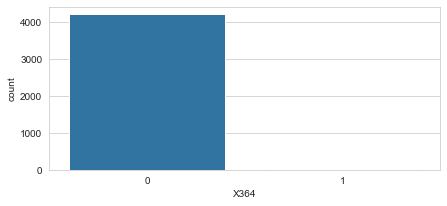

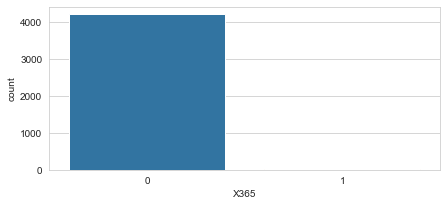

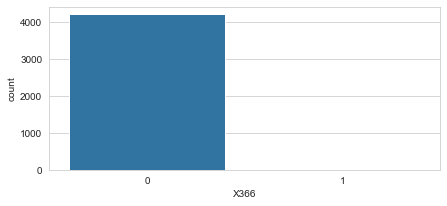

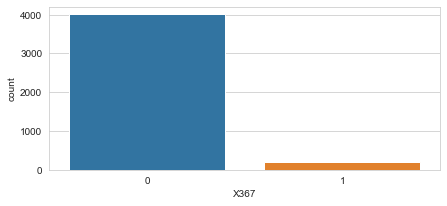

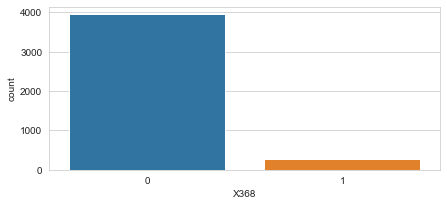

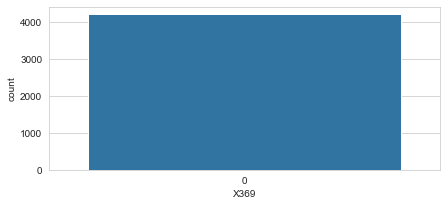

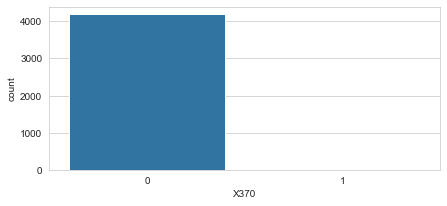

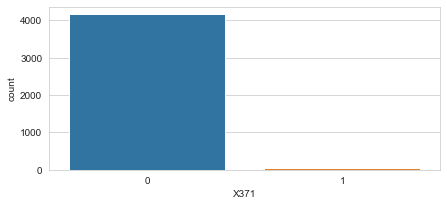

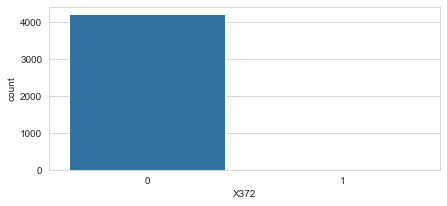

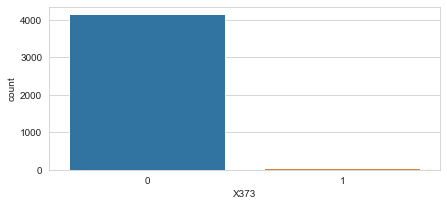

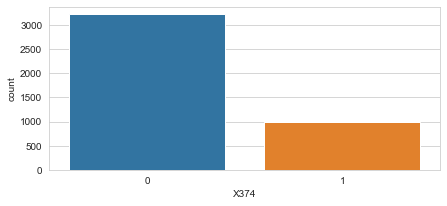

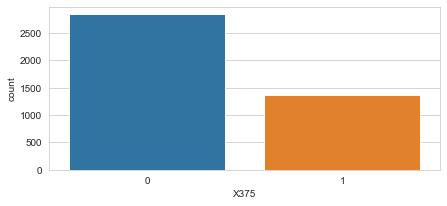

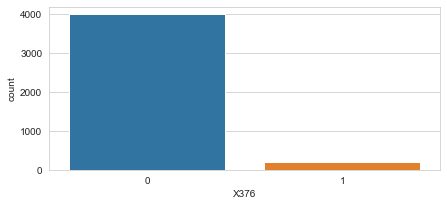

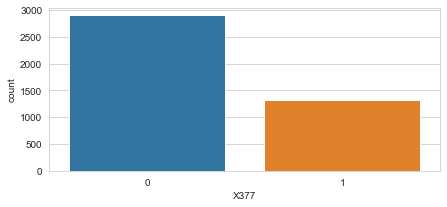

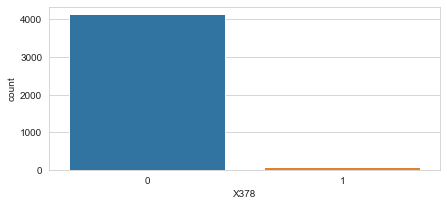

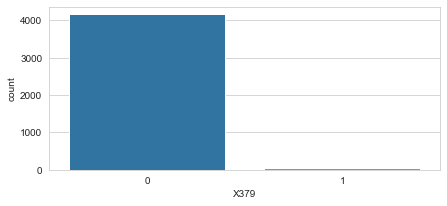

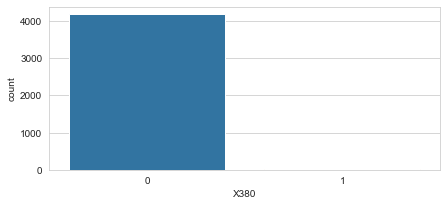

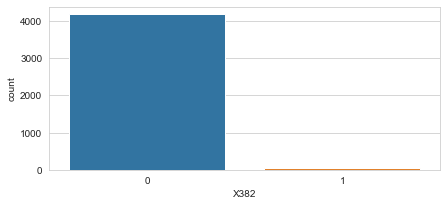

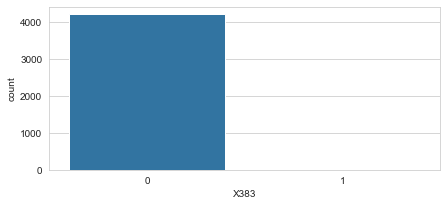

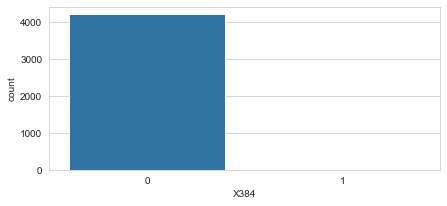

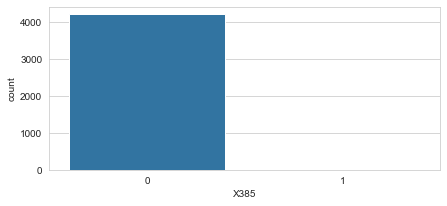

In [ ]:
for col in test[binary_feats].columns:
    plt.figure(figsize=(7,3))
    sns.countplot(x=col,data=test[binary_feats])

**Lets check if we have mismatched labels in train and test set categorical features:**

In [ ]:
for col in train[cat_feats].columns:
    print(col+" has "+str(train[col].nunique())+" unique labels training set")
    print(col+" has "+str(test[col].nunique())+" unique labels test set\n")

X0 has 47 unique labels training set
X0 has 49 unique labels test set

X1 has 27 unique labels training set
X1 has 27 unique labels test set

X2 has 44 unique labels training set
X2 has 45 unique labels test set

X3 has 7 unique labels training set
X3 has 7 unique labels test set

X4 has 4 unique labels training set
X4 has 4 unique labels test set

X5 has 29 unique labels training set
X5 has 32 unique labels test set

X6 has 12 unique labels training set
X6 has 12 unique labels test set

X8 has 25 unique labels training set
X8 has 25 unique labels test set



**Following labels are present in test set but not in train set:**

In [ ]:
for col in train[cat_feats].columns:
    train_unique_labels=set(train[col])
    test_unique_labels=set(test[col])
    print("feature: "+col+" | Following labels are present in test set only: "+str(len(test_unique_labels-train_unique_labels)))
    print(test_unique_labels-train_unique_labels)
    print("")

feature: X0 | Following labels are present in test set only: 6
{'ag', 'ae', 'bb', 'p', 'an', 'av'}

feature: X1 | Following labels are present in test set only: 0
set()

feature: X2 | Following labels are present in test set only: 6
{'ax', 'u', 'aj', 'w', 'ad', 'ab'}

feature: X3 | Following labels are present in test set only: 0
set()

feature: X4 | Following labels are present in test set only: 0
set()

feature: X5 | Following labels are present in test set only: 4
{'b', 'z', 'a', 't'}

feature: X6 | Following labels are present in test set only: 0
set()

feature: X8 | Following labels are present in test set only: 0
set()



**Lets first make a copy of our train and test set:**

In [ ]:
train_c = train.copy()
test_c = test.copy()

In [ ]:
x = train_c.drop(["ID","y"],axis=1)
y = train_c["y"] 

# dropping id from test set also
f_test = test_c.drop("ID",axis=1)

In [ ]:
x.shape

(4209, 376)

In [ ]:
f_test.shape

(4209, 376)

# Now we will select features with a number of different techniques. 
### From here untill the end of the notebook, detailed explanation can be found on each technique and why have we used them and not others, in my Santander Customer Satisfaction workbook. Here is the link: https://github.com/sunaal-dua/experience/blob/master/kaggle%20datasets/santander%20customer%20satisfaction/part-1-reducing%20featureset.ipynb
**We will first remove all the constant features:**

In [ ]:
complete_constant = VarianceThreshold(threshold=0)
complete_constant.fit(x[binary_feats])

VarianceThreshold(threshold=0)

In [ ]:
print("Total no. of binary features in the feature set: {}".format(len(x[binary_feats].columns)))
print("No. of binary features that are completely constant: {}".format(len(x[binary_feats].columns) - len(x[binary_feats].columns[complete_constant.get_support()])))
print("Remaining features: {}".format(len(x[binary_feats].columns[complete_constant.get_support()])))

Total no. of binary features in the feature set: 368
No. of binary features that are completely constant: 12
Remaining features: 356


In [ ]:
constant_cols = [ col for col in x[binary_feats].columns if col not in x[binary_feats].columns[complete_constant.get_support()] ]   
constant_cols

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [ ]:
for remove_col in constant_cols:
    binary_feats.remove(remove_col)

In [ ]:
x = x.drop(constant_cols,axis=1)
f_test = f_test.drop(constant_cols,axis=1)

print(x.shape)
print(f_test.shape)

(4209, 364)
(4209, 364)


**Removing "almost" constant features:**

In [ ]:
almost_constant = VarianceThreshold(threshold=0.99*(1-0.99))
almost_constant.fit(x[binary_feats])

VarianceThreshold(threshold=0.00990000000000001)

In [ ]:
print("Total no. of features in the feature set: {}".format(len(x[binary_feats].columns)))
print("No. of features that are quasy constant: {}".format(len(x[binary_feats].columns) - len(x[binary_feats].columns[almost_constant.get_support()])))
print("Remaining features: {}".format(len(x[binary_feats].columns[almost_constant.get_support()])))

Total no. of features in the feature set: 356
No. of features that are quasy constant: 135
Remaining features: 221


In [ ]:
almost_constant_cols = [ col for col in x[binary_feats].columns if col not in x[binary_feats].columns[almost_constant.get_support()] ]   
almost_constant_cols

['X15',
 'X16',
 'X17',
 'X18',
 'X21',
 'X24',
 'X26',
 'X30',
 'X33',
 'X34',
 'X36',
 'X39',
 'X40',
 'X42',
 'X53',
 'X55',
 'X59',
 'X60',
 'X62',
 'X65',
 'X67',
 'X74',
 'X78',
 'X83',
 'X86',
 'X87',
 'X88',
 'X89',
 'X90',
 'X91',
 'X92',
 'X94',
 'X95',
 'X97',
 'X99',
 'X102',
 'X104',
 'X105',
 'X110',
 'X112',
 'X122',
 'X123',
 'X124',
 'X125',
 'X145',
 'X153',
 'X160',
 'X165',
 'X167',
 'X169',
 'X172',
 'X173',
 'X183',
 'X184',
 'X190',
 'X192',
 'X199',
 'X200',
 'X204',
 'X205',
 'X207',
 'X210',
 'X212',
 'X213',
 'X214',
 'X216',
 'X217',
 'X221',
 'X227',
 'X230',
 'X236',
 'X237',
 'X239',
 'X240',
 'X242',
 'X243',
 'X245',
 'X248',
 'X249',
 'X252',
 'X253',
 'X254',
 'X257',
 'X258',
 'X259',
 'X260',
 'X262',
 'X266',
 'X267',
 'X269',
 'X270',
 'X271',
 'X274',
 'X277',
 'X278',
 'X280',
 'X281',
 'X282',
 'X288',
 'X292',
 'X295',
 'X296',
 'X298',
 'X299',
 'X307',
 'X308',
 'X309',
 'X310',
 'X312',
 'X317',
 'X318',
 'X319',
 'X320',
 'X323',
 'X325',


In [ ]:
x = x.drop(almost_constant_cols,axis=1)
f_test = f_test.drop(almost_constant_cols,axis=1)

print(x.shape)
print(f_test.shape)

(4209, 229)
(4209, 229)


In [ ]:
for remove_col in almost_constant_cols:
    binary_feats.remove(remove_col)

**At the beginning of the notebook we found out duplicate rows in the dataset. Here we will find duplicate columns in the dataset:**

In [ ]:
x.transpose()

0    1    2    3    4    5    6     ... 4202 4203 4204 4205 4206 4207 4208
X0      k    k   az   az   az    t   al  ...   ap   aq   ak    j   ak   al    z
X1      v    t    w    t    v    b    r  ...    l    s    s    o    v    r    r
X2     at   av    n    n    n    e    e  ...    s   as   as    t    r    e   ae
X3      a    e    c    f    f    c    f  ...    c    c    c    d    a    f    c
X4      d    d    d    d    d    d    d  ...    d    d    d    d    d    d    d
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
X374    0    0    0    0    0    0    1  ...    1    0    0    0    0    1    0
X375    0    1    0    0    0    0    0  ...    0    1    1    0    0    0    1
X376    0    0    0    0    0    0    0  ...    0    0    0    1    0    0    0
X377    1    0    0    0    0    1    0  ...    0    0    0    0    1    0    0
X378    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0

[229 rows x 4209 columns]

In [ ]:
all_dup_feats = x.transpose()[x.transpose().duplicated(keep=False)].index.to_list()
print("There are a total "+str(len(all_dup_feats))+" duplicate columns. See below:")
all_dup_feats

There are a total 31 duplicate columns. See below:


['X29',
 'X31',
 'X35',
 'X37',
 'X44',
 'X48',
 'X54',
 'X58',
 'X71',
 'X76',
 'X84',
 'X113',
 'X118',
 'X119',
 'X134',
 'X138',
 'X146',
 'X147',
 'X152',
 'X155',
 'X202',
 'X222',
 'X226',
 'X232',
 'X244',
 'X247',
 'X279',
 'X302',
 'X324',
 'X326',
 'X360']

In [ ]:
cols_to_drop = x.transpose()[x.transpose().duplicated(keep="first")].index.to_list()
print("We will keep only the first instance of each duplicate column and drop the remaining "+str(len(cols_to_drop))+". The following columns will be removed:\n")
print(cols_to_drop)

We will keep only the first instance of each duplicate column and drop the remaining 19. The following columns will be removed:

['X35', 'X37', 'X76', 'X84', 'X113', 'X119', 'X134', 'X146', 'X147', 'X222', 'X226', 'X232', 'X244', 'X247', 'X279', 'X302', 'X324', 'X326', 'X360']


In [ ]:
x = x.drop(cols_to_drop,axis=1)
f_test = f_test.drop(cols_to_drop,axis=1)

print(x.shape)
print(f_test.shape)

(4209, 210)
(4209, 210)


In [ ]:
for remove_col in cols_to_drop:
    binary_feats.remove(remove_col)

**Untill now we have removed constant, almost constant and duplicate columns. Now we will find the features having mutual information with our target variable (For thorough explanation on this, please find the Santander Customer Satisfaction workbook):**

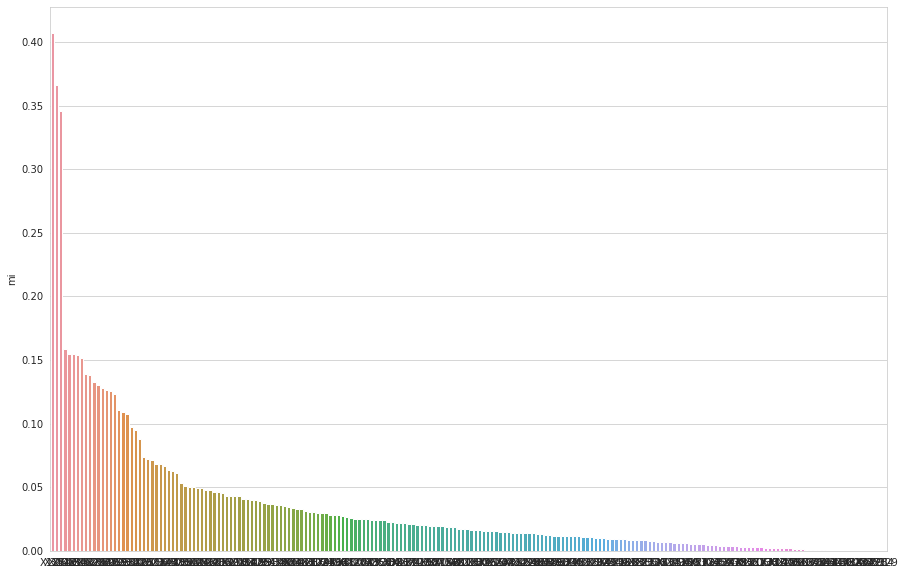

In [ ]:
mi = mutual_info_regression(x[binary_feats],y,random_state=77)
mi_df = pd.DataFrame(mi, index=x[binary_feats].columns, columns=["mi"])
mi_df.sort_values(by="mi", axis=0, ascending=False, inplace=True)

plt.figure(figsize=(15,10))
sns.barplot(x=mi_df.index,y=mi_df["mi"])

In [ ]:
feat_to_drop = mi_df[mi_df["mi"]<=0].index.to_list()
print("we will drop the following "+str(len(feat_to_drop))+" features that have no mutual information value with target variable:\n")
feat_to_drop

we will drop the following 12 features that have no mutual information value with target variable:



['X139',
 'X141',
 'X152',
 'X32',
 'X340',
 'X182',
 'X77',
 'X342',
 'X351',
 'X291',
 'X284',
 'X329']

In [ ]:
x = x.drop(feat_to_drop,axis=1)
f_test = f_test.drop(feat_to_drop,axis=1)

print(x.shape)
print(f_test.shape)

(4209, 198)
(4209, 198)


In [ ]:
for remove_col in feat_to_drop:
    binary_feats.remove(remove_col)

**Recursive Feature Elimination (RFE):**

In [ ]:
# Randomforest
%%time 
m = RandomForestRegressor(random_state=7)
m_scores = cross_val_score(m, x[binary_feats], y, cv=5)

CPU times: user 21.8 s, sys: 6.08 ms, total: 21.8 s
Wall time: 21.9 s


In [ ]:
m_scores.mean()

0.5031708048458137

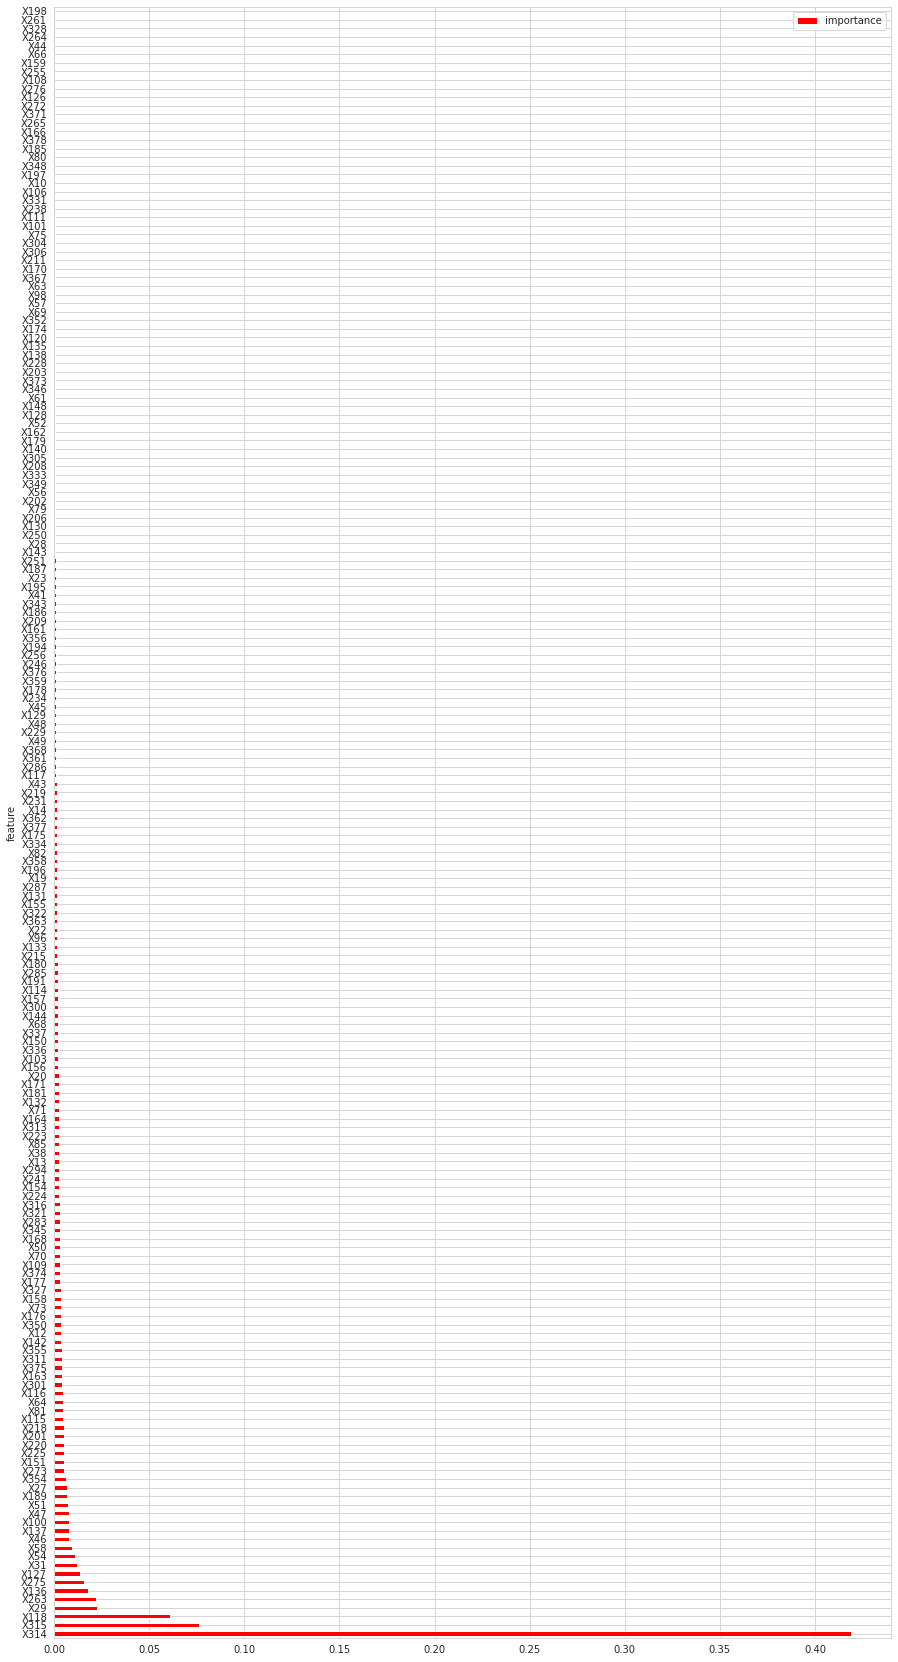

In [ ]:
m.fit(x[binary_feats],y)
    
features = pd.DataFrame()
features['feature'] = x[binary_feats].columns
features['importance'] = m.feature_importances_
features.sort_values(by=['importance'], ascending=False, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh',color="r", figsize=(15, 30))

We will select only first 18 features via RFE:

In [ ]:
sel = RFE(RandomForestRegressor(random_state=7), n_features_to_select=18, step=5)
sel.fit(x[binary_feats],y)
rf_features = x[binary_feats].columns[sel.support_]

print(len(rf_features))
print("selected features:")
print(rf_features.to_list())
print("")
print("saving these features in a file...")

with open("/content/drive/My Drive/Colab Notebooks/merc/rf_features.txt", "w") as fp:
  json.dump(rf_features.to_list(), fp)

print("saved!")

18
selected features:
['X29', 'X46', 'X64', 'X100', 'X118', 'X136', 'X137', 'X150', 'X218', 'X220', 'X263', 'X273', 'X275', 'X314', 'X315', 'X321', 'X354', 'X375']

saving these features in a file...
saved!


In [ ]:
# Gradientboosting
%%time 
m = GradientBoostingRegressor(random_state=7)
m_scores = cross_val_score(m, x[binary_feats], y, cv=5)

CPU times: user 6.63 s, sys: 6.52 ms, total: 6.64 s
Wall time: 6.66 s


In [ ]:
m_scores.mean()

0.5592428082309595

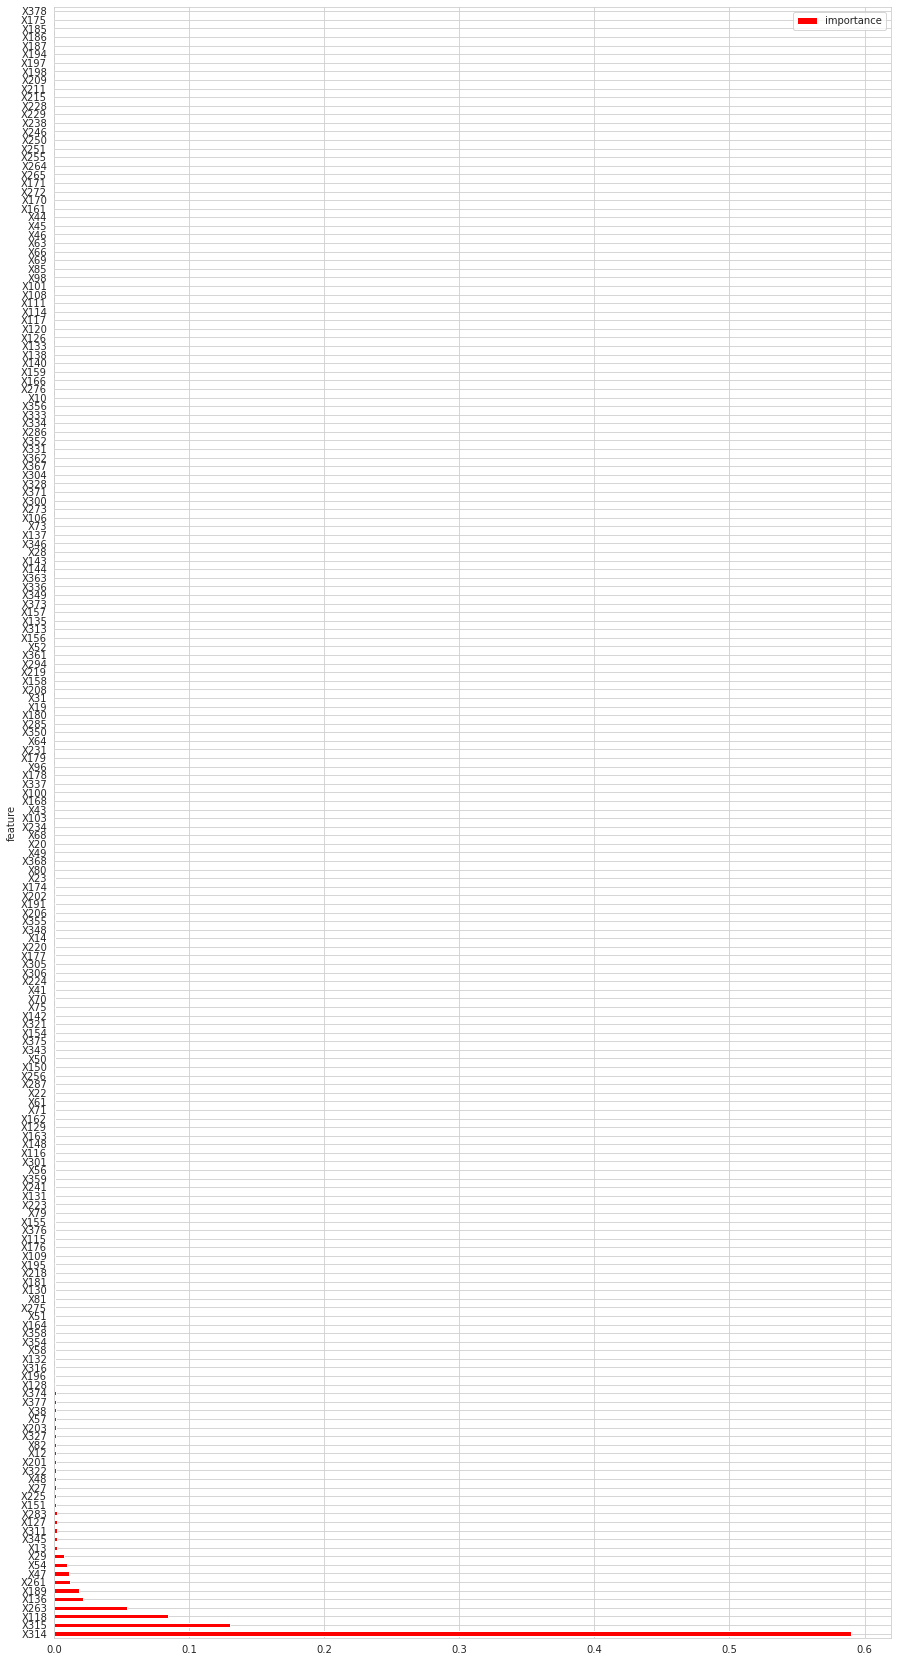

In [ ]:
m.fit(x[binary_feats],y)
    
features = pd.DataFrame()
features['feature'] = x[binary_feats].columns
features['importance'] = m.feature_importances_
features.sort_values(by=['importance'], ascending=False, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh',color="r", figsize=(15, 30))

We will select only first 10 features via RFE:

In [ ]:
sel = RFE(GradientBoostingRegressor(random_state=7), n_features_to_select=10, step=5)
sel.fit(x[binary_feats],y)
gb_features = x[binary_feats].columns[sel.support_]

print(len(gb_features))
print("selected features:")
print(gb_features.to_list())
print("")
print("saving these features in a file...")

with open("/content/drive/My Drive/Colab Notebooks/merc/gb_features.txt", "w") as fp:
  json.dump(gb_features.to_list(), fp)

print("saved!")

10
selected features:
['X47', 'X54', 'X118', 'X136', 'X189', 'X261', 'X263', 'X283', 'X314', 'X315']

saving these features in a file...
saved!


# If you notice... we have performed the above drill only for binary features. Since they were huge in numbers. From here on we will do the exact same thing for categorical features
**Comming to categorical features, we saw in the above countplots that x4 has a constant value throughout the dataset hence we can drop it**

In [ ]:
print(x["X4"].value_counts(normalize=True))

d    0.999050
a    0.000475
b    0.000238
c    0.000238
Name: X4, dtype: float64


In [ ]:
x = x.drop("X4",axis=1)
f_test = f_test.drop("X4",axis=1)
cat_feats.remove("X4")

print(x.shape)
print(f_test.shape)

(4209, 375)
(4209, 375)


**Lets see how the categorical features are behaving with the target variable 'y' :**

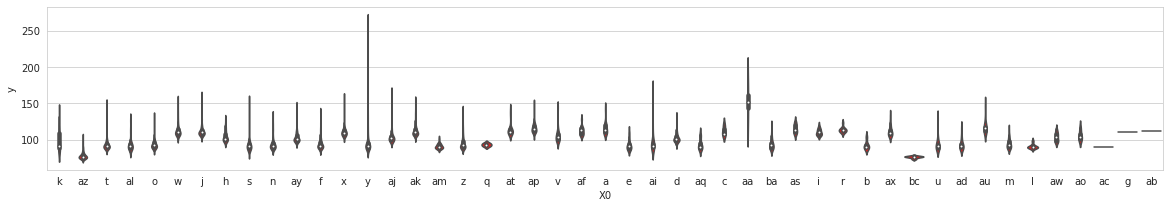

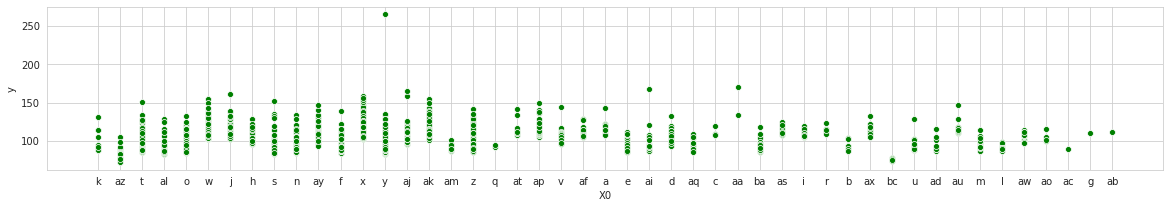

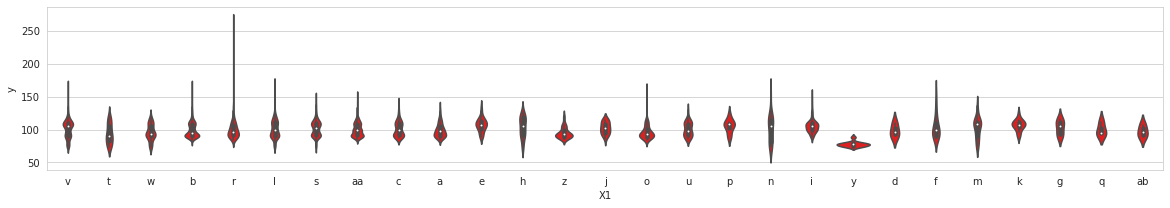

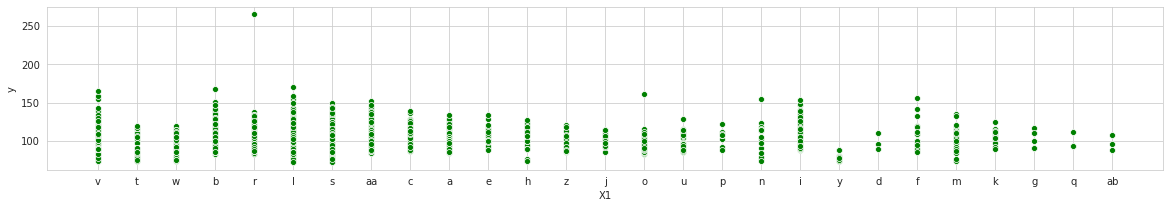

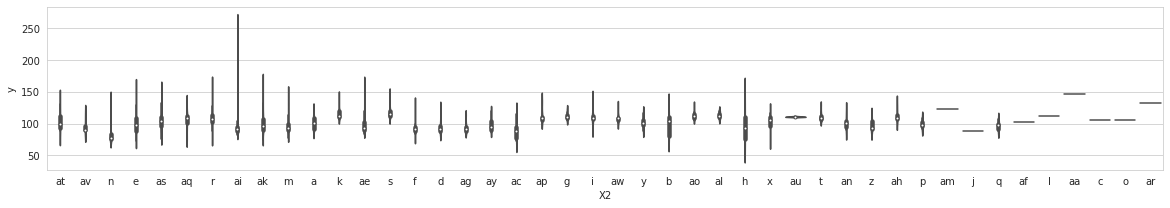

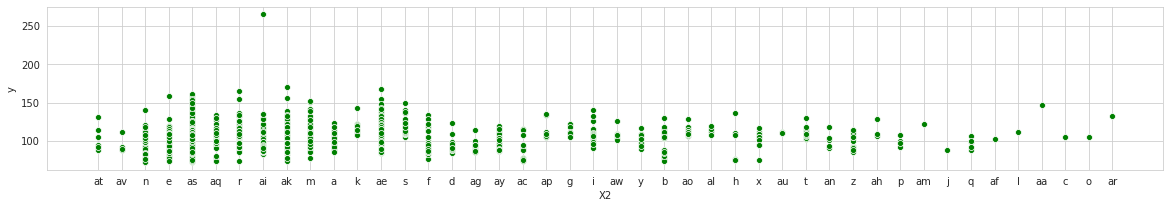

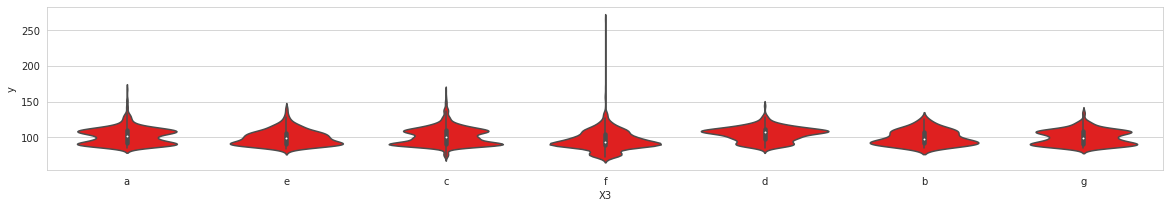

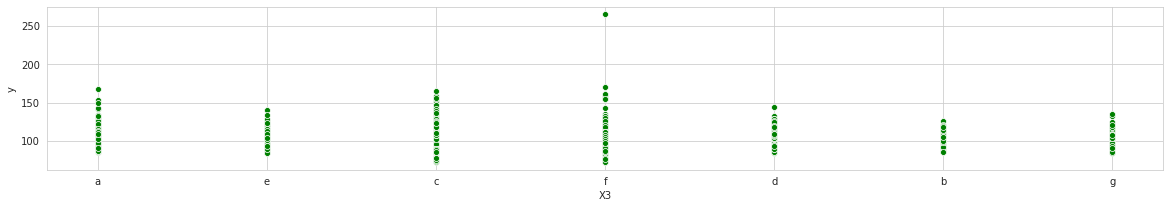

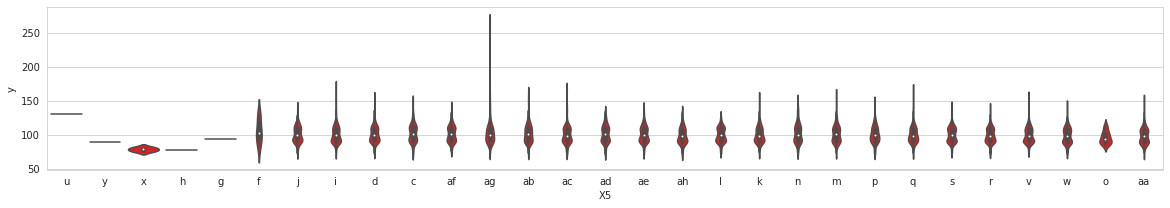

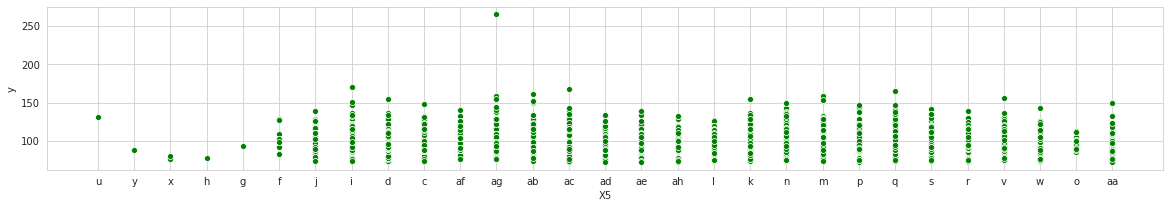

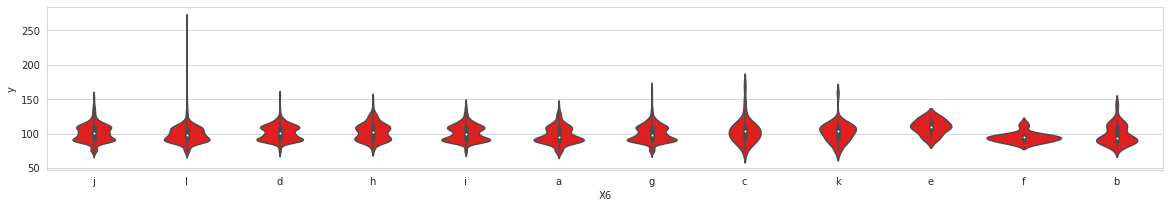

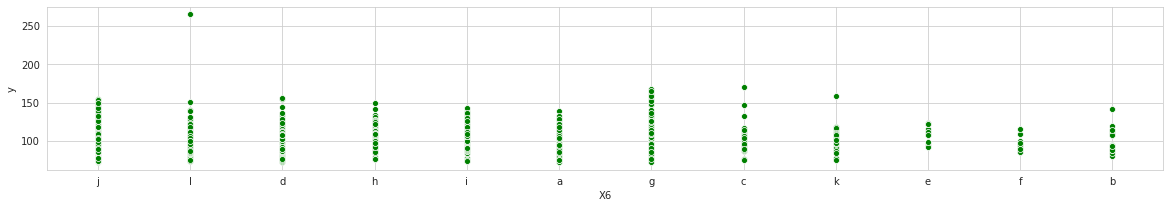

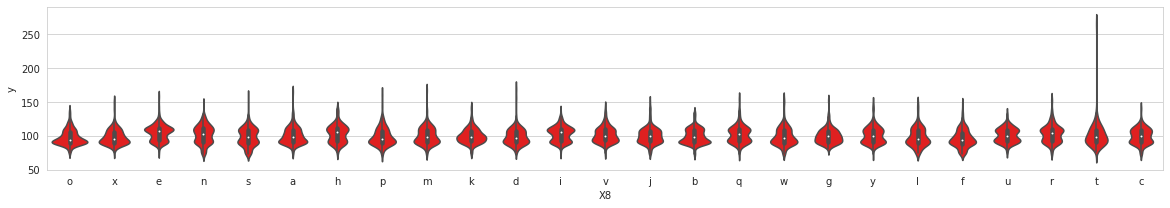

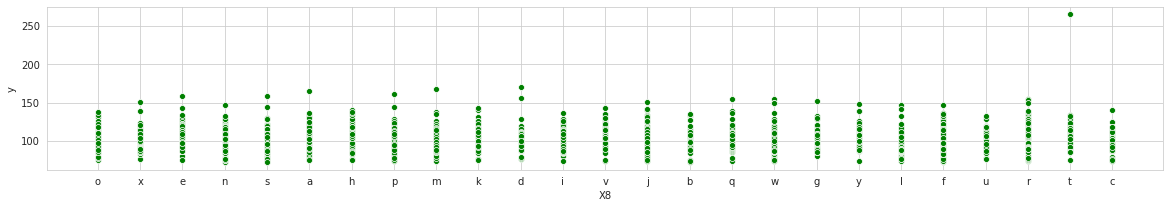

In [ ]:
for col in x[cat_feats].columns:
  fig1 = plt.figure(figsize=(20,3))
  sns.violinplot(x=col, y=y, data=x[cat_feats], color="r")
  fig2 = plt.figure(figsize=(20,3))
  sns.scatterplot(x=col, y=y, data=x[cat_feats], color="g")

**Before running RFE lets run anova test to see which categorical feature has a good relationship with target:**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

for feat in x[cat_feats]:
    
    mod1 = ols(formula = 'y ~ '+feat, data = x[cat_feats]).fit()
    aov_table1 = sm.stats.anova_lm(mod1, typ=2)
    print(aov_table1)
    print("---------------------------------------------------------------------------------------------------\n")

                 sum_sq      df           F  PR(>F)
X0        388859.137802    46.0  122.314076     0.0
Residual  287647.176541  4162.0         NaN     NaN
---------------------------------------------------------------------------------------------------

                 sum_sq      df         F        PR(>F)
X1         28168.924142    26.0  6.988434  1.128032e-24
Residual  648337.390201  4182.0       NaN           NaN
---------------------------------------------------------------------------------------------------

                 sum_sq      df          F         PR(>F)
X2        152784.714860    43.0  28.256995  1.930684e-196
Residual  523721.599483  4165.0        NaN            NaN
---------------------------------------------------------------------------------------------------

                 sum_sq      df          F        PR(>F)
X3         28668.663183     6.0  30.991747  1.251233e-36
Residual  647837.651160  4202.0        NaN           NaN
----------------------------

**Rejecting the null hypothesis for all the category features, we have significant evidence (at p=0.05) to prove that there is a difference in target variable value y wrt to each categorical features. Hence all these categorical features seem to have a good relationship with the target variable and may be useful in modelling.**<br>
The categorical variables have high cardinality. In this part we will dummy encode all the categorical features and then select these dummy encoded features via RFE. In next part we will use normalized frequency based encoding on these categorical features.

In [ ]:
x_cat_train = pd.get_dummies(x[cat_feats])
x_cat_test = pd.get_dummies(f_test[cat_feats])

print(x_cat_train.shape)
print(x_cat_test.shape)

(4209, 191)
(4209, 197)


**We also have mismatched labels in the train and test sets. Hence dummy encoding train and test sets will give different number of columns. Lets align our dataset. We will take only common columns from both the datasets:**<br>Total 181 features are common in both train and test sets:

In [ ]:
len(set(x_cat_train.columns).intersection(set(x_cat_test.columns)))

181

**10 labels are there that are present in train set only**

In [ ]:
len(set(x_cat_train.columns)-set(x_cat_test.columns))

10

**16 labels are there that are present in test set only:**

In [ ]:
len(set(x_cat_test.columns)-set(x_cat_train.columns))

16

**Lets align the train and test set.**

In [ ]:
intersection_cols = set(x_cat_train.columns).intersection(set(x_cat_test.columns))

In [ ]:
x_cat_train = x_cat_train[intersection_cols]
x_cat_test = x_cat_test[intersection_cols]

print(x_cat_train.shape)
print(x_cat_test.shape)

(4209, 181)
(4209, 181)


**Time for RFE:**

In [ ]:
# Randomforest
%%time 
m = RandomForestRegressor(random_state=7)
m_scores = cross_val_score(m, x_cat_train, y, cv=5)
print(m_scores.mean())

0.5100510671182223
CPU times: user 27.7 s, sys: 36.6 ms, total: 27.7 s
Wall time: 27.7 s


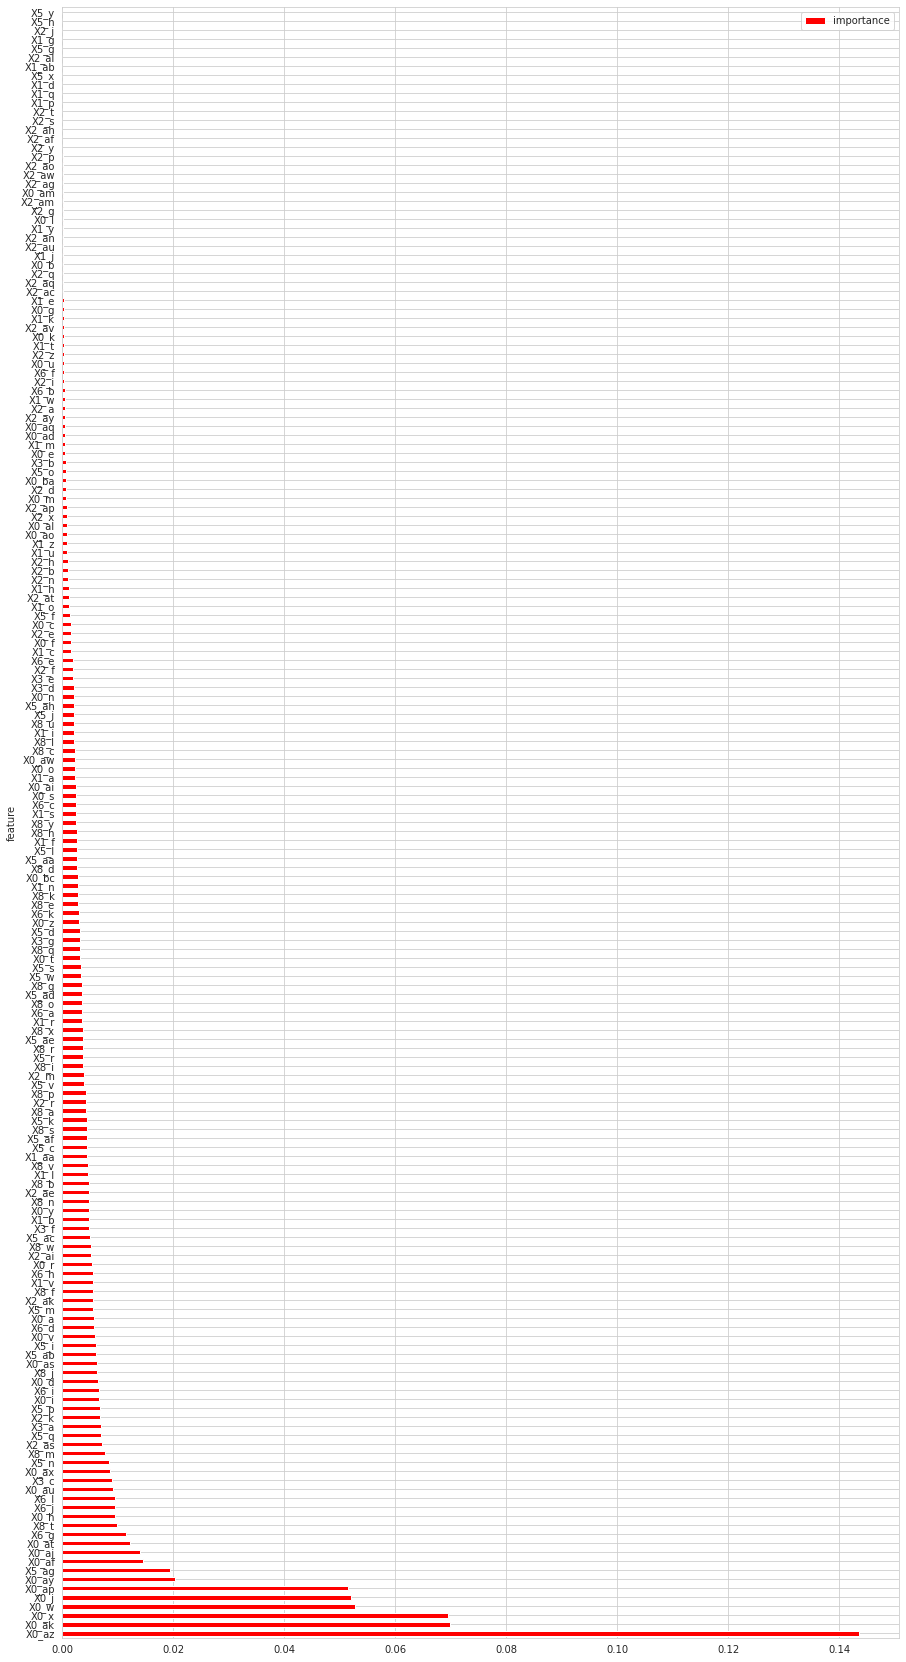

In [ ]:
m.fit(x_cat_train,y)
    
features = pd.DataFrame()
features['feature'] = x_cat_train.columns
features['importance'] = m.feature_importances_
features.sort_values(by=['importance'], ascending=False, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh',color="r", figsize=(15, 30))

Removing last 72 features

In [ ]:
features["importance"][:-72] 

feature
X0_az    0.143672
X0_ak    0.069829
X0_x     0.069617
X0_w     0.052858
X0_j     0.052025
           ...   
X0_n     0.002087
X3_d     0.002060
X3_e     0.001918
X2_f     0.001881
X6_e     0.001881
Name: importance, Length: 109, dtype: float64

We will find 109 dummy encoded features:

In [ ]:
sel = RFE(RandomForestRegressor(random_state=7), n_features_to_select=109, step=2)
sel.fit(x_cat_train,y)
rf_features = x_cat_train.columns[sel.support_]

print(len(rf_features))
print("selected features:")
print(rf_features.to_list())
print("")
print("saving these features in a file...")

with open("/content/drive/My Drive/Colab Notebooks/merc/rf_catfeatures.txt", "w") as fp:
  json.dump(rf_features.to_list(), fp)

print("saved!")

109
selected features:
['X0_ap', 'X5_r', 'X8_u', 'X8_o', 'X6_k', 'X0_aj', 'X8_t', 'X5_p', 'X0_j', 'X8_p', 'X2_ae', 'X2_r', 'X8_y', 'X5_m', 'X3_c', 'X3_d', 'X5_j', 'X0_at', 'X5_q', 'X6_e', 'X5_s', 'X6_h', 'X6_j', 'X0_h', 'X8_i', 'X1_b', 'X0_x', 'X0_z', 'X5_ac', 'X0_r', 'X8_b', 'X1_i', 'X0_t', 'X3_e', 'X2_ak', 'X2_ai', 'X0_az', 'X3_g', 'X0_ak', 'X5_v', 'X8_c', 'X1_f', 'X5_c', 'X8_g', 'X0_y', 'X0_n', 'X0_ai', 'X8_d', 'X1_s', 'X0_a', 'X5_ab', 'X5_ad', 'X1_r', 'X0_af', 'X1_c', 'X2_m', 'X8_s', 'X0_d', 'X8_m', 'X1_v', 'X8_k', 'X5_ah', 'X8_j', 'X5_ag', 'X0_w', 'X0_aw', 'X8_l', 'X0_au', 'X5_i', 'X5_aa', 'X5_w', 'X8_q', 'X8_a', 'X6_g', 'X2_k', 'X8_e', 'X0_as', 'X1_aa', 'X8_h', 'X0_ay', 'X2_as', 'X0_bc', 'X8_f', 'X8_w', 'X1_n', 'X1_l', 'X0_v', 'X0_i', 'X5_af', 'X0_s', 'X6_l', 'X0_ax', 'X3_f', 'X3_a', 'X8_n', 'X5_k', 'X6_i', 'X6_d', 'X5_d', 'X6_a', 'X8_v', 'X0_o', 'X5_l', 'X6_c', 'X1_a', 'X5_ae', 'X8_r', 'X8_x', 'X5_n']

saving these features in a file...
saved!


In [ ]:
# Gradient boosting
%%time 
m = GradientBoostingRegressor(random_state=7)
m_scores = cross_val_score(m, x_cat_train, y, cv=5)
print(m_scores.mean())

0.511602169712645
CPU times: user 4.31 s, sys: 3.98 ms, total: 4.31 s
Wall time: 4.32 s


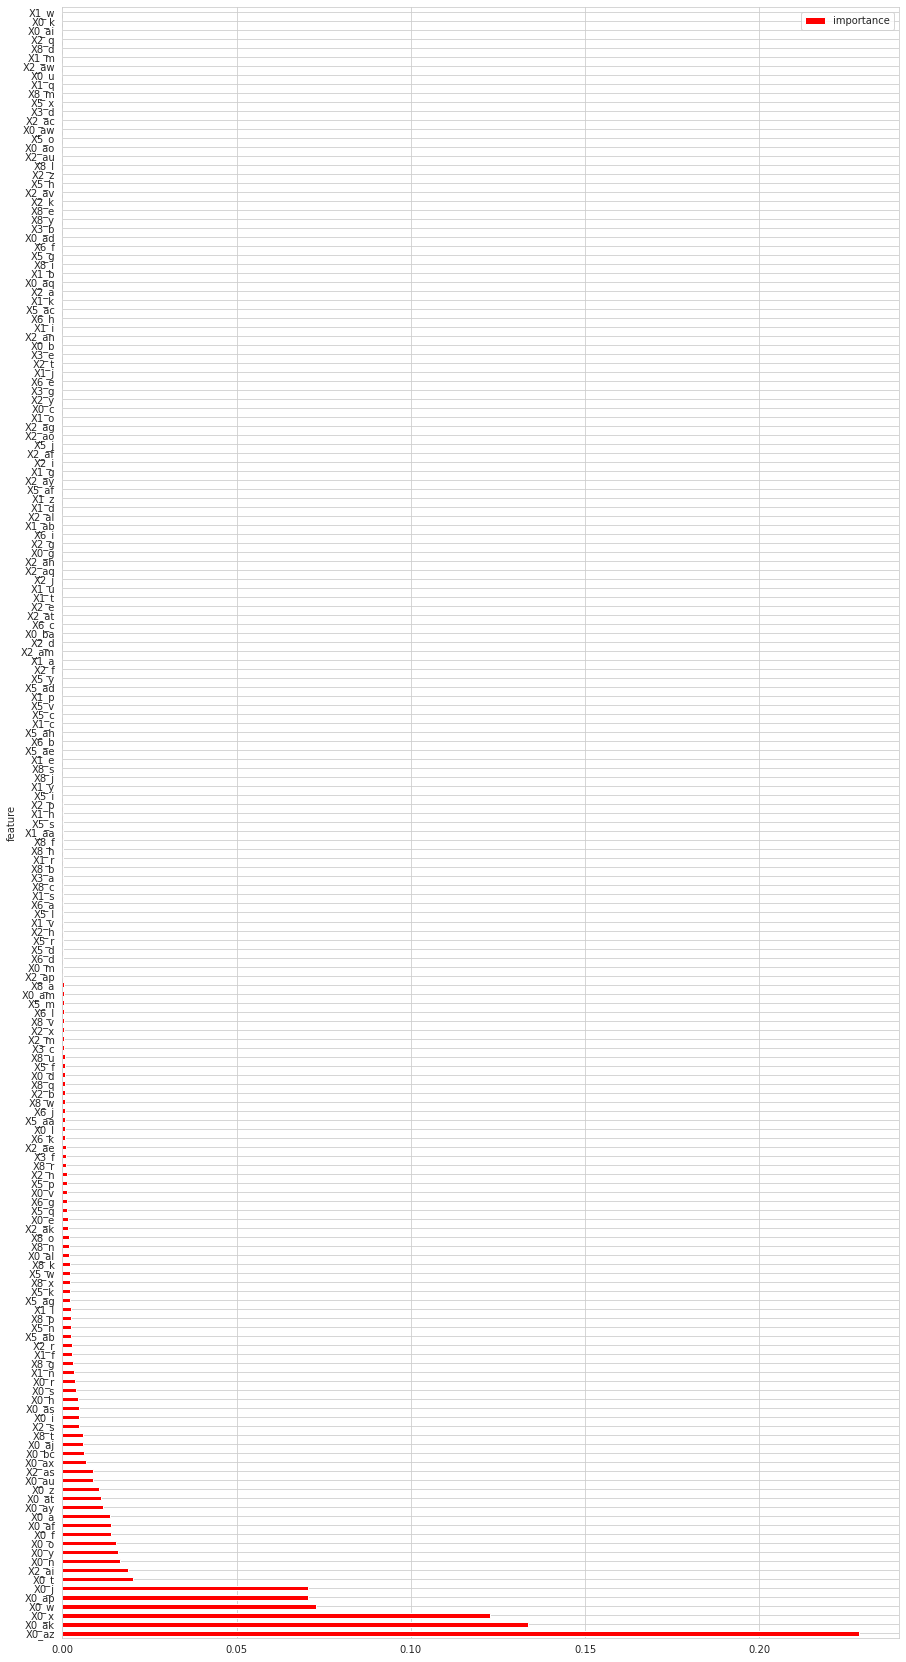

In [ ]:
m.fit(x_cat_train,y)
    
features = pd.DataFrame()
features['feature'] = x_cat_train.columns
features['importance'] = m.feature_importances_
features.sort_values(by=['importance'], ascending=False, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh',color="r", figsize=(15, 30))

Selecting top 46 features:

In [ ]:
features["importance"][:46] #selecting top 46 features

feature
X0_az    0.228651
X0_ak    0.133636
X0_x     0.122712
X0_w     0.072805
X0_ap    0.070494
X0_j     0.070440
X0_t     0.020301
X2_ai    0.018997
X0_n     0.016583
X0_y     0.015983
X0_o     0.015529
X0_f     0.014115
X0_af    0.013941
X0_a     0.013662
X0_ay    0.011695
X0_at    0.011212
X0_z     0.010453
X0_au    0.008923
X2_as    0.008831
X0_ax    0.006856
X0_bc    0.006210
X0_aj    0.006057
X8_t     0.006031
X2_s     0.004924
X0_i     0.004850
X0_as    0.004812
X0_h     0.004492
X0_s     0.003815
X0_r     0.003748
X1_n     0.003438
X8_g     0.003132
X1_f     0.002838
X2_r     0.002741
X5_ab    0.002541
X5_n     0.002485
X8_p     0.002474
X1_l     0.002422
X5_ag    0.002377
X5_k     0.002318
X8_x     0.002203
X5_w     0.002176
X8_k     0.002133
X0_al    0.002057
X8_n     0.001810
X8_o     0.001808
X2_ak    0.001746
Name: importance, dtype: float64

In [ ]:
sel = RFE(GradientBoostingRegressor(random_state=7), n_features_to_select=46, step=2)
sel.fit(x_cat_train,y)
gb_features = x_cat_train.columns[sel.support_]

print(len(gb_features))
print("selected features:")
print(gb_features.to_list())
print("")
print("saving these features in a file...")

with open("/content/drive/My Drive/Colab Notebooks/merc/gb_catfeatures.txt", "w") as fp:
  json.dump(gb_features.to_list(), fp)

print("saved!")

46
selected features:
['X0_ap', 'X8_o', 'X0_aj', 'X8_t', 'X0_j', 'X2_r', 'X0_at', 'X5_q', 'X0_al', 'X0_h', 'X0_x', 'X0_z', 'X0_r', 'X0_t', 'X0_f', 'X2_ai', 'X0_az', 'X0_ak', 'X1_f', 'X8_g', 'X0_y', 'X0_n', 'X0_a', 'X5_ab', 'X0_af', 'X8_k', 'X2_s', 'X5_ag', 'X0_w', 'X0_au', 'X5_w', 'X6_g', 'X0_as', 'X0_ay', 'X2_as', 'X0_bc', 'X1_n', 'X0_i', 'X0_s', 'X0_ax', 'X3_f', 'X8_n', 'X5_k', 'X0_o', 'X8_x', 'X5_n']

saving these features in a file...
saved!


# So in this part we have selected the set of features for randomforest and gradientboosting models. In the next part we will model with these features and test the score on kaggle dataset.